# PREDICCIÓN DEL NIVEL MEDIO GLOBAL DEL MAR (GMSL)
### Jhullian Ortega - Dayana Galindo

## Objetivo

En este notebook se explorarán y filtrarán los datos que luego usaremos para predecir el nivel medio global del mar a partir de descriptores de condiciones atmosféricas y fenómenos climáticos.



## 1- Librerías



In [ ]:
# Bibliotecas utilizadas

import pandas as pd  # Biblioteca para trabajar con datos tabulares
import numpy as np   # Trabajar con matrices y vectores
import time          # Para medir tiempo

# Bibliotecas para generar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split   # Separación de dataset
from sklearn.preprocessing import MinMaxScaler         # Escalonador

# Algoritmos de Regresión
from sklearn.linear_model import LinearRegression      # Regresión Lineal

# Métricas de desempeño
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score       # Métricas de Regresión
from sklearn.metrics import make_scorer

---
## 2- Abriendo el archivo

Cargamos la carpeta del drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/CienciaDatos/Colab Notebooks

/content/drive/MyDrive/CienciaDatos/Colab Notebooks


In [ ]:
# Leer el archivo
df = pd.read_csv("Refined_new.csv", sep=";", decimal=",")

# Convertir la columna Date a formato fecha
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)


In [ ]:
df.shape

(1729, 26)

In [ ]:
df.columns

Index(['Date', 'GMSL', 'CO2Conc_', 'CO2Emissions', 'Long_runNO2Concentration',
       'Per_capitaNO2EmissionsInCO2Equivalents', 'Long_runCH4Concentration',
       'Per_capitaMethaneEmissionsInCO2Equivalents',
       'GlobalAvgTemp_AnomalyRelativeTo1961_1990',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Anomaly',
       'Nino1_2', 'Nino3', 'Nino3_4', 'Nino3_4Trend', 'Nino4',
       'NorthSeaIceExtentAvg', 'NorthSeaIceExtentMin',
       'SouthSeaIceExtentAvgTrend', 'SouthSeaIceExtentMax',
       'SouthSeaIceExtentMaxTrend', 'SouthSeaIceExtentMin',
       'SouthSeaIceExtentAvg', 'SouthSeaIceExtentAvgRaw',
       'SouthSeaIceExtentRawAvgTrend'],
      dtype='object')

## 3 - Preparación de datos

### Información sobre el dataset

---



In [ ]:
df.head()

Date      GMSL  CO2Conc_  CO2Emissions  Long_runNO2Concentration  \
0 1880-01-31 -180.2363  287.7707   858055700.0                  275.6600   
1 1880-02-29 -179.6365  287.9011   860548141.7                  275.6725   
2 1880-03-31 -179.0367  288.0315   863040583.3                  275.6850   
3 1880-04-30 -178.4370  288.1618   865533025.0                  275.6975   
4 1880-05-31 -177.8372  288.2922   868025466.7                  275.7100   

   Per_capitaNO2EmissionsInCO2Equivalents  Long_runCH4Concentration  \
0                                 0.16869                 845.19000   
1                                 0.16876                 845.28083   
2                                 0.16884                 845.37167   
3                                 0.16892                 845.46250   
4                                 0.16900                 845.55333   

   Per_capitaMethaneEmissionsInCO2Equivalents  \
0                                      1.0906   
1                                      1.0912   
2                                      1.0917   
3                                      1.0922   
4                                      1.0927   

   GlobalAvgTemp_AnomalyRelativeTo1961_1990  \
0                                  -0.31583   
1                                  -0.30887   
2                                  -0.30190   
3                                  -0.29494   
4                                  -0.28797   

   SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_  ...  Nino4  \
0                                           -0.20340       ...  27.69   
1                                           -0.19917       ...  27.75   
2                                           -0.19495       ...  27.88   
3                                           -0.19073       ...  28.07   
4                                           -0.18650       ...  28.21   

   NorthSeaIceExtentAvg  NorthSeaIceExtentMin  SouthSeaIceExtentAvgTrend  \
0               17.6041               15.3547                    10.9777   
1               17.5998               15.3483                    10.9781   
2               17.5955               15.3418                    10.9786   
3               17.5912               15.3353                    10.9790   
4               17.5869               15.3288                    10.9794   

   SouthSeaIceExtentMax  SouthSeaIceExtentMaxTrend  SouthSeaIceExtentMin  \
0               18.8007                    17.1933                3.7520   
1               18.8005                    17.1942                3.7514   
2               18.8003                    17.1951                3.7509   
3               18.8000                    17.1960                3.7504   
4               18.7998                    17.1969                3.7499   

   SouthSeaIceExtentAvg  SouthSeaIceExtentAvgRaw  SouthSeaIceExtentRawAvgTrend  
0               12.2418                  12.2948                       10.6927  
1               12.2413                  12.2946                       10.6936  
2               12.2408                  12.2944                       10.6945  
3               12.2403                  12.2942                       10.6954  
4               12.2399                  12.2940                       10.6963  

[5 rows x 26 columns]

In [ ]:
df.info(verbose=True) #Muestra toda la inf. del df y cuenta los elementos no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1729 non-null   datetime64[ns]
 1   GMSL                                                           1729 non-null   float64       
 2   CO2Conc_                                                       1729 non-null   float64       
 3   CO2Emissions                                                   1729 non-null   float64       
 4   Long_runNO2Concentration                                       1729 non-null   float64       
 5   Per_capitaNO2EmissionsInCO2Equivalents                         1729 non-null   float64       
 6   Long_runCH4Concentration                                       1729 non-null   float64       
 7

In [ ]:
df.describe()

Date         GMSL     CO2Conc_  CO2Emissions  \
count                           1729  1729.000000  1729.000000  1.729000e+03   
mean   1952-01-30 06:06:27.275881920   -78.131871   328.296010  1.259663e+10   
min              1880-01-31 00:00:00  -191.580700   287.770700  8.580557e+08   
25%              1916-01-31 00:00:00  -135.533500   301.875900  3.243838e+09   
50%              1952-01-31 00:00:00   -82.883510   312.503500  6.467461e+09   
75%              1988-01-31 00:00:00   -26.839580   351.159200  2.208513e+10   
max              2024-01-31 00:00:00    83.891110   421.314200  3.849157e+10   
std                              NaN    71.362055    35.528354  1.165959e+10   

       Long_runNO2Concentration  Per_capitaNO2EmissionsInCO2Equivalents  \
count                1729.00000                             1729.000000   
mean                  296.46382                                0.315547   
min                   275.66000                                0.168690   
25%                   281.24000                                0.201710   
50%                   291.97000                                0.372520   
75%                   309.89000                                0.402940   
max                   337.79000                                0.481510   
std                    17.31023                                0.111568   

       Long_runCH4Concentration  Per_capitaMethaneEmissionsInCO2Equivalents  \
count               1729.000000                                 1729.000000   
mean                1258.710359                                    1.368549   
min                  845.190000                                    1.090600   
25%                  884.230000                                    1.236900   
50%                 1142.540000                                    1.338000   
75%                 1693.260000                                    1.502200   
max                 1933.150000                                    1.726700   
std                  388.386205                                    0.176624   

       GlobalAvgTemp_AnomalyRelativeTo1961_1990  \
count                               1729.000000   
mean                                  -0.012195   
min                                   -0.597510   
25%                                   -0.305540   
50%                                   -0.109610   
75%                                    0.208010   
max                                    1.178600   
std                                    0.395157   

       SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_  ...  \
count                                        1729.000000       ...   
mean                                           -0.029488       ...   
min                                            -0.602400       ...   
25%                                            -0.280300       ...   
50%                                            -0.107570       ...   
75%                                             0.194370       ...   
max                                             0.719400       ...   
std                                             0.335304       ...   

             Nino4  NorthSeaIceExtentAvg  NorthSeaIceExtentMin  \
count  1729.000000           1729.000000           1729.000000   
mean     28.407623             13.890815              9.751199   
min      26.320000             10.208000              3.570000   
25%      28.010000             12.001800              7.113330   
50%      28.440000             13.891900              9.751930   
75%      28.850000             15.748000             12.553300   
max      30.220000             17.604100             15.354700   
std       0.607129              2.150139              3.248027   

       SouthSeaIceExtentAvgTrend  SouthSeaIceExtentMax  \
count                1729.000000           1729.000000   
mean                   11.347216             18.598790   
min                    10.977700             16.800000   
25%  

In [ ]:
df.shape

(1729, 26)

## Filtrando los datos

### Eliminando datos repetidos


In [ ]:
# Contar duplicados
print("Duplicados encontrados:", df.duplicated().sum())

Duplicados encontrados: 0


In [ ]:
# Verificar duplicados
duplicados = df.duplicated()

print("Número de filas duplicadas:", duplicados.sum())

# Mostrar ejemplos de duplicados si existen
if duplicados.sum() > 0:
    display(df[duplicados])

# Eliminar duplicados manteniendo la primera aparición
df = df.drop_duplicates()

print("\nNueva forma del DataFrame después de eliminar duplicados:", df.shape)


Número de filas duplicadas: 0

Nueva forma del DataFrame después de eliminar duplicados: (1729, 26)


### Conteo de Nans en filas y columnas




In [ ]:
# Conteo de valores faltantes por columna
df.isna().sum()

# Conteo de valores faltantes por filas
conteo_faltantes_filas = df.isna().sum(axis=1)

df.shape


(1729, 26)

### Eliminando Nans

In [ ]:
# Eliminar filas con al menos un NaN
df_clean = df.dropna()

# Verificar cuántas filas se eliminaron
print("Filas originales:", len(df))
print("Filas después de dropna:", len(df_clean))

df_clean.head()


Filas originales: 1729
Filas después de dropna: 1729


Date      GMSL  CO2Conc_  CO2Emissions  Long_runNO2Concentration  \
0 1880-01-31 -180.2363  287.7707   858055700.0                  275.6600   
1 1880-02-29 -179.6365  287.9011   860548141.7                  275.6725   
2 1880-03-31 -179.0367  288.0315   863040583.3                  275.6850   
3 1880-04-30 -178.4370  288.1618   865533025.0                  275.6975   
4 1880-05-31 -177.8372  288.2922   868025466.7                  275.7100   

   Per_capitaNO2EmissionsInCO2Equivalents  Long_runCH4Concentration  \
0                                 0.16869                 845.19000   
1                                 0.16876                 845.28083   
2                                 0.16884                 845.37167   
3                                 0.16892                 845.46250   
4                                 0.16900                 845.55333   

   Per_capitaMethaneEmissionsInCO2Equivalents  \
0                                      1.0906   
1                                      1.0912   
2                                      1.0917   
3                                      1.0922   
4                                      1.0927   

   GlobalAvgTemp_AnomalyRelativeTo1961_1990  \
0                                  -0.31583   
1                                  -0.30887   
2                                  -0.30190   
3                                  -0.29494   
4                                  -0.28797   

   SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_  ...  Nino4  \
0                                           -0.20340       ...  27.69   
1                                           -0.19917       ...  27.75   
2                                           -0.19495       ...  27.88   
3                                           -0.19073       ...  28.07   
4                                           -0.18650       ...  28.21   

   NorthSeaIceExtentAvg  NorthSeaIceExtentMin  SouthSeaIceExtentAvgTrend  \
0               17.6041               15.3547                    10.9777   
1               17.5998               15.3483                    10.9781   
2               17.5955               15.3418                    10.9786   
3               17.5912               15.3353                    10.9790   
4               17.5869               15.3288                    10.9794   

   SouthSeaIceExtentMax  SouthSeaIceExtentMaxTrend  SouthSeaIceExtentMin  \
0               18.8007                    17.1933                3.7520   
1               18.8005                    17.1942                3.7514   
2               18.8003                    17.1951                3.7509   
3               18.8000                    17.1960                3.7504   
4               18.7998                    17.1969                3.7499   

   SouthSeaIceExtentAvg  SouthSeaIceExtentAvgRaw  SouthSeaIceExtentRawAvgTrend  
0               12.2418                  12.2948                       10.6927  
1               12.2413                  12.2946                       10.6936  
2               12.2408                  12.2944                       10.6945  
3               12.2403                  12.2942                       10.6954  
4               12.2399                  12.2940                       10.6963  

[5 rows x 26 columns]


### Eliminar columnas que no varian

In [ ]:
# Identificar columnas con un único valor
single_unique_cols = df.columns[df.nunique() == 1]

print("Columnas con un único valor encontradas:")
print(single_unique_cols.tolist())

# Dimensiones antes
print("\nForma original del DataFrame:", df.shape)

# Eliminar esas columnas
df = df.drop(single_unique_cols, axis='columns')

# Dimensiones después
print("Forma después de eliminar columnas inútiles:", df.shape)


Columnas con un único valor encontradas:
[]

Forma original del DataFrame: (1729, 26)
Forma después de eliminar columnas inútiles: (1729, 26)


## Análisis
El data frame evaluado presenta una resultados casi nulos al realizar el filtrado de datos lo que indica que el dataset ya era bastante limpio y además la mayoría de valores son únicos y válidos.

Esto indica que el dataset original es confiable y no presentaba contaminación de difernetes errores.

Al eliminar valores similares, dado que el conteo no cambia significativamente, eso indica que:

Los valores repetidos o cercanos son pocos o irrelevantes para la estadística general.

La variable a estudiar probablemente tenga dispersión suficiente como para que eliminar cercanos no afecte de froma relevante.

Finalmente, la limpieza es aún útil para asegurar consistencia y reproducibilidad.

### Distribución de datos

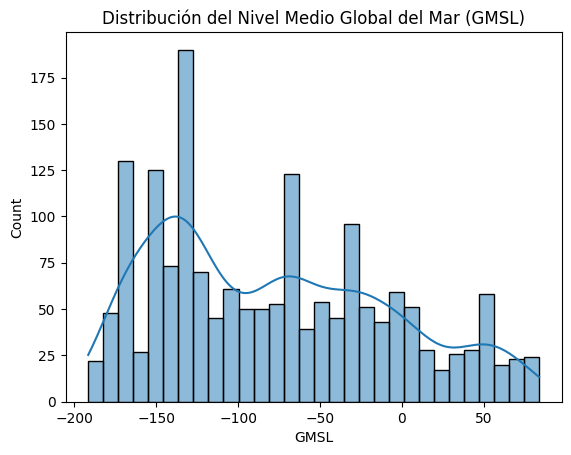

In [ ]:
sns.histplot(data=df, x='GMSL', kde=True, bins=30)
plt.title("Distribución del Nivel Medio Global del Mar (GMSL)")
plt.show()

Gráficos de violín

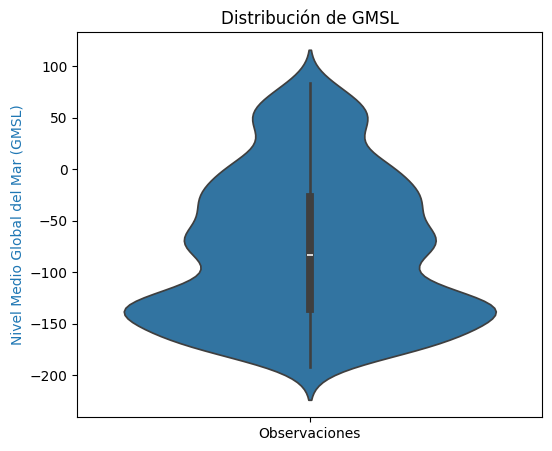

In [ ]:
# Crear la figura y el eje
fig, ax1 = plt.subplots(figsize=(6, 5))

# Gráfico de violín para la distribución de GMSL
sns.violinplot(data=[df['GMSL']], ax=ax1, palette=['tab:blue'])

# Etiquetas
ax1.set_ylabel('Nivel Medio Global del Mar (GMSL)', color='tab:blue')
ax1.set_xticks([0.0])
ax1.set_xticklabels(['Observaciones'])

# Mostrar
plt.title("Distribución de GMSL")
plt.show()

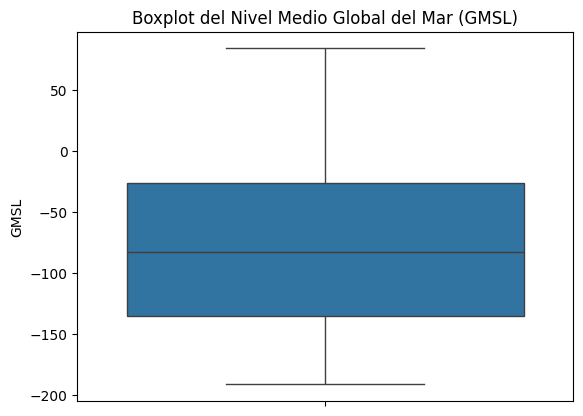

In [ ]:
# Boxplot para GMSL
sns.boxplot(data=df, y='GMSL')
plt.title("Boxplot del Nivel Medio Global del Mar (GMSL)")
plt.ylabel("GMSL")
plt.show()

## Análisis

# Histograma:  

- Se observa que los valores de GMSL se concentran mayoritariamente en torno a valores negativos (aprox. entre -150 y -50).

- La distribución no es completamente normal: parece estar sesgada hacia la derecha.

- Esto sugiere que en gran parte de la serie histórica del nivel medio estaba por debajo del valor de referencia.

# Gráfico de violín:

- Muestra una distribución bimodal o multimodal, con mayor densidad alrededor de dos rangos: Entre -150 y -100 mm. Cerca de -50 y -25 mm.

Esto puede reflejar distintos periodos de la serie y además que el centro de la distribución está en torno a -90 mm, lo cual coincide con la mediana del boxplot.

# Boxplot:

- Mediana ≈ -90 mm, es decir, más de la mitad de las observaciones están por debajo de ese valor.

- Rango intercuartílico (Q1 a Q3) va de aprox. -140 mm a -50 mm, lo que indica la zona de mayor concentración de datos.

- Los valores máximos alcanzan cerca de +60 mm, mientras que el mínimo está alrededor de -200 mm.

- No se perciben outliers extremos marcados, lo que indica datos relativamente consistentes.

### Histogramas

In [ ]:
df.columns.values[0:10]

array(['Date', 'GMSL', 'CO2Conc_', 'CO2Emissions',
       'Long_runNO2Concentration',
       'Per_capitaNO2EmissionsInCO2Equivalents',
       'Long_runCH4Concentration',
       'Per_capitaMethaneEmissionsInCO2Equivalents',
       'GlobalAvgTemp_AnomalyRelativeTo1961_1990',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_'],
      dtype=object)

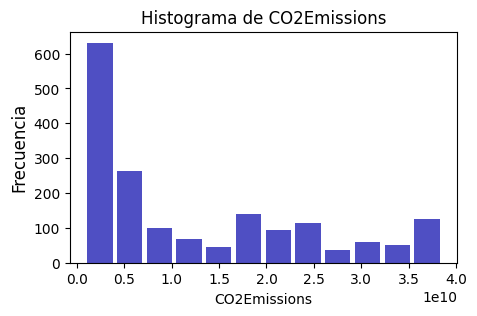

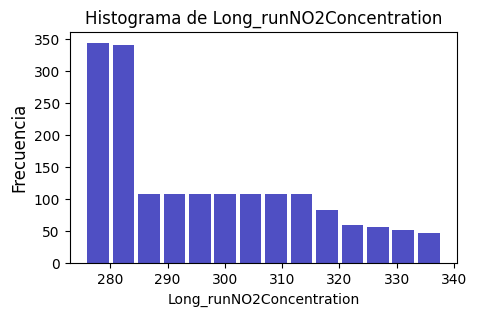

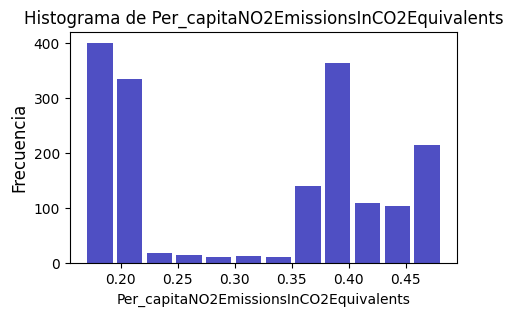

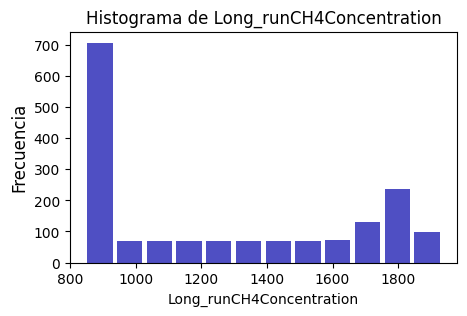

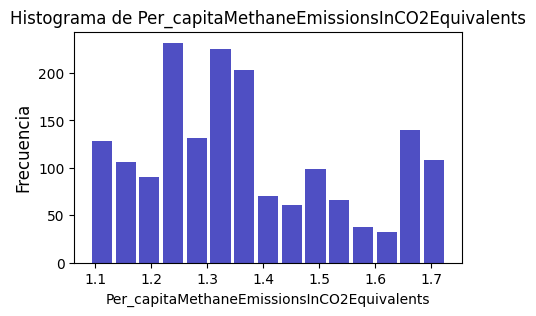

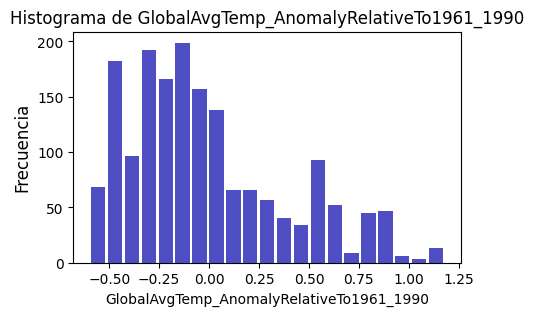

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas de interés (3 a 6)
columnas = df.columns.values[3:9]

# Graficar histogramas
for i in columnas:
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.hist(x=df[i], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    ax.set_xlabel(i, fontsize=10)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_title(f"Histograma de {i}")
    plt.show()


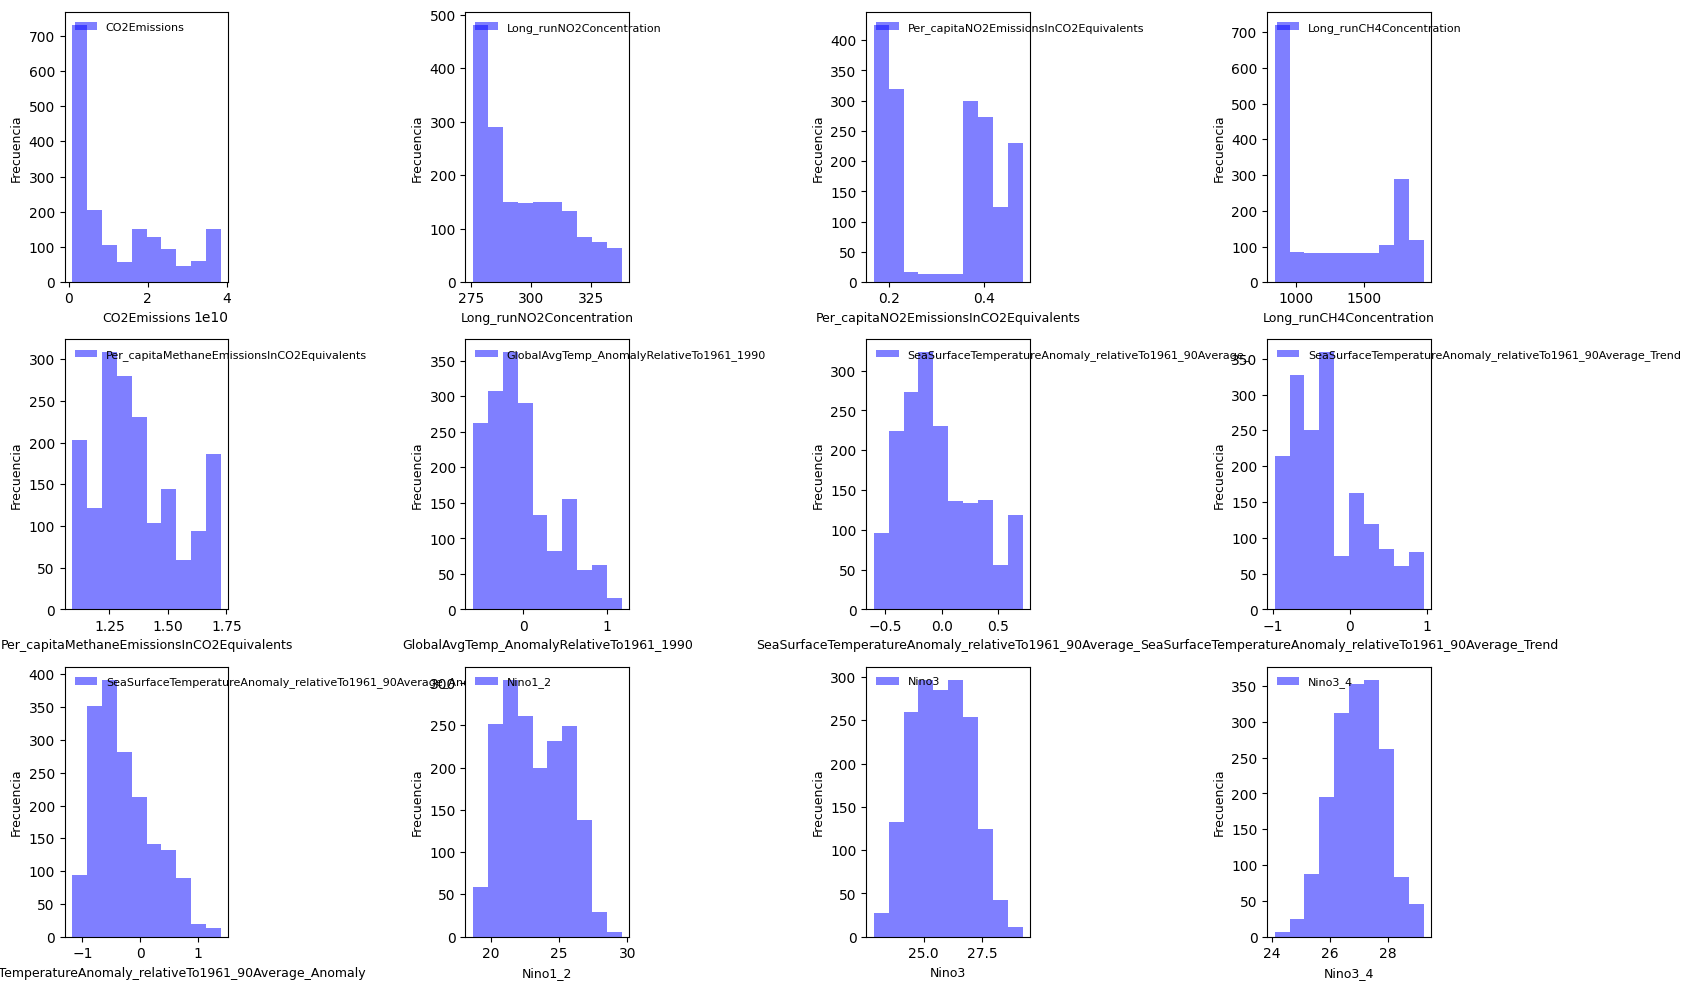

In [ ]:
# Definir número de gráficos por fila
ncols = 4
nrows = int(np.ceil(len(df.columns[3:15]) / (1.0 * ncols)))  # usa función techo

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))
axes = axes.flatten()  # aplanar para iterar más fácil

# Contador de columnas
counter = 3

for idx, ax in enumerate(axes):
    if counter < 15:  # solo hasta la columna 14
        ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5,
                label='{}'.format(df.columns[counter]))
        ax.set_xlabel(df.columns[counter], fontsize=9)
        ax.set_ylabel("Frecuencia", fontsize=9)
        leg = ax.legend(loc='upper left', fontsize=8)
        leg.draw_frame(False)
    else:
        ax.set_axis_off()
    counter += 1

plt.tight_layout()
plt.show()


### Histogramas bivariados

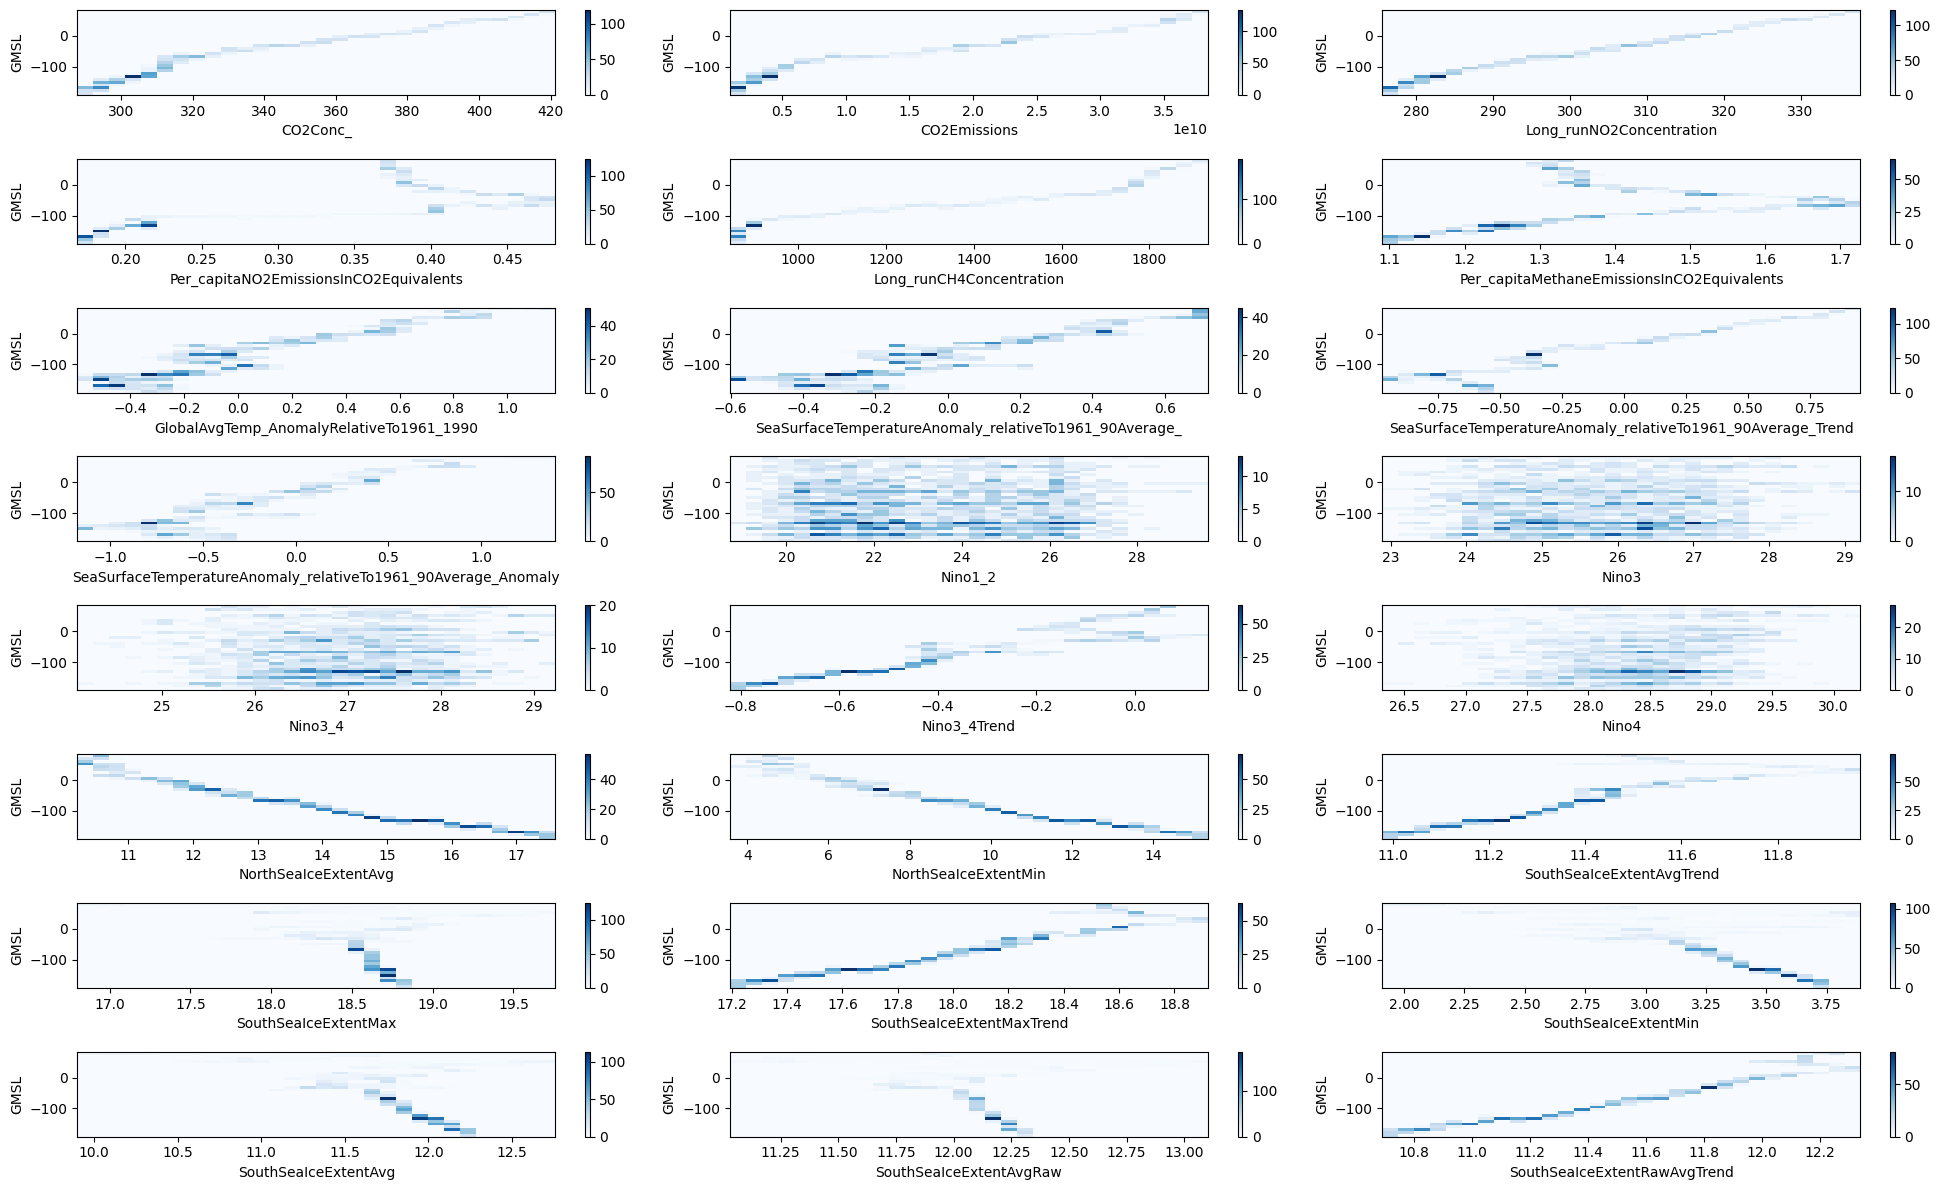

In [ ]:
# Definimos cuántos gráficos estarán dispuestos a lo largo y ancho
ncols = 3
nrows = int(np.ceil((len(df.columns) - 2) / (1.0 * ncols)))  # excluyendo Date y GMSL
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))

# Contador para recorrer columnas desde la 2 en adelante (omitimos Date y GMSL)
counter = 2
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Grafica cuando hay datos
        if counter < len(df.columns):

            colname = df.columns[counter]

            # Histograma bivariado 2D (columna vs GMSL)
            h = ax.hist2d(
                df[colname],
                df['GMSL'],
                bins=30, cmap="Blues"
            )
            ax.set_xlabel(colname)
            ax.set_ylabel('GMSL')

            # Barra de color
            plt.colorbar(h[3], ax=ax)

        # Remueve ejes cuando no hay más datos
        else:
            ax.set_axis_off()

        counter += 1

plt.tight_layout()
plt.show()

### Matriz de correlaciones

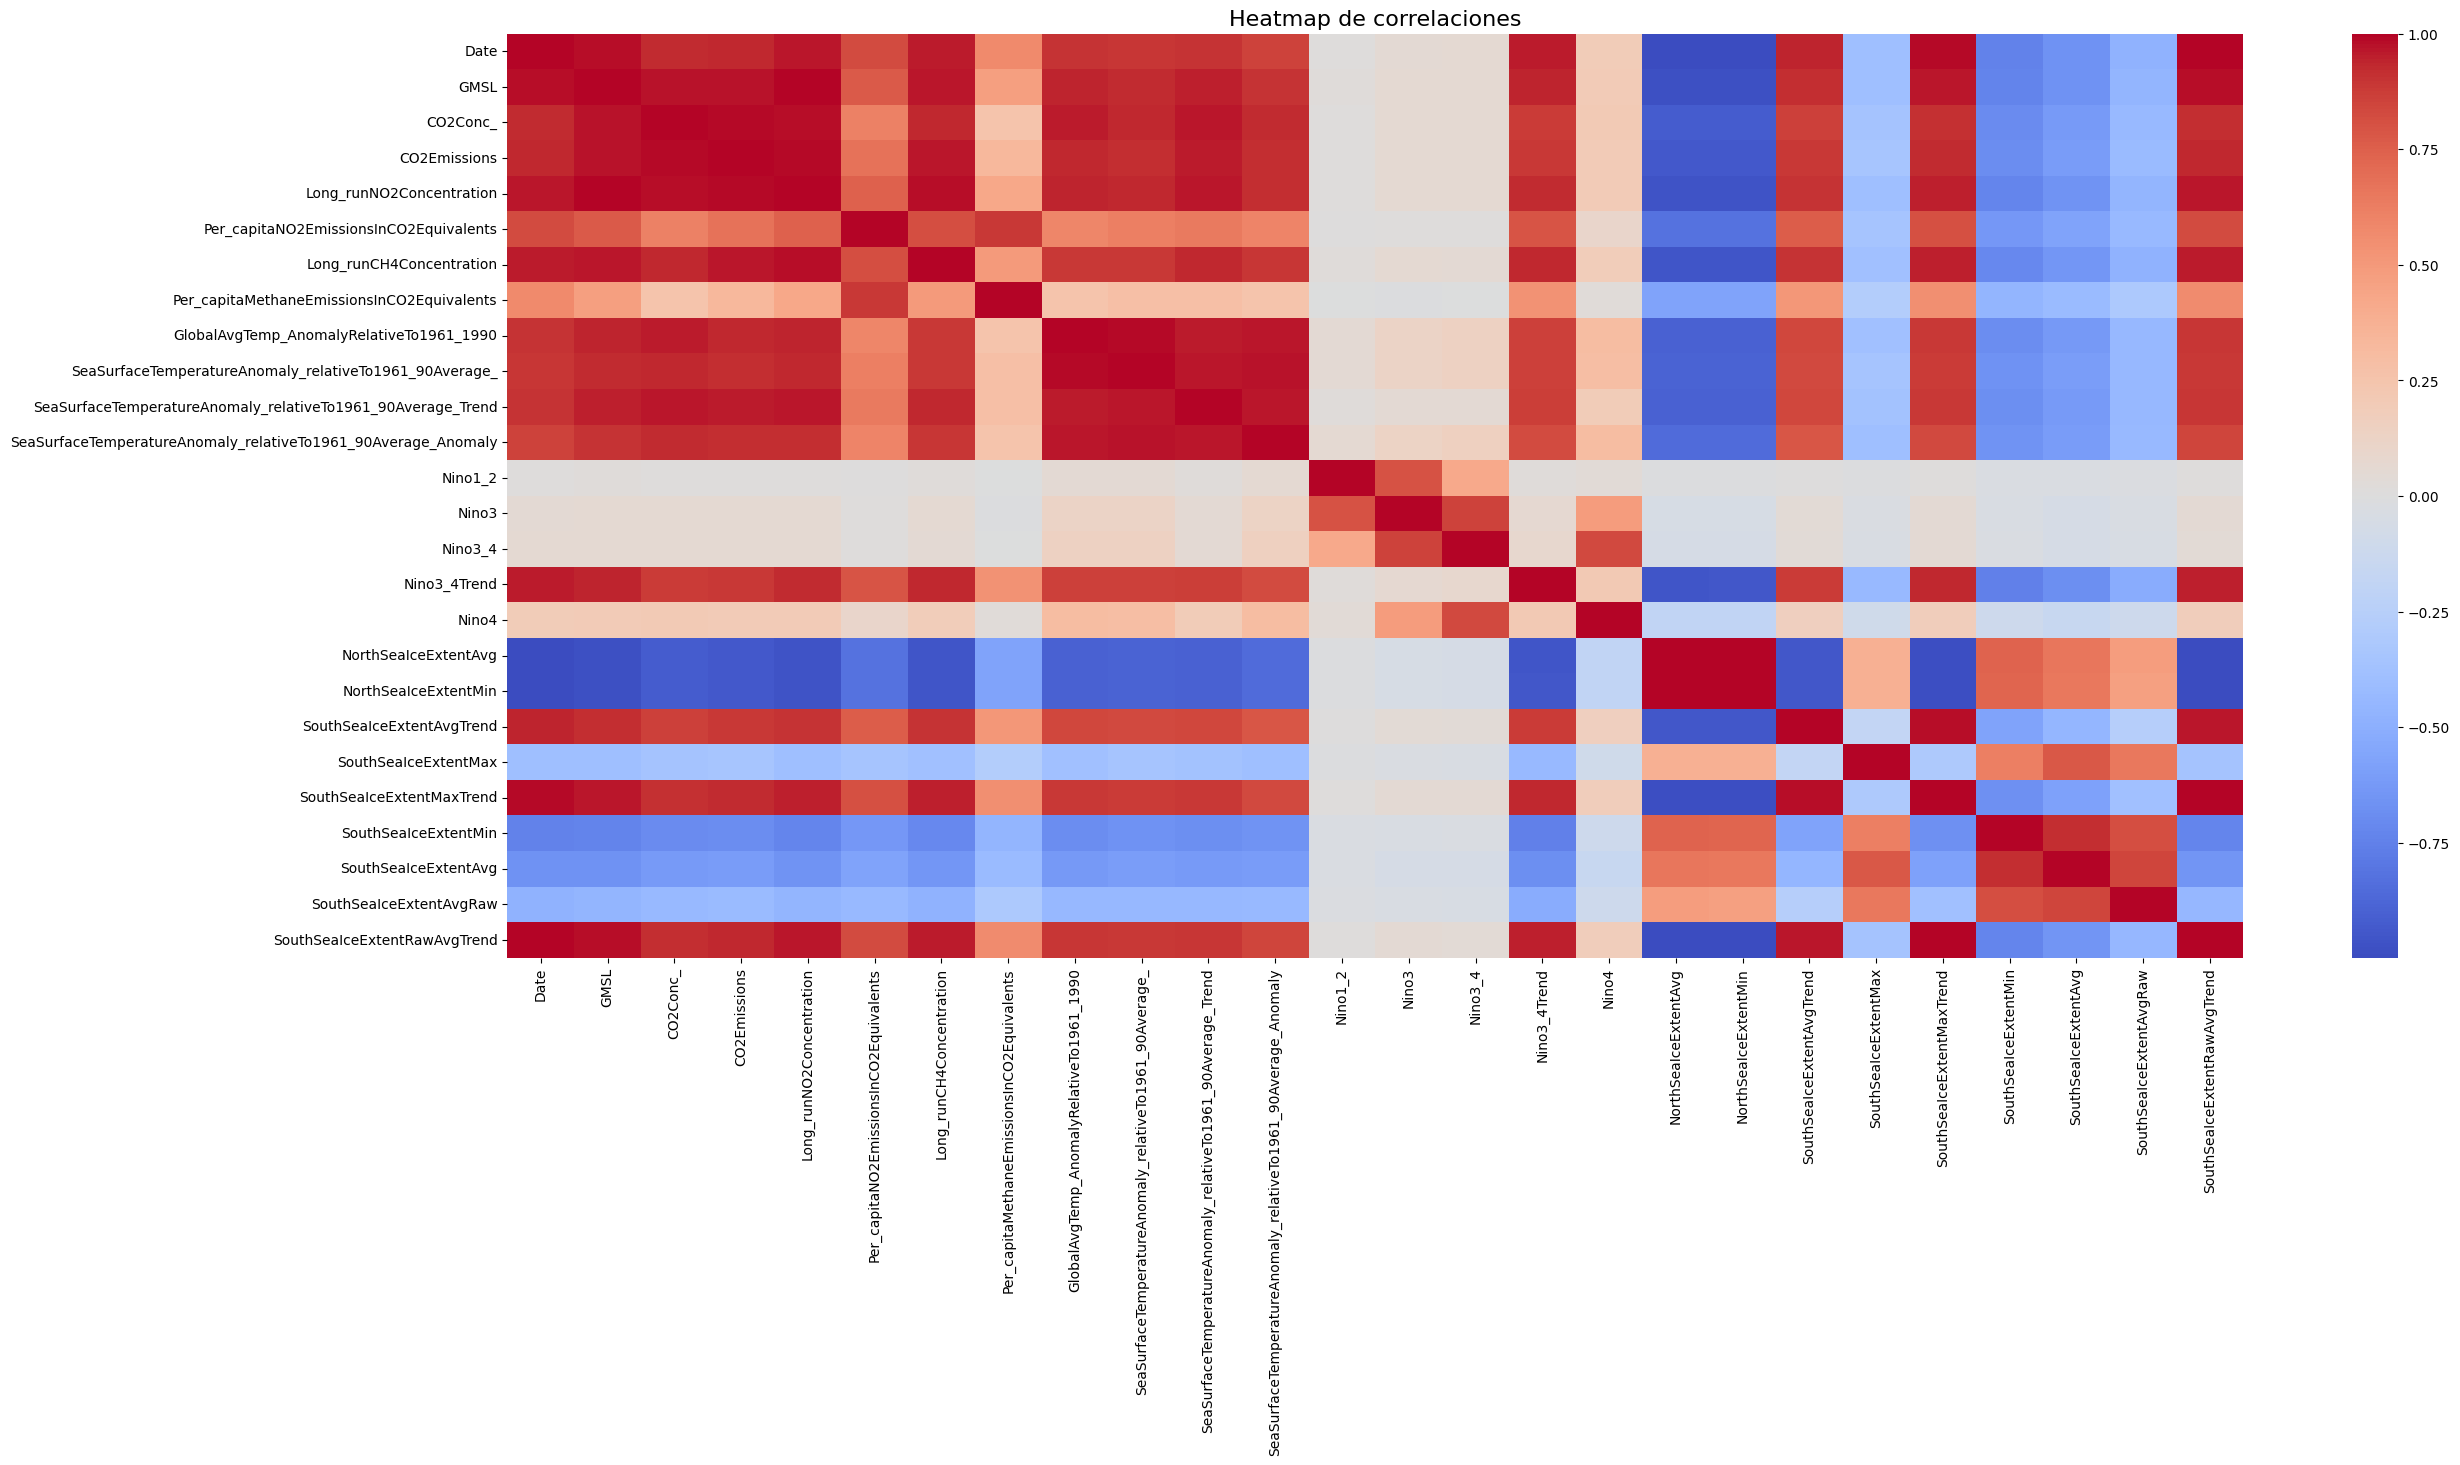

In [ ]:
# Definimos tamaño de la figura
fig_dims = (28, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Matriz de correlación
corr = df.corr()

# Heatmap
sns.heatmap(corr, ax=ax, cmap="coolwarm", center=0, annot=False)

# Mostrar
plt.title("Heatmap de correlaciones", fontsize=16)
plt.show()

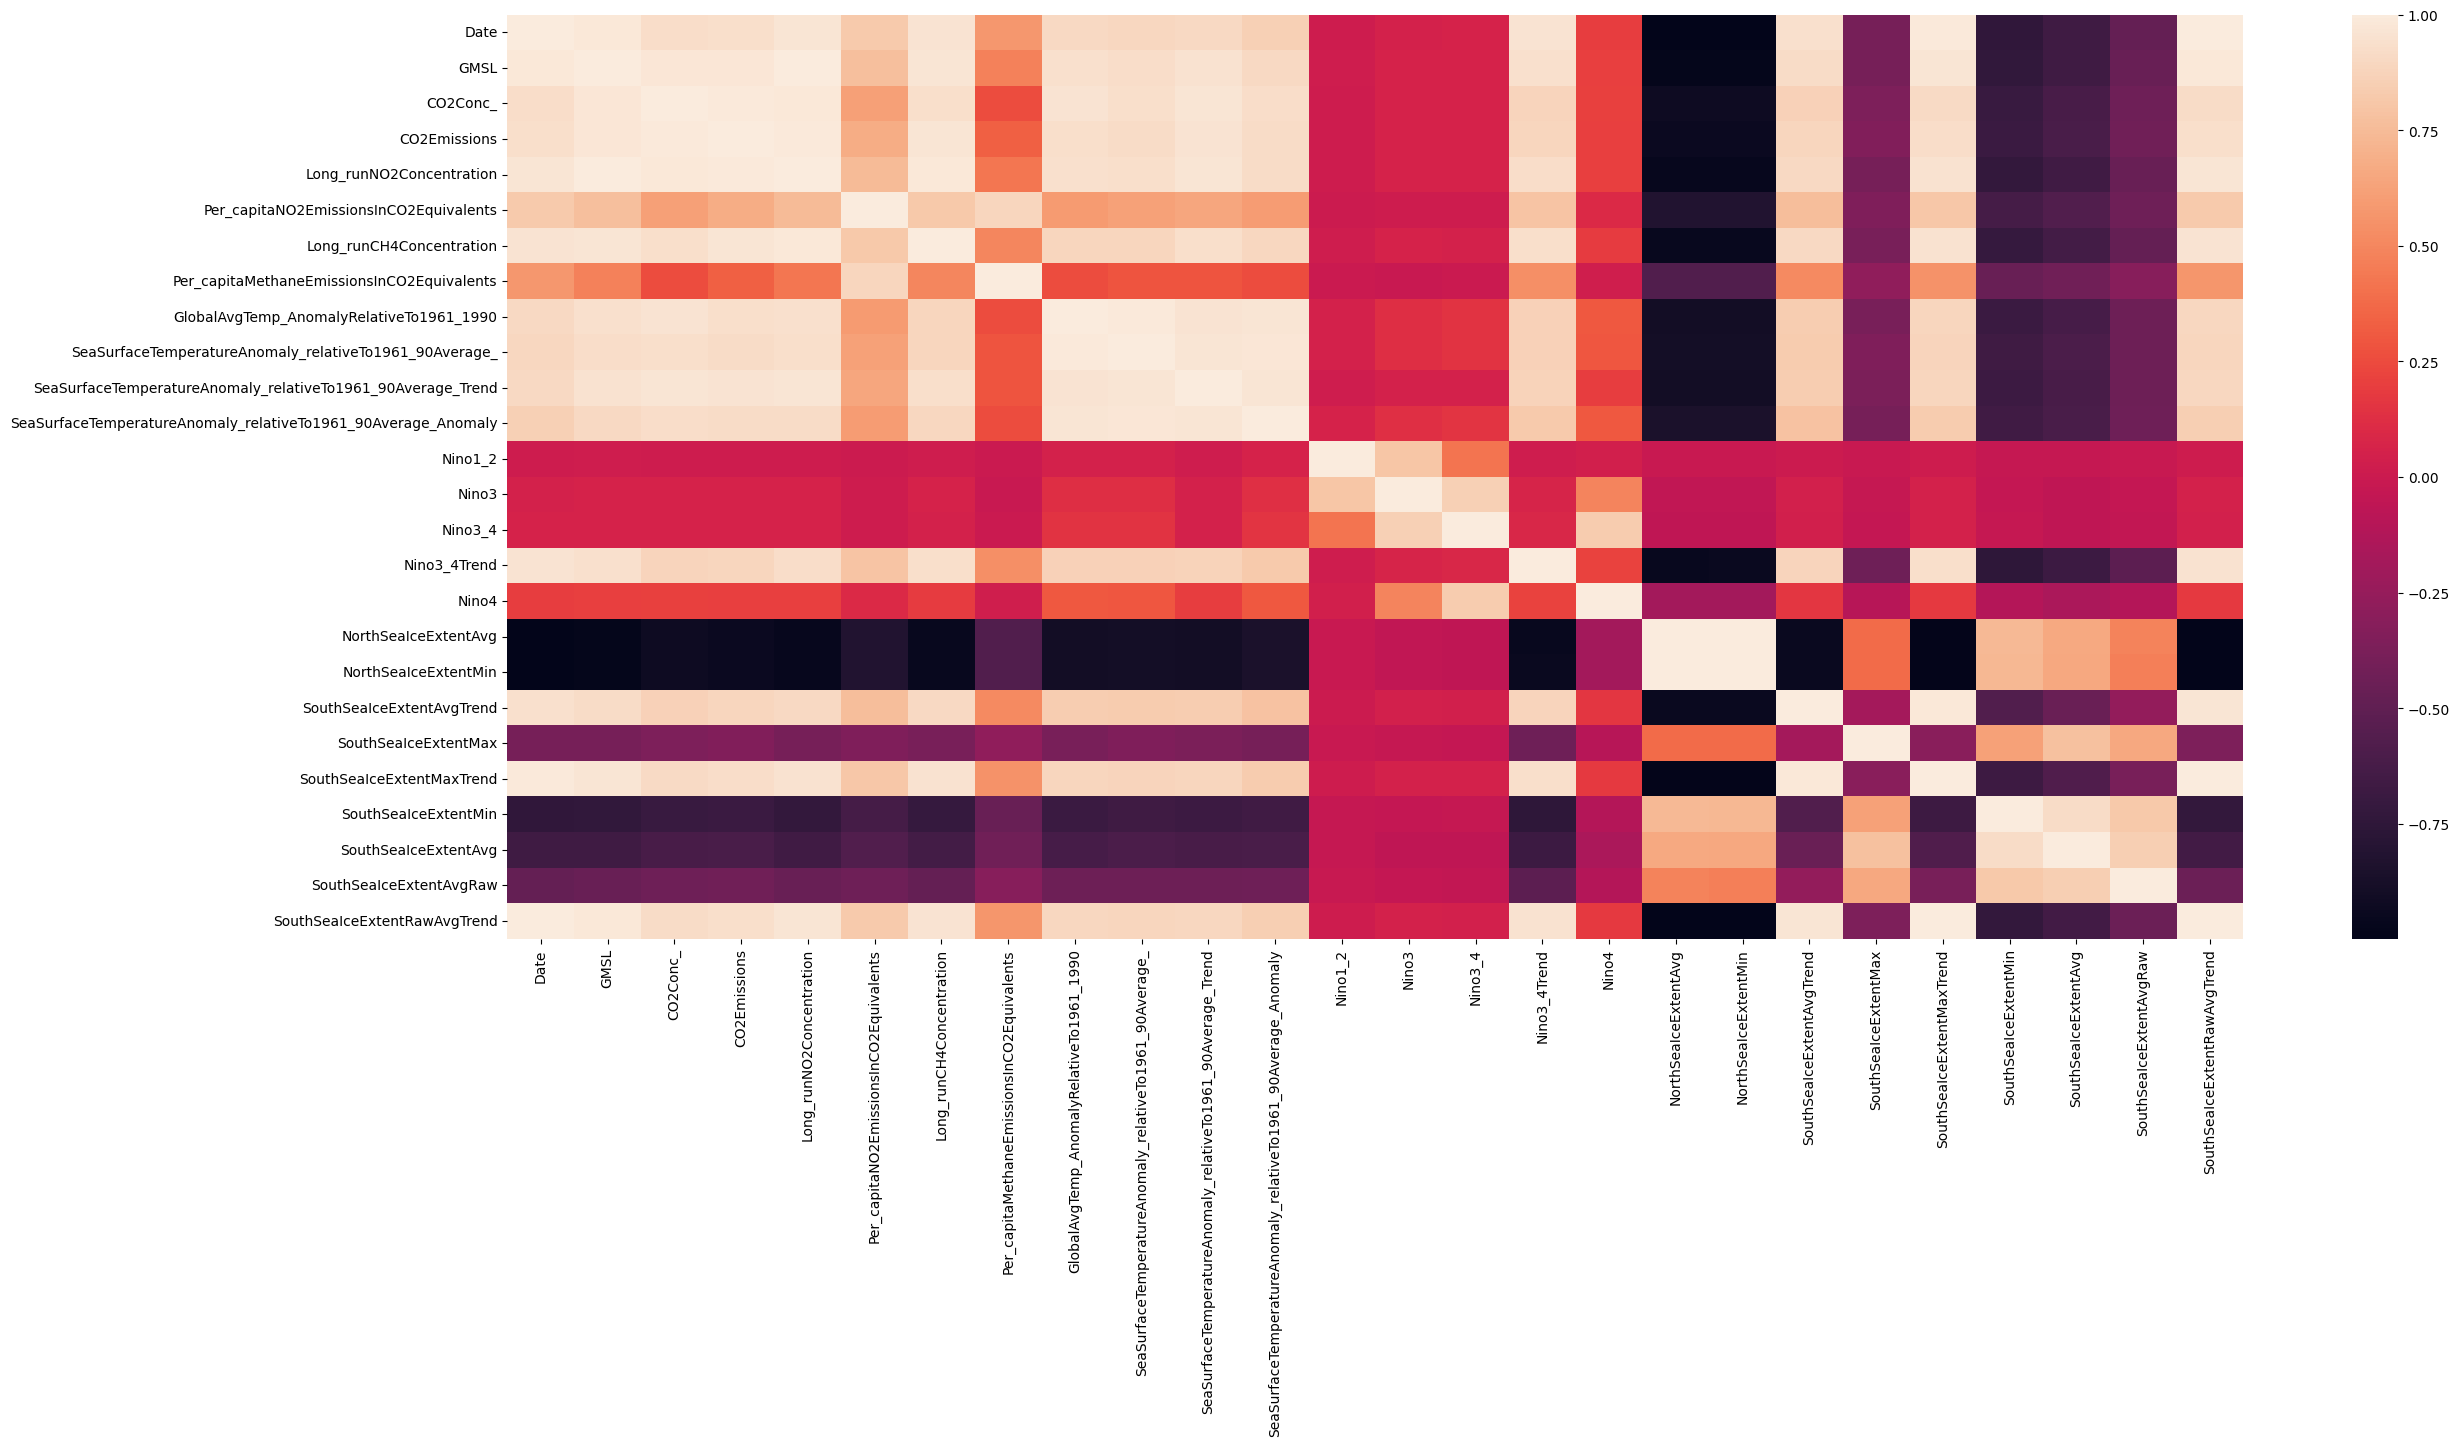

In [ ]:
fig_dims = (28, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax,  annot=False)
plt.show()

/tmp/ipython-input-1032476977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_gmsl.values, y=corr_gmsl.index, palette="coolwarm")


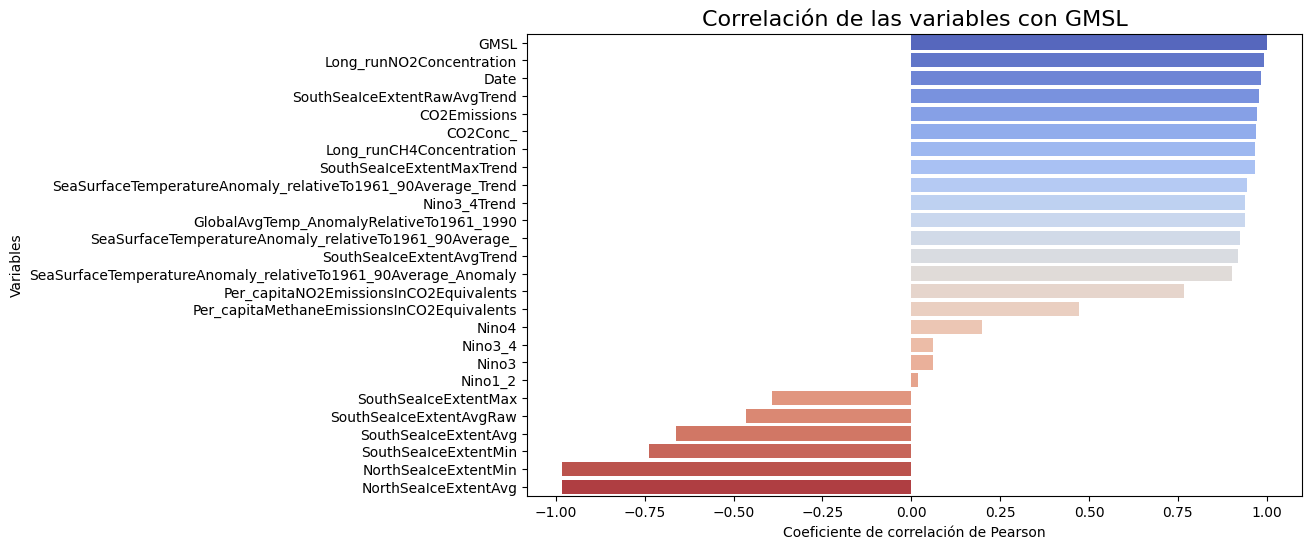

In [ ]:
# Calculamos correlaciones con respecto a GMSL
corr_gmsl = df.corr()["GMSL"].sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=corr_gmsl.values, y=corr_gmsl.index, palette="coolwarm")
plt.title("Correlación de las variables con GMSL", fontsize=16)
plt.xlabel("Coeficiente de correlación de Pearson")
plt.ylabel("Variables")
plt.show()

In [ ]:
df.corr()

Date      GMSL  \
Date                                                1.000000  0.983661   
GMSL                                                0.983661  1.000000   
CO2Conc_                                            0.925907  0.969096   
CO2Emissions                                        0.936821  0.973400   
Long_runNO2Concentration                            0.968579  0.993238   
Per_capitaNO2EmissionsInCO2Equivalents              0.827164  0.768547   
Long_runCH4Concentration                            0.959433  0.967722   
Per_capitaMethaneEmissionsInCO2Equivalents          0.572021  0.471690   
GlobalAvgTemp_AnomalyRelativeTo1961_1990            0.903879  0.938202   
SeaSurfaceTemperatureAnomaly_relativeTo1961_90A...  0.898460  0.925767   
SeaSurfaceTemperatureAnomaly_relativeTo1961_90A...  0.902895  0.945821   
SeaSurfaceTemperatureAnomaly_relativeTo1961_90A...  0.856982  0.903044   
Nino1_2                                             0.014244  0.017996   
Nino3                                               0.054844  0.060377   
Nino3_4                                             0.057996  0.060619   
Nino3_4Trend                                        0.959485  0.938853   
Nino4                                               0.193057  0.200167   
NorthSeaIceExtentAvg                               -0.998535 -0.982486   
NorthSeaIceExtentMin                               -0.997181 -0.981500   
SouthSeaIceExtentAvgTrend                           0.942886  0.919700   
SouthSeaIceExtentMax                               -0.390940 -0.391469   
SouthSeaIceExtentMaxTrend                           0.987105  0.966551   
SouthSeaIceExtentMin                               -0.743032 -0.738484   
SouthSeaIceExtentAvg                               -0.665874 -0.663262   
SouthSeaIceExtentAvgRaw                            -0.476171 -0.464164   
SouthSeaIceExtentRawAvgTrend                        0.995594  0.978158   

                                                    CO2Conc_  CO2Emissions  \
Date                                                0.925907      0.936821   
GMSL                                                0.969096      0.973400   
CO2Conc_                                            1.000000      0.988168   
CO2Emissions                                        0.988168      1.000000   
Long_runNO2Concentration                            0.982579      0.989743   
Per_capitaNO2EmissionsInCO2Equivalents              0.610449      0.678102   
Long_runCH4Concentration                            0.935331      0.967945   
Per_capitaMethaneEmissionsInCO2Equivalents          0.258020      0.335171   
GlobalAvgTemp_AnomalyRelativeTo1961_1990            0.958631      0.933939   
SeaSurfaceTemperatureAnomaly_relativeTo1961_90A...  0.935864      0.917256   
SeaSurfaceTemperatureAnomaly_relativeTo1961_90A...  0.965799      0.960862   
SeaSurfaceTemperatureAnomaly_relativeTo1961_90A...  0.926044      0.919031   
Nino1_2                                             0.014804      0.014043   
Nino3                                               0.060943      0.060125   
Nino3_4                                             0.058131      0.055963   
Nino3_4Trend                                        0.881486      0.888155   
Nino4                                               0.205117      0.197467   
NorthSeaIceExtentAvg                               -0.925115     -0.937526   
NorthSeaIceExtentMin                               -0.923760     -0.936771   
SouthSeaIceExtentAvgTrend                           0.866338      0.887831   
SouthSeaIceExtentMax                               -0.365338     -0.346128   
SouthSeaIceExtentMaxTrend                           0.910330      0.925433   
SouthSeaIceExtentMin                               -0.694406     -0.687436   
SouthSeaIceExtentAvg                               -0.623384     -0.609628   
SouthSeaIceExtentAvgRaw                            -0.434302     -0.427121   
SouthSeaIceExtentRawAvgTrend 

## Análisis

# GMSL está muy correlacionado con:
- Concentraciones de CO₂ (CO2Conc_)

- Emisiones de CO₂ (CO2Emissions, Per_capitaNO2EmissionsInCO2equivalents)

- Concentración de CH₄ (Long_runCH4Concentration Per_capitaMethaneEmissionsInCO2equivalents)

- Anomalías de temperatura global y superficial del mar (GlobalAvgTemp_AnomalyRelativeTo1961_1990, SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average)

Esto nos presenta una confrimación inial en cuanto a que el aumento de gases de efecto invernadero y temperaturas está directamente relacionado con la subida del nivel del mar.

# Correlaciones negativas:

El GMSL muestra correlación negativa fuerte con la extensión del hielo marino (SeaIceExtent, tanto del norte como del sur). A medida que sube el nivel del mar y aumentan las temperaturas, la extensión de hielo tiende a reducirse. Esto es un patrón esperado y refuerza la validez de los datos.

# Variables ENSO (Nino índices)

Los índices Niño (Niño1, Niño2, Niño3, Niño4) muestran correlaciones más débiles o localizadas con el GMSL. Esto tiene sentido porque el ENSO afecta fluctuaciones interanuales de corto plazo, mientras que el nivel del mar responde a una tendencia de más largo plazo.

Sin embargo, podría aportar información para explicar variabilidad estacional en el modelo.

# Multicolinealidad

Hay bloques rojos muy intensos entre las variables de gases de efecto invernadero, anomalías de temperatura y emisiones. Esto indica alta colinealidad enmarcado en que muchas de estas variables explican lo mismo y podrían causar problemas en modelos lineales.


Seleccionamos pares de valores con mayor correlación

In [ ]:
c = df.corr().abs()

# Reorganizar en pares
s = c.unstack()

# Ordenar valores
so = s.sort_values(kind="quicksort")

# Filtrar pares con correlación muy alta, excluyendo 1
alta_corr = so[(so < 0.999) & (so > 0.9)]
print("Pares de variables con correlación alta:")
print(alta_corr)

# Filtrar específicamente correlaciones con GMSL
corr_gmsl = c["GMSL"].sort_values(ascending=False)
print("\nCorrelación de cada variable con GMSL:")
print(corr_gmsl)


Pares de variables con correlación alta:
NorthSeaIceExtentMin                                         SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend    0.900052
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend  NorthSeaIceExtentMin                                           0.900052
                                                             NorthSeaIceExtentAvg                                           0.901460
NorthSeaIceExtentAvg                                         SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend    0.901460
NorthSeaIceExtentMin                                         GlobalAvgTemp_AnomalyRelativeTo1961_1990                       0.901534
                                                                                                                              ...   
Date                                                         NorthSeaIceExtentMin                                           0.997181
                            

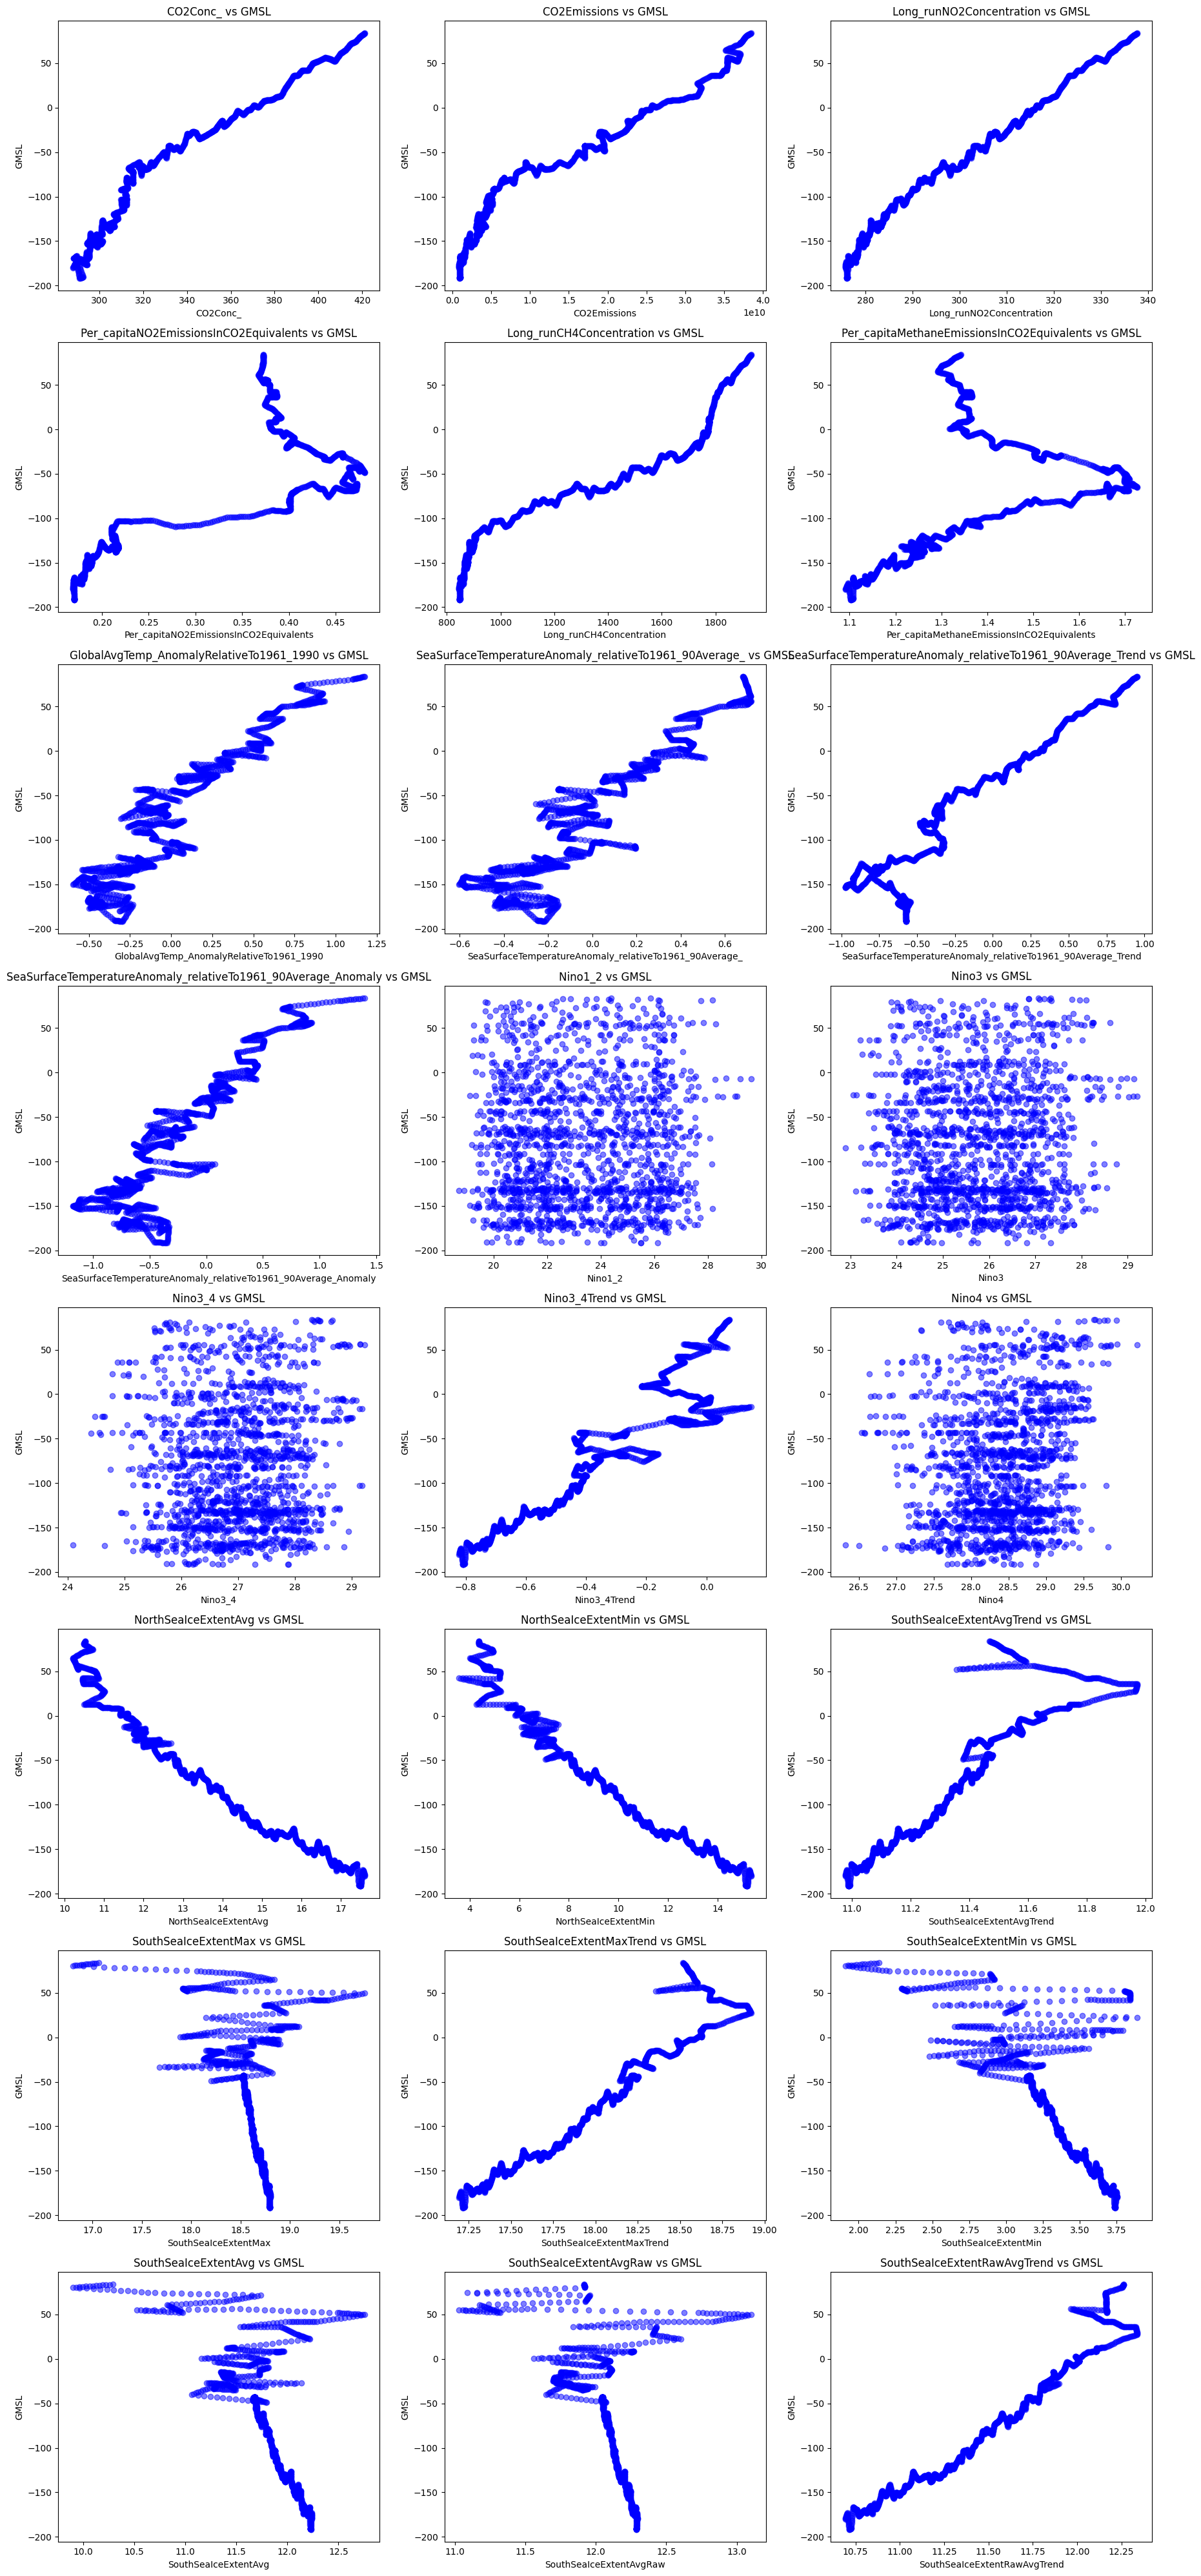

In [ ]:
# Seleccionamos todas las variables excepto la fecha y GMSL
vars_atmos = [col for col in df.columns if col not in ["Date", "GMSL"]]

# Definimos tamaño de grilla
ncols = 3
nrows = int(np.ceil(len(vars_atmos) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5*nrows))

# Aplanar ejes para iterar fácilmente
axes = axes.flatten()

# Generar scatter plots
for i, col in enumerate(vars_atmos):
    axes[i].scatter(df[col], df["GMSL"], alpha=0.5, color="blue")
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("GMSL", fontsize=10)
    axes[i].set_title(f"{col} vs GMSL")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1729 non-null   datetime64[ns]
 1   GMSL                                                           1729 non-null   float64       
 2   CO2Conc_                                                       1729 non-null   float64       
 3   CO2Emissions                                                   1729 non-null   float64       
 4   Long_runNO2Concentration                                       1729 non-null   float64       
 5   Per_capitaNO2EmissionsInCO2Equivalents                         1729 non-null   float64       
 6   Long_runCH4Concentration                                       1729 non-null   float64       
 7

In [ ]:
def correlation(dataset, cor):
    df = dataset.copy()
    col_corr = set()                 # Almacena elementos no repetidos
    corr_matrix = dataset.corr()     #Matriz de correlaciones
    for i in range(len(corr_matrix.columns)):             #Conteo en filas de la matriz correlación
        #print('i',i)
        for j in range(i):                                #Conteo en columnas por debajo de la diagonal, pues la matriz es simétrica
            #print('j',j)
            if abs(corr_matrix.iloc[i, j]) > cor:         #Valor absoluto de las correlaciones
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    df.drop(col_corr,axis = 1,inplace = True)             #Descriptores a eliminarse
    return df,col_corr

cor=0.9
select,selecnames=correlation(df, cor)
select.shape

(1729, 10)

In [ ]:
select.shape

(1729, 10)

In [ ]:
print(selecnames)


{'NorthSeaIceExtentMin', 'SouthSeaIceExtentAvg', 'GMSL', 'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_', 'GlobalAvgTemp_AnomalyRelativeTo1961_1990', 'NorthSeaIceExtentAvg', 'Nino3_4Trend', 'CO2Conc_', 'SouthSeaIceExtentMaxTrend', 'SouthSeaIceExtentRawAvgTrend', 'Long_runNO2Concentration', 'CO2Emissions', 'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Anomaly', 'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend', 'SouthSeaIceExtentAvgTrend', 'Long_runCH4Concentration'}


# Modelo de Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 2:8]     # Ajusta según tus columnas de predictores
y = df['GMSL']

# División del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [ ]:
X_train.shape

(1383, 6)

In [ ]:
X_train.values.reshape(-1,1).shape


(8298, 1)

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [ ]:
x_train_scaled ;

In [ ]:
import time
from sklearn.linear_model import LinearRegression

# Regresión lineal
start_time = time.time()
lr = LinearRegression()
reg = lr.fit(x_train_scaled, y_train)
print("LinearReg Tiempo de entrenamiento: {:.3f} segundos".format(time.time() - start_time))
print('Coeficientes del modelo lineal: ', reg.coef_)
print('Intercepto: ', reg.intercept_)


LinearReg Tiempo de entrenamiento: 0.021 segundos
Coeficientes del modelo lineal:  [205.34408886 -74.98635425 126.73236718  10.81357649  -6.02874905
  36.33088925]
Intercepto:  -178.26741481807233


In [ ]:
reg.coef_.shape

(6,)

In [ ]:
y_test.shape

(346,)

In [ ]:
resultados={}
y_pred_test = lr.predict(x_test_scaled)        # Predicción con datos del set de prueba
y_pred_train = lr.predict(x_train_scaled)

mae = mean_absolute_error(y_test, y_pred_test) # Calculando métrica MAE
r2 = r2_score(y_test, y_pred_test)             # Calculando métrica R2
mse = mean_squared_error(y_test, y_pred_test)
residuales = y_test - y_pred_test              #Residuales
# Guardando los resultados en un diccionario
scoring = {'MAE': mae,
           'R2' :r2,
           'MSE': mse,
           'RS': residuales
         }
resultados['RL']=scoring

In [ ]:
resultados

{'RL': {'MAE': 4.740136078755093,
  'R2': 0.9930968147454594,
  'MSE': 33.87447735286391,
  'RS': 599     -1.111685
  1201    -0.933251
  628      2.154887
  1711    -9.385174
  1263    -3.074154
            ...    
  100     -6.713548
  274     12.943336
  1206     3.888491
  101     -6.386842
  1084    -8.583292
  Name: GMSL, Length: 346, dtype: float64}}

In [ ]:
resultado_test_regresion = pd.DataFrame(data=resultados)
resultado_test_regresion.head()

RL
MAE                                           4.740136
R2                                            0.993097
MSE                                          33.874477
RS   599     -1.111685
1201    -0.933251
628      2...

## Análisis

Resultados

MAE (Error Absoluto Medio) = 4.74
En promedio, el modelo se equivoca en ~4.7 mm de nivel del mar respecto a los valores reales.

MSE (Error Cuadrático Medio) = 33.87
El error cuadrático penaliza más los errores grandes; indica que, aunque la mayoría de predicciones son muy buenas, existen algunos valores con errores más altos.

R² = 0.993
Este resultado significa que el modelo creado explica el 99.3% de la variabilidad del nivel medio del mar a partir de las variables atmosféricas y climáticas.

Residuales (RS)
Son las diferencias entre los valores reales y los predichos. Estos ayudan a diagnosticar:

- Si los residuales están centrados en 0, el modelo no presenta sesgo.

- Si hay valores grandes, el modelo en esos puntos no ajustó tan bien.

In [ ]:
if 'Date' in X.columns:
    print("Date está incluido en los predictores")
else:
    print("Date NO está en los predictores")


Date NO está en los predictores


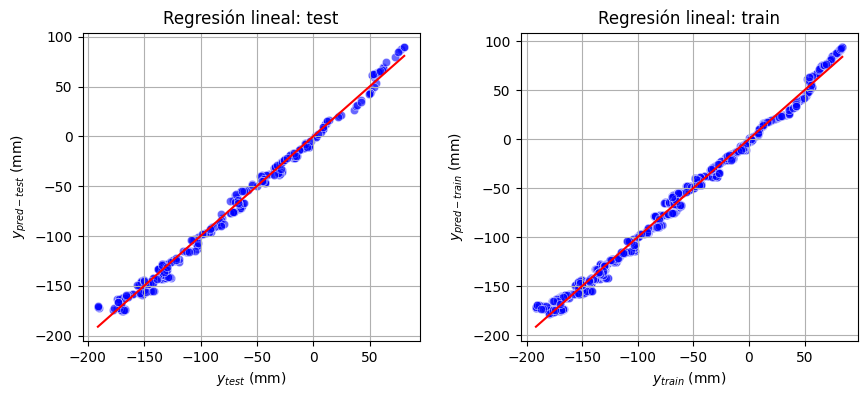

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.scatterplot(x=y_test, y=y_pred_test, color='b', alpha=0.6,  ax = ax[0])
sns.lineplot(x=y_test, y=y_test, color='r', ax = ax[0])
ax[0].set_title('Regresión lineal: test')
ax[0].set_ylabel(r'$y_{pred-test}$ (mm)'), ax[0].set_xlabel(r'$y_{test}$ (mm)')
#ax[0].set_xlim([0,400]), ax[0].set_ylim([0,400])
ax[0].grid(True)

sns.scatterplot(x=y_train, y=y_pred_train, color='b', alpha=0.6,  ax = ax[1])
sns.lineplot(x=y_train, y=y_train, color='r', ax = ax[1])
ax[1].set_title('Regresión lineal: train')
ax[1].set_ylabel(r'$y_{pred-train}$ (mm)'), ax[1].set_xlabel(r'$y_{train}$ (mm)')
#ax[1].set_xlim([0,400]), ax[1].set_ylim([0,400])
ax[1].grid(True)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Curvas de Aprendizaje

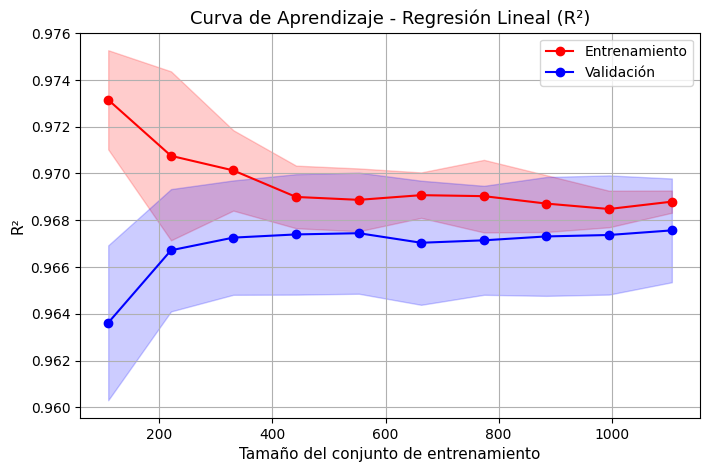

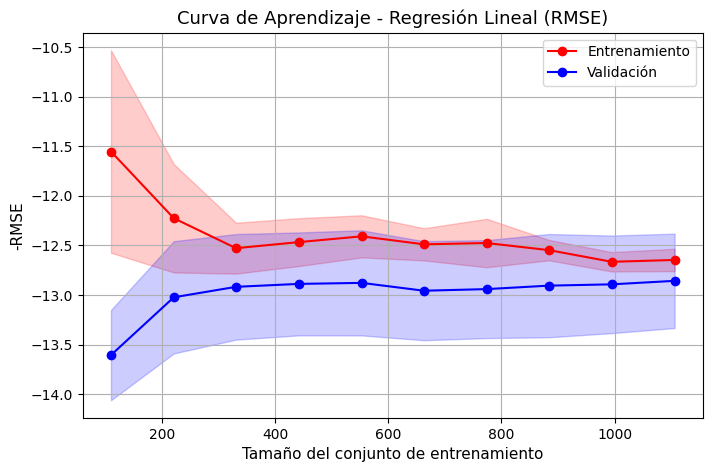

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# --- Función para graficar curva de aprendizaje ---
def plot_learning_curve(model, X, y, title, scoring='r2', ylabel='R²'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    # Promedio y desviación estándar
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # Gráfica
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title, fontsize=13)
    plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# ==========================================
# --- Curva de Aprendizaje para R² ---
# ==========================================
lr_model = LinearRegression()
plot_learning_curve(lr_model, x_train_scaled, y_train,
                    "Curva de Aprendizaje - Regresión Lineal (R²)",
                    scoring='r2',
                    ylabel='R²')

# ==========================================
# --- Curva de Aprendizaje para RMSE ---
# ==========================================
# sklearn no tiene RMSE directo, así que usamos 'neg_root_mean_squared_error'
plot_learning_curve(lr_model, x_train_scaled, y_train,
                    "Curva de Aprendizaje - Regresión Lineal (RMSE)",
                    scoring='neg_root_mean_squared_error',
                    ylabel='-RMSE')



## Análisis

# Distribución de puntos:

En train y en test, los puntos azules se alinean muy bien sobre la recta roja (la bisectriz), lo que indica que el modelo reproduce fielmente los valores observados.

La dispersión alrededor de la recta es pequeña y bastante simétrica, lo que indica que no parece haber un sesgo sistemático.

# R² ≈ 0.993 confirmado visualmente

La proximidad de los puntos a la recta muestra que el 99% de la variabilidad de GMSL está siendo capturada.

No hay una diferencia apreciable entre train y test, enmarcando que el modelo no está sobreajustado.

# Errores residuales

Aunque el ajuste es muy bueno, se aprecian algunos puntos ligeramente más alejados de la recta (sobre todo en valores extremos,< -150 y > 50). Esto coincide con los residuales de ±10–13 que se obtuvieron el la cuadrilla anterior.

Eso sugiere que el modelo lineal capta muy bien la tendencia global, pero pierde algo de precisión en los extremos.

# Interpretación global

El modelo de Regresión Lineal con las 6 variables predictoras es altamente explicativo para GMSL.

Se puede concluir que la relación entre emisiones / concentraciones y el nivel medio del mar es fundamentalmente lineal dentro de este rango de datos.

No hay señales fuertes de sobreajuste ni subajuste.

## Regresión Ridge


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1729 non-null   datetime64[ns]
 1   GMSL                                                           1729 non-null   float64       
 2   CO2Conc_                                                       1729 non-null   float64       
 3   CO2Emissions                                                   1729 non-null   float64       
 4   Long_runNO2Concentration                                       1729 non-null   float64       
 5   Per_capitaNO2EmissionsInCO2Equivalents                         1729 non-null   float64       
 6   Long_runCH4Concentration                                       1729 non-null   float64       
 7

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


x = df.drop(['GMSL', 'Date'], axis=1)   # Variables predictoras (quitamos GMSL y Date)
y = df['GMSL']       # Variable objetivo (nivel medio del mar)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
x_train.shape

(1383, 24)

In [ ]:
x_train_scaled;

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled;

In [ ]:
from sklearn import linear_model

start_time = time.time()
rd = linear_model.Ridge()
reg = rd.fit(x_train_scaled, y_train)

print("Ridge Tiempo de entrenamiento: {:.3f} segundos".format(time.time() - start_time))
print('Coeficientes del modelo lineal: ', reg.coef_)
print('Intercepto: ', reg.intercept_)


Ridge Tiempo de entrenamiento: 0.043 segundos
Coeficientes del modelo lineal:  [ 66.67396642  22.63541443  74.99564569  12.20060318 -20.29695622
   9.56996918  23.93492392  -1.69935704   9.52202314  -8.72855807
   1.18809141  -2.18299563   3.0354147   11.78374626  -1.822749
 -29.53170812 -21.57027476 -13.54967922  -0.5246776   14.89218478
  -3.70202483  -2.59526498  10.42620194  18.10803017]
Intercepto:  -131.02334703198454


In [ ]:
rd.coef_.shape

(24,)

In [ ]:
y_test.shape

(173,)

In [ ]:
y_val.shape

(173,)

In [ ]:
print(x_test.shape)   # características del test
print(y_test.shape)   # etiquetas del test


(173, 24)
(173,)


In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Búsqueda en varios alphas
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(x_train_scaled, y_train)

print("Mejor alpha encontrado (RidgeCV):", ridge_cv.alpha_)
print("Coeficientes del modelo RidgeCV:", ridge_cv.coef_)
print("Intercepto:", ridge_cv.intercept_)



Mejor alpha encontrado (RidgeCV): 0.001
Coeficientes del modelo RidgeCV: [-138.6423096   -26.87142211  418.78302306   -2.26469755  -60.81947051
  -20.83002806   25.97643451  -24.51856502  -18.60486978   15.61851523
    1.57331661   -4.96813914    8.0753101     5.71461699   -6.96718814
  -74.23733937    5.89984514    2.25415483    1.51660945  -10.40787906
    5.17089239    7.77247171   -3.18200698   29.46589231]
Intercepto: -117.56609259517387


## Evaluar el modelo


In [ ]:
y_pred_train = rd.predict(x_train_scaled)
y_pred_val = rd.predict(x_val_scaled)
y_pred_test = rd.predict(x_test_scaled)

In [ ]:
def evaluar_modelo(modelo, x_train, y_train, x_val, y_val, x_test, y_test):
    """
    Evalúa un modelo en los conjuntos de entrenamiento, validación y prueba.
    Devuelve un DataFrame con las métricas MAE, R2 y MSE.
    """
    resultados = {}

    # Entrenamiento
    y_pred_train = modelo.predict(x_train)
    resultados["Entrenamiento"] = {
        "MAE": mean_absolute_error(y_train, y_pred_train),
        "R2": r2_score(y_train, y_pred_train),
        "MSE": mean_squared_error(y_train, y_pred_train)
    }

    # Validación
    y_pred_val = modelo.predict(x_val)
    resultados["Validación"] = {
        "MAE": mean_absolute_error(y_val, y_pred_val),
        "R2": r2_score(y_val, y_pred_val),
        "MSE": mean_squared_error(y_val, y_pred_val)
    }

    # Prueba
    y_pred_test = modelo.predict(x_test)
    resultados["Prueba"] = {
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "R2": r2_score(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test)
    }

    return pd.DataFrame(resultados).T

In [ ]:
df_metricas = evaluar_modelo(rd, x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test)
df_metricas

MAE        R2        MSE
Entrenamiento  4.162685  0.994857  26.389118
Validación     4.675806  0.993473  31.912337
Prueba         3.965730  0.994897  25.067524

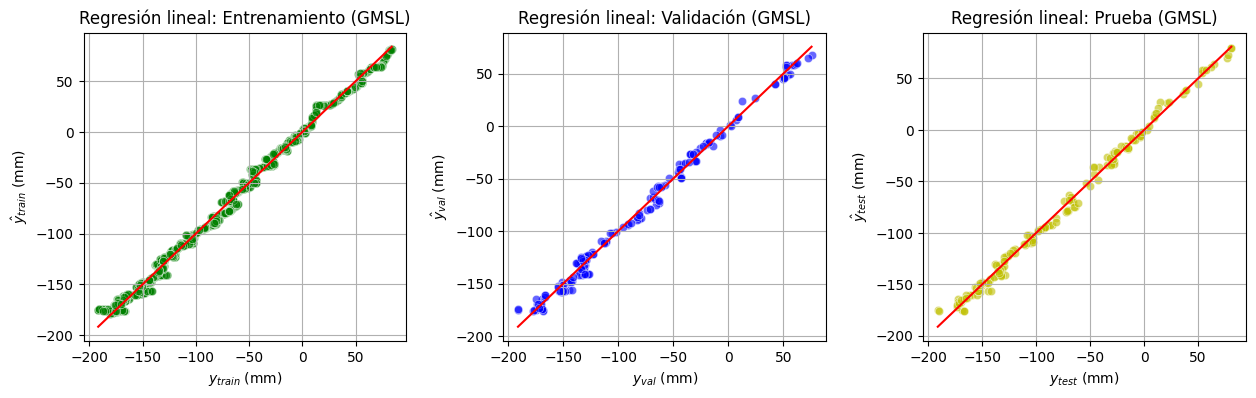

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# --- Train ---
sns.scatterplot(x=y_train, y=y_pred_train, color='g', alpha=0.6, ax=ax[0])
sns.lineplot(x=y_train, y=y_train, color='r', ax=ax[0])
ax[0].set_title('Regresión lineal: Entrenamiento (GMSL)')
ax[0].set_ylabel(r'$\hat{y}_{train}$ (mm)')
ax[0].set_xlabel(r'$y_{train}$ (mm)')
ax[0].grid(True)

# --- Validación ---
sns.scatterplot(x=y_val, y=y_pred_val, color='b', alpha=0.6, ax=ax[1])
sns.lineplot(x=y_val, y=y_val, color='r', ax=ax[1])
ax[1].set_title('Regresión lineal: Validación (GMSL)')
ax[1].set_ylabel(r'$\hat{y}_{val}$ (mm)')
ax[1].set_xlabel(r'$y_{val}$ (mm)')
ax[1].grid(True)

# --- Test ---
sns.scatterplot(x=y_test, y=y_pred_test, color='y', alpha=0.6, ax=ax[2])
sns.lineplot(x=y_test, y=y_test, color='r', ax=ax[2])
ax[2].set_title('Regresión lineal: Prueba (GMSL)')
ax[2].set_ylabel(r'$\hat{y}_{test}$ (mm)')
ax[2].set_xlabel(r'$y_{test}$ (mm)')
ax[2].grid(True)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


## Curvas de Aprendizaje

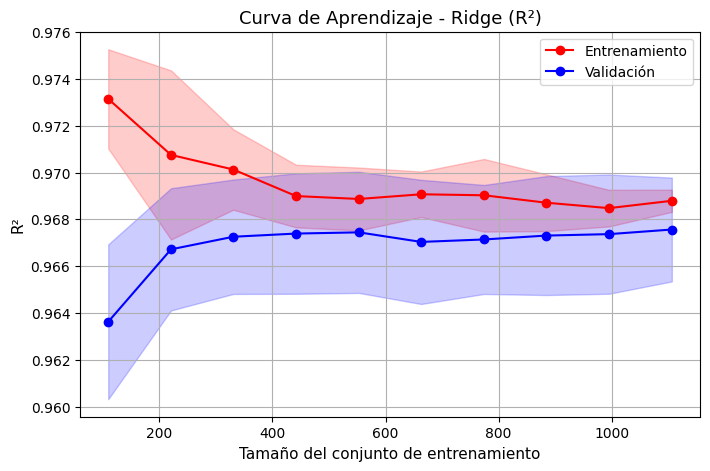

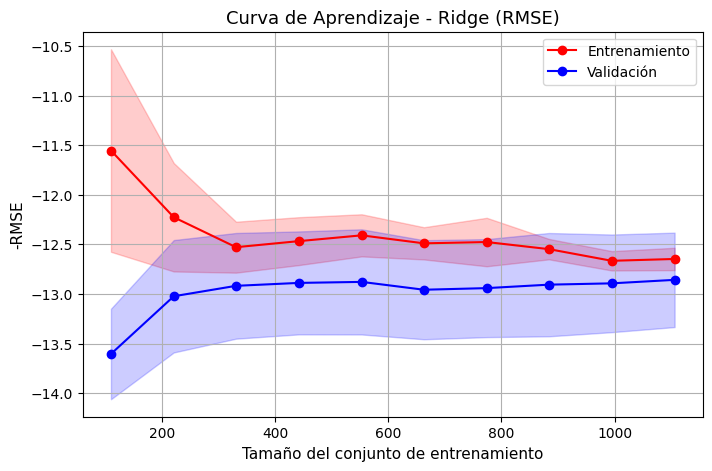

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

# --- Función genérica para graficar curvas de aprendizaje ---
def plot_learning_curve(model, X, y, title, scoring='r2', ylabel='R²'):
    """
    Grafica la curva de aprendizaje para un modelo dado, usando cross-validation.
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    # Promedio y desviación estándar
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # --- Gráfica ---
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title, fontsize=13)
    plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# ==========================================
# --- Curva de Aprendizaje - R² ---
# ==========================================
ridge_model = Ridge(alpha=ridge_cv.alpha_)   # Usa el mejor alpha encontrado
plot_learning_curve(ridge_model,
                    x_train_scaled, y_train,
                    "Curva de Aprendizaje - Ridge (R²)",
                    scoring='r2',
                    ylabel='R²')

# ==========================================
# --- Curva de Aprendizaje - RMSE ---
# ==========================================
plot_learning_curve(ridge_model,
                    x_train_scaled, y_train,
                    "Curva de Aprendizaje - Ridge (RMSE)",
                    scoring='neg_root_mean_squared_error',
                    ylabel='-RMSE')


## Regresión Lasso

In [ ]:
lm = linear_model.Lasso()
reg=lm.fit(x_train_scaled, y_train)

print('Coeficientes del modelo lineal: ', reg.coef_)
print('Intercepto: ', reg.intercept_)

Coeficientes del modelo lineal:  [  0.          25.20830024 112.50821845   0.           8.34760187
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 -90.56179323  -0.           0.          -0.           0.
  -0.          -0.          -0.           0.        ]
Intercepto:  -81.72706168209243


In [ ]:
# Ajuste con Lasso
lm = linear_model.Lasso(alpha=0.1, random_state=42, max_iter=10000)
reg = lm.fit(x_train_scaled, y_train)

print('Coeficientes del modelo lineal (Lasso): ', reg.coef_)
print('Intercepto: ', reg.intercept_)
print('Número de variables seleccionadas: ', np.sum(reg.coef_ != 0))


Coeficientes del modelo lineal (Lasso):  [  8.50851729   0.         152.16941735   0.          -0.
   0.           7.83090891   0.           0.           0.
   0.           0.           0.           0.           0.
 -84.89124113  -0.           0.          -0.           0.
  -0.          -0.           0.           1.96887824]
Intercepto:  -92.94561188431626
Número de variables seleccionadas:  5


In [ ]:
selected_features = x_train.columns[reg.coef_ != 0]
print("Variables seleccionadas por Lasso:", selected_features.tolist())


Variables seleccionadas por Lasso: ['CO2Conc_', 'Long_runNO2Concentration', 'GlobalAvgTemp_AnomalyRelativeTo1961_1990', 'NorthSeaIceExtentAvg', 'SouthSeaIceExtentRawAvgTrend']


In [ ]:
from sklearn.linear_model import LassoCV
import numpy as np

# Búsqueda de alpha óptimo
lasso_cv = LassoCV(alphas=np.logspace(-3, 2, 50), cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(x_train_scaled, y_train)

print("Mejor alpha encontrado:", lasso_cv.alpha_)
print("Coeficientes seleccionados:", lasso_cv.coef_)
print("Número de variables seleccionadas:", np.sum(lasso_cv.coef_ != 0))

# Evaluación con el mejor alpha
resultados_lasso_cv = evaluar_modelo(lasso_cv, x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test)
print(resultados_lasso_cv)


Mejor alpha encontrado: 0.001
Coeficientes seleccionados: [-9.26000383e+01 -2.55853993e+01  3.66256370e+02  1.11408475e-01
 -5.44817838e+01 -1.31187962e+01  2.38559904e+01 -1.85376032e+01
 -1.48005971e+01  8.98337408e+00  0.00000000e+00 -2.49455890e-03
  2.26627967e+00  6.76137983e+00 -3.82489731e+00 -6.02760947e+01
 -0.00000000e+00  0.00000000e+00  1.89970095e+00 -0.00000000e+00
  3.70426960e+00  4.87607011e+00 -6.56320041e-01  1.94849358e+01]
Número de variables seleccionadas: 20
                    MAE        R2        MSE
Entrenamiento  3.385573  0.996397  18.489251
Validación     3.654966  0.995658  21.226747
Prueba         3.388357  0.996298  18.185062


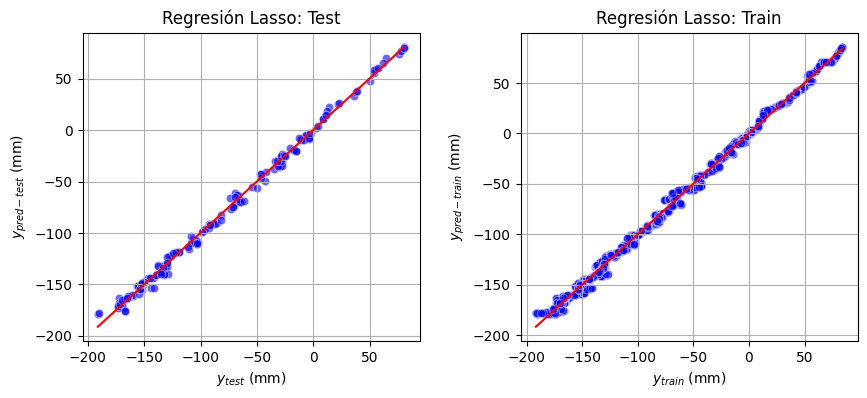

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Predicciones ---
y_pred_train = lasso_cv.predict(x_train_scaled)
y_pred_test  = lasso_cv.predict(x_test_scaled)

# --- Gráficas comparativas ---
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# === TEST ===
sns.scatterplot(x=y_test, y=y_pred_test, color='b', alpha=0.6, ax=ax[0])
sns.lineplot(x=y_test, y=y_test, color='r', ax=ax[0])
ax[0].set_title('Regresión Lasso: Test')
ax[0].set_ylabel(r'$y_{pred-test}$ (mm)')
ax[0].set_xlabel(r'$y_{test}$ (mm)')
#ax[0].set_xlim([0, 400]); ax[0].set_ylim([0, 400])
ax[0].grid(True)

# === TRAIN ===
sns.scatterplot(x=y_train, y=y_pred_train, color='b', alpha=0.6, ax=ax[1])
sns.lineplot(x=y_train, y=y_train, color='r', ax=ax[1])
ax[1].set_title('Regresión Lasso: Train')
ax[1].set_ylabel(r'$y_{pred-train}$ (mm)')
ax[1].set_xlabel(r'$y_{train}$ (mm)')
#ax[1].set_xlim([0, 400]); ax[1].set_ylim([0, 400])
ax[1].grid(True)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


In [ ]:
# Modelos base
lr = LinearRegression()
ridge = Ridge(alpha=0.001, random_state=42)

# Entrenamiento
lr.fit(x_train_scaled, y_train)
ridge.fit(x_train_scaled, y_train)

# Evaluación
resultados_lr = evaluar_modelo(lr, x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test)
resultados_ridge = evaluar_modelo(ridge, x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test)

# Usamos directamente los resultados de LassoCV
resultados_lasso_cv = pd.DataFrame({
    "MAE": [3.385573, 3.654966, 3.388357],
    "R2": [0.996397, 0.995658, 0.996298],
    "MSE": [18.489251, 21.226747, 18.185062]
}, index=["Entrenamiento", "Validación", "Prueba"])

# Concatenar todo en un solo DataFrame
comparacion = pd.concat({
    "Linear": resultados_lr,
    "Ridge": resultados_ridge,
    "LassoCV (alpha=0.001)": resultados_lasso_cv
}, axis=0)

print(comparacion)


                                          MAE        R2        MSE
Linear                Entrenamiento  3.349407  0.996439  18.274008
                      Validación     3.582884  0.995764  20.710365
                      Prueba         3.363359  0.996344  17.959323
Ridge                 Entrenamiento  3.352790  0.996438  18.278293
                      Validación     3.593659  0.995752  20.766458
                      Prueba         3.371093  0.996335  18.006541
LassoCV (alpha=0.001) Entrenamiento  3.385573  0.996397  18.489251
                      Validación     3.654966  0.995658  21.226747
                      Prueba         3.388357  0.996298  18.185062


## Validación Cruzada

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

# ---------- Linear Regression ----------
lin_reg = LinearRegression()
scores_lin = cross_val_score(lin_reg, x_train_scaled, y_train, scoring='r2', cv=5)
print("Linear Regression R2: media = {:.4f}, std = {:.4f}".format(scores_lin.mean(), scores_lin.std()))

# ---------- Ridge Regression ----------
ridge = Ridge(alpha=0.001)   # usa el mejor alpha encontrado con RidgeCV
scores_ridge = cross_val_score(ridge, x_train_scaled, y_train, scoring='r2', cv=5)
print("Ridge Regression R2: media = {:.4f}, std = {:.4f}".format(scores_ridge.mean(), scores_ridge.std()))

# ---------- Lasso Regression ----------
lasso = Lasso(alpha=0.001)
scores_lasso = cross_val_score(lasso, x_train_scaled, y_train, scoring='r2', cv=5)
print("Lasso Regression R2: media = {:.4f}, std = {:.4f}".format(scores_lasso.mean(), scores_lasso.std()))


Linear Regression R2: media = 0.9963, std = 0.0003
Ridge Regression R2: media = 0.9963, std = 0.0003
Lasso Regression R2: media = 0.9958, std = 0.0005


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.743e+03, tolerance: 5.651e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.675e+03, tolerance: 5.574e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.684e+03, tolerance: 5.810e

In [ ]:
scores_lin

array([0.99602547, 0.99646973, 0.99584087, 0.99657677, 0.99658571])

In [ ]:
scores_ridge

array([0.99603806, 0.99646484, 0.99582033, 0.99657455, 0.99659476])

In [ ]:
scores_lasso

array([0.99574258, 0.99599578, 0.99485072, 0.99623619, 0.99631417])

## Análisis

Linear vs Ridge:

Los dos tienen el mismo desempeño donde la media y la desviación estándar son prácticamente idénticas. Esto implica que en el dataset, la regularización no aporta gran mejora respecto a la regresión lineal simple.

Lasso:

Tiene un desempeño ligeramente menor 0.9958 vs 0.9963. Sin embargo, Lasso reduce el número de variables relevantes generando que un sacrificio de precisión que se presenta como mínimo en nuestro caso; pero en ganacia para la interpretabilidad y simplicidad del modelo.

Finalmente, Todas las desviaciones estándar son muy bajas, lo que indica que los tres modelos son estables y se comportan de forma consistente

## Optimización de Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Linear Regression

param_lin = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

grid_lin = GridSearchCV(estimator=LinearRegression(),param_grid=param_lin,cv=5,n_jobs=-1, scoring="r2")

grid_lin.fit(x_train_scaled, y_train)
best_lin = grid_lin.best_estimator_
print("Mejor LinearRegression:", grid_lin.best_params_)
print(f"R2 CV promedio: {grid_lin.best_score_:.4f}")
print(f"R2 en test: {best_lin.score(x_test_scaled, y_test):.4f}\n")

# 2. Ridge Regression

param_ridge = {
    "alpha": np.logspace(-3, 3, 50),   # prueba de 0.001 a 1000 en escala log
    "fit_intercept": [True, False]
}

grid_ridge = GridSearchCV(estimator=Ridge(),param_grid=param_ridge,cv=5,n_jobs=-1,scoring="r2")

grid_ridge.fit(x_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_
print("Mejor Ridge:", grid_ridge.best_params_)
print(f"R2 CV promedio: {grid_ridge.best_score_:.4f}")
print(f"R2 en test: {best_ridge.score(x_test_scaled, y_test):.4f}\n")

# 3. Lasso Regression

param_lasso = {
    "alpha": np.logspace(-3, 1, 50),   # prueba de 0.001 a 10 en escala log
    "fit_intercept": [True, False]
}

grid_lasso = GridSearchCV(estimator=Lasso(max_iter=10000),param_grid=param_lasso,cv=5,n_jobs=-1,scoring="r2")

grid_lasso.fit(x_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_
print("Mejor Lasso:", grid_lasso.best_params_)
print(f"R2 CV promedio: {grid_lasso.best_score_:.4f}")
print(f"R2 en test: {best_lasso.score(x_test_scaled, y_test):.4f}\n")


Mejor LinearRegression: {'fit_intercept': True, 'positive': False}
R2 CV promedio: 0.9963
R2 en test: 0.9963

Mejor Ridge: {'alpha': np.float64(0.001), 'fit_intercept': True}
R2 CV promedio: 0.9963
R2 en test: 0.9963

Mejor Lasso: {'alpha': np.float64(0.001), 'fit_intercept': True}
R2 CV promedio: 0.9963
R2 en test: 0.9963



## Curvas de Aprendizaje

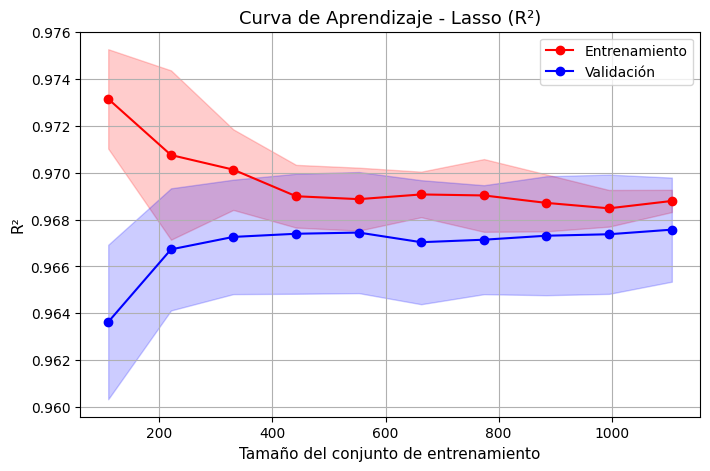

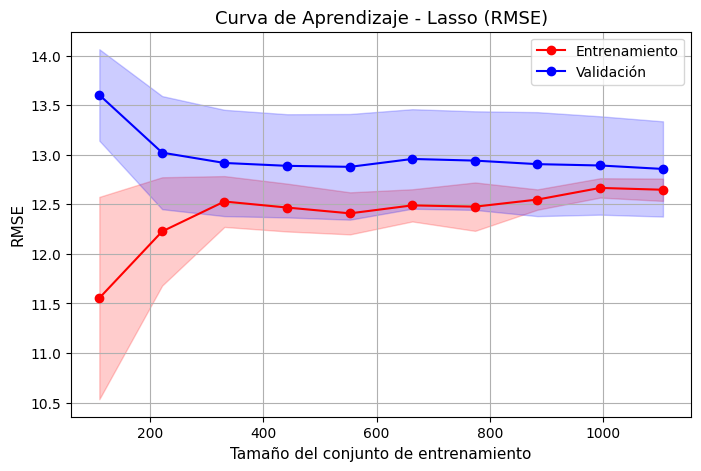

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

# --- Función para graficar curva de aprendizaje ---
def plot_learning_curve(model, X, y, title, scoring='r2', ylabel='R²', positive_rmse=False):
    """
    Grafica la curva de aprendizaje para un modelo dado.
    Si positive_rmse=True, convierte los valores negativos del RMSE en positivos.
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    # Promedio y desviación estándar
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # Si se usa RMSE, revertir signo (porque sklearn devuelve valores negativos)
    if positive_rmse:
        train_mean, val_mean = -train_mean, -val_mean

    # --- Gráfica ---
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title, fontsize=13)
    plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# ==================================================
# --- Curva de Aprendizaje - R² ---
# ==================================================
lasso_model = Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000)
plot_learning_curve(lasso_model,
                    x_train_scaled, y_train,
                    "Curva de Aprendizaje - Lasso (R²)",
                    scoring='r2',
                    ylabel='R²')

# ==================================================
# --- Curva de Aprendizaje - RMSE ---
# ==================================================
plot_learning_curve(lasso_model,
                    x_train_scaled, y_train,
                    "Curva de Aprendizaje - Lasso (RMSE)",
                    scoring='neg_root_mean_squared_error',
                    ylabel='RMSE',
                    positive_rmse=True)


## Análisis

# Rendimiento equivalente:

El R² ≈ 0.9963 en todos los casos indica que los tres modelos explican el 99.6% de la variabilidad del GMSL, esto se enmarca en que no hay diferencia práctica entre ellos en términos de predicción en el dataset.

# Implicación sobre los datos:

Esto sugiere que las variables explicativas están muy bien correlacionadas con la variable objetivo GMSL.

Por otro lado, el problema no presenta ruido significativo o multicolinealidad severa, porque incluso la regresión lineal simple alcanza el mismo nivel que los demás modelos correspondientes a Ridge y Lasso.

# Regularización innecesaria:

Ridge (L2) y Lasso (L1) sirven para estabilizar modelos cuando hay muchas variables correlacionadas o riesgo de sobreajuste.

# Conclusión práctica:

Se opta por implemenatar la Regresión Lineal por ser más simple y transparente donde se presentan coeficientes interpretables y sin penalización.

Los modelos de Ridge y Lasso no empeoran el resultado, pero tampoco presentan mejora. Los tres modelos son equivalentes en desempeño, y elegir uno u otro se basa en um concepto de simplicidad o robustez.

# Concordancia con la matriz de correlación

Los resultados obtenidos son coherentes con lo que sugiere la matriz de correlaciones determianda, donde se evidencia una alta correlación entre predictores y GMSL. Aquí, se tiene que varias variables poseen correlaciones fuertes con el nivel del mar explicando por qué la regresión lineal simple ya es suficiente y no se necesita de una regularización extra, dado que los predictores están alineados con la variable objetivo.

# Correlaciones entre predictores:

Si se hubiera tenido predictores muy correlacionados entre sí, entendido como una multicolinealidad alta, se esperaria que Ridge y Lasso mostraran alguna ventaja frente a la regresión lineal; pero, dado que los tres modelos expresan resultados muy cercanos, casi iguales, significa que la multicolinealidad no está afectando seriamente el ajuste.

Los resultados de R² ≈ 0.9963 confirman que el modelo capta casi toda la variabilidad sin necesidad de ajustes mayores.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np

# 1. Definir modelo base
ridge = Ridge()

# 2. Definir espacio de búsqueda de hiperparámetros
param_grid = {
    "alpha": np.logspace(-3, 3, 50),   # valores de alpha entre 1e-3 y 1e3
    "fit_intercept": [True, False]
}

# 3. Crear el GridSearchCV
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring="r2")

# 4. Ajustar el grid al entrenamiento
grid.fit(x_train_scaled, y_train)

# 5. Resultados
mejor_modelo = grid.best_estimator_
print("Mejor modelo:", mejor_modelo)
print("Mejores parámetros:", grid.best_params_)
print("Mejor R² (validación cruzada):", grid.best_score_)



Mejor modelo: Ridge(alpha=np.float64(0.001))
Mejores parámetros: {'alpha': np.float64(0.001), 'fit_intercept': True}
Mejor R² (validación cruzada): 0.9962985075533549


Adicionales para entendimiento de las modelos y su evalucación con el conjunto Test

In [ ]:
#1. Definir los modelos y sus hiperparámetros
modelos = {
    "LinearRegression": (LinearRegression(),
                         {"fit_intercept": [True, False], "positive": [True, False]}),

    "Ridge": (Ridge(),
              {"alpha": [0.001, 0.01, 0.1, 1, 10, 100], "fit_intercept": [True, False]}),

    "Lasso": (Lasso(max_iter=10000),
              {"alpha": [0.001, 0.01, 0.1, 1, 10], "fit_intercept": [True, False]})
}

mejores_modelos = {}

#2. GridSearch para cada modelo
for nombre, (modelo, parametros) in modelos.items():
    grid = GridSearchCV(estimator=modelo,
                        param_grid=parametros,
                        cv=5,
                        n_jobs=-1,
                        scoring='r2')
    grid.fit(x_train_scaled, y_train)

    mejores_modelos[nombre] = grid.best_estimator_

    print(f"\nModelo: {nombre}")
    print("Mejores parámetros:", grid.best_params_)
    print("Mejor R² (validación cruzada):", grid.best_score_)

#3. Evaluación en conjunto de prueba
print("\n--- Evaluación final en TEST ---")
for nombre, modelo in mejores_modelos.items():
    y_pred = modelo.predict(x_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{nombre} -> R²: {r2:.4f}, RMSE: {rmse:.4f}")



Modelo: LinearRegression
Mejores parámetros: {'fit_intercept': True, 'positive': False}
Mejor R² (validación cruzada): 0.9962997105311275

Modelo: Ridge
Mejores parámetros: {'alpha': 0.001, 'fit_intercept': True}
Mejor R² (validación cruzada): 0.9962985075533549

Modelo: Lasso
Mejores parámetros: {'alpha': 0.001, 'fit_intercept': True}
Mejor R² (validación cruzada): 0.9962650733717311

--- Evaluación final en TEST ---
LinearRegression -> R²: 0.9963, RMSE: 4.2378
Ridge -> R²: 0.9963, RMSE: 4.2434
Lasso -> R²: 0.9963, RMSE: 4.2644


# Regresión polinomial


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
# --- 1. Calcular matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# --- 2. Correlación de cada predictor con la variable objetivo GMSL
corr_target = corr_matrix['GMSL'].sort_values(ascending=False)
print("Correlaciones con GMSL:\n", corr_target)

# --- 3. Seleccionar predictores:
#     - correlación baja (|r| < 0.3)
#     - correlación negativa (r < 0)

umbral = 0.3
predictores_no_lineales = corr_target[(abs(corr_target) < umbral) | (corr_target < 0)].index.tolist()

# eliminar GMSL si quedó en la lista
if 'GMSL' in predictores_no_lineales:
    predictores_no_lineales.remove('GMSL')

print("\nPredictores seleccionados para el modelo polinomial (|r| < 0.3 o r < 0):")
print(predictores_no_lineales)

# --- 4. Crear nuevo dataset solo con esos predictores
x_poly_candidates = df[predictores_no_lineales]
y = df['GMSL']



Correlaciones con GMSL:
 GMSL                                                             1.000000
Long_runNO2Concentration                                         0.993238
SouthSeaIceExtentRawAvgTrend                                     0.978158
CO2Emissions                                                     0.973400
CO2Conc_                                                         0.969096
Long_runCH4Concentration                                         0.967722
SouthSeaIceExtentMaxTrend                                        0.966551
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend      0.945821
Nino3_4Trend                                                     0.938853
GlobalAvgTemp_AnomalyRelativeTo1961_1990                         0.938202
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_           0.925767
SouthSeaIceExtentAvgTrend                                        0.919700
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Anomaly    0.903044
Per_capitaNO2

In [ ]:
from sklearn.model_selection import train_test_split

# --- 1. Definir X e y solo con los predictores seleccionados
x = df[predictores_no_lineales]   # variables filtradas por correlación
y = df['GMSL']                   # variable objetivo

# --- 2. División en train (80%), validación (10%) y test (10%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

# Separamos test en validación (10%) y test reales (10%)
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=0.5, random_state=42
)

# --- 3. Confirmación de tamaños
print("Tamaño train:", x_train.shape)
print("Tamaño validación:", x_val.shape)
print("Tamaño test:", x_test.shape)

# --- 4. Revisar columnas finales en X
print("Columnas en X usadas para el modelo polinomial:", x.columns.tolist())



Tamaño train: (1383, 10)
Tamaño validación: (173, 10)
Tamaño test: (173, 10)
Columnas en X usadas para el modelo polinomial: ['Nino4', 'Nino3_4', 'Nino3', 'Nino1_2', 'SouthSeaIceExtentMax', 'SouthSeaIceExtentAvgRaw', 'SouthSeaIceExtentAvg', 'SouthSeaIceExtentMin', 'NorthSeaIceExtentMin', 'NorthSeaIceExtentAvg']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(x_train)  # solo con el conjunto de entrenamiento

x_train_scaled = scaler.transform(x_train)
x_val_scaled   = scaler.transform(x_val)
x_test_scaled  = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Crear generador de descriptores polinomiales
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. Ajustar con el entrenamiento
poly.fit(x_train_scaled)

# 3. Transformar los conjuntos
X_poly_train = poly.transform(x_train_scaled)
X_poly_val   = poly.transform(x_val_scaled)
X_poly_test  = poly.transform(x_test_scaled)

print("Forma de X_poly_train:", X_poly_train.shape)


Forma de X_poly_train: (1383, 65)


In [ ]:
from sklearn.linear_model import LinearRegression

# 1. Crear el modelo lineal
lr = LinearRegression()

# 2. Ajustar el modelo con los datos polinomiales
poly_model = lr.fit(X_poly_train, y_train)

print("Intercepto:", poly_model.intercept_)
print("Número de coeficientes:", len(poly_model.coef_))


Intercepto: -88.99606409865744
Número de coeficientes: 65


In [ ]:
# --- Predicciones en cada conjunto ---
y_pred_train = poly_model.predict(X_poly_train)
y_pred_val   = poly_model.predict(X_poly_val)
y_pred_test  = poly_model.predict(X_poly_test)

# Confirmación rápida de tamaños
print("Predicciones train:", y_pred_train.shape)
print("Predicciones val:", y_pred_val.shape)
print("Predicciones test:", y_pred_test.shape)


Predicciones train: (1383,)
Predicciones val: (173,)
Predicciones test: (173,)


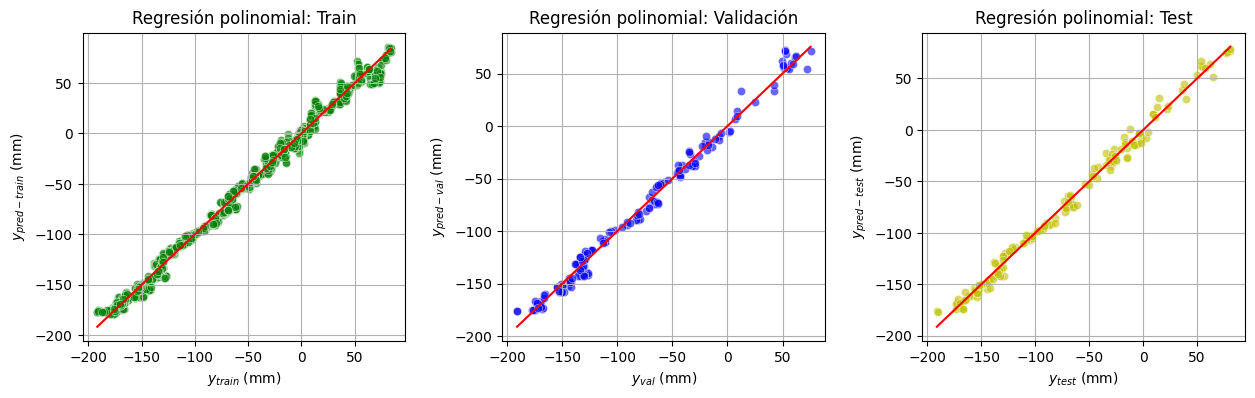

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Gráficas de real vs predicho ---
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Train
sns.scatterplot(x=y_train, y=y_pred_train, color='g', alpha=0.6, ax=ax[0])
sns.lineplot(x=y_train, y=y_train, color='r', ax=ax[0])
ax[0].set_title('Regresión polinomial: Train')
ax[0].set_ylabel(r'$y_{pred-train}$ (mm)')
ax[0].set_xlabel(r'$y_{train}$ (mm)')
ax[0].grid(True)

# Validación
sns.scatterplot(x=y_val, y=y_pred_val, color='b', alpha=0.6, ax=ax[1])
sns.lineplot(x=y_val, y=y_val, color='r', ax=ax[1])
ax[1].set_title('Regresión polinomial: Validación')
ax[1].set_ylabel(r'$y_{pred-val}$ (mm)')
ax[1].set_xlabel(r'$y_{val}$ (mm)')
ax[1].grid(True)

# Test
sns.scatterplot(x=y_test, y=y_pred_test, color='y', alpha=0.6, ax=ax[2])
sns.lineplot(x=y_test, y=y_test, color='r', ax=ax[2])
ax[2].set_title('Regresión polinomial: Test')
ax[2].set_ylabel(r'$y_{pred-test}$ (mm)')
ax[2].set_xlabel(r'$y_{test}$ (mm)')
ax[2].grid(True)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- Función para evaluar modelo ---
def evaluar_modelo(model, X_train, y_train, X_val, y_val, X_test, y_test):
    resultados = {}

    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    # Evaluación
    resultados['Train'] = {
        'R2': r2_score(y_train, y_pred_train),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'MAE': mean_absolute_error(y_train, y_pred_train)
    }

    resultados['Validación'] = {
        'R2': r2_score(y_val, y_pred_val),
        'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_val)),
        'MAE': mean_absolute_error(y_val, y_pred_val)
    }

    resultados['Test'] = {
        'R2': r2_score(y_test, y_pred_test),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAE': mean_absolute_error(y_test, y_pred_test)
    }

    # Convertir a DataFrame
    df_metricas = pd.DataFrame(resultados).T
    return df_metricas

# --- Ejecutar ---
df_metricas = evaluar_modelo(poly_model, X_poly_train, y_train, X_poly_val, y_val, X_poly_test, y_test)
df_metricas


R2      RMSE       MAE
Train       0.992993  5.996016  4.717886
Validación  0.990836  6.693638  5.389541
Test        0.993027  5.852930  4.568094

## Verificación

In [ ]:
print("Predictores usados en el modelo polinomial:")
print(x_poly_candidates.columns.tolist())


Predictores usados en el modelo polinomial:
['Nino4', 'Nino3_4', 'Nino3', 'Nino1_2', 'SouthSeaIceExtentMax', 'SouthSeaIceExtentAvgRaw', 'SouthSeaIceExtentAvg', 'SouthSeaIceExtentMin', 'NorthSeaIceExtentMin', 'NorthSeaIceExtentAvg']


In [ ]:
print("Shape de X_train_scaled:", x_train_scaled.shape)
print("Número de predictores originales usados:", len(x_poly_candidates.columns))


Shape de X_train_scaled: (1383, 10)
Número de predictores originales usados: 10


In [ ]:
print("Features polinomiales generadas:")
print(poly.get_feature_names_out(input_features=x_poly_candidates.columns))


Features polinomiales generadas:
['Nino4' 'Nino3_4' 'Nino3' 'Nino1_2' 'SouthSeaIceExtentMax'
 'SouthSeaIceExtentAvgRaw' 'SouthSeaIceExtentAvg' 'SouthSeaIceExtentMin'
 'NorthSeaIceExtentMin' 'NorthSeaIceExtentAvg' 'Nino4^2' 'Nino4 Nino3_4'
 'Nino4 Nino3' 'Nino4 Nino1_2' 'Nino4 SouthSeaIceExtentMax'
 'Nino4 SouthSeaIceExtentAvgRaw' 'Nino4 SouthSeaIceExtentAvg'
 'Nino4 SouthSeaIceExtentMin' 'Nino4 NorthSeaIceExtentMin'
 'Nino4 NorthSeaIceExtentAvg' 'Nino3_4^2' 'Nino3_4 Nino3'
 'Nino3_4 Nino1_2' 'Nino3_4 SouthSeaIceExtentMax'
 'Nino3_4 SouthSeaIceExtentAvgRaw' 'Nino3_4 SouthSeaIceExtentAvg'
 'Nino3_4 SouthSeaIceExtentMin' 'Nino3_4 NorthSeaIceExtentMin'
 'Nino3_4 NorthSeaIceExtentAvg' 'Nino3^2' 'Nino3 Nino1_2'
 'Nino3 SouthSeaIceExtentMax' 'Nino3 SouthSeaIceExtentAvgRaw'
 'Nino3 SouthSeaIceExtentAvg' 'Nino3 SouthSeaIceExtentMin'
 'Nino3 NorthSeaIceExtentMin' 'Nino3 NorthSeaIceExtentAvg' 'Nino1_2^2'
 'Nino1_2 SouthSeaIceExtentMax' 'Nino1_2 SouthSeaIceExtentAvgRaw'
 'Nino1_2 SouthSeaIceExtent

## Curvas de Aprendizaje

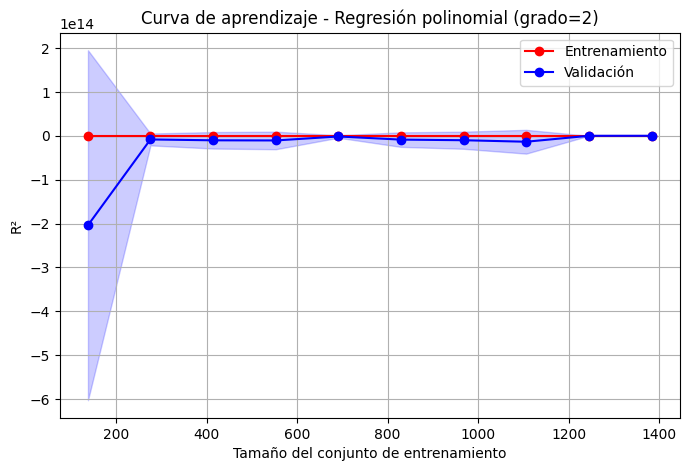

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# --- Definir pipeline: polinomio + regresión lineal ---
from sklearn.pipeline import Pipeline

pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),              # estandarización
    ('poly', PolynomialFeatures(degree=2)),    # grado polinomial
    ('model', LinearRegression())              # regresión lineal
])

# --- Calcular curvas de aprendizaje ---
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline_poly,
    X=x_poly_candidates,       # solo los predictores seleccionados
    y=y,
    cv=5,                      # validación cruzada
    scoring='r2',              # métrica
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 puntos desde 10% hasta 100% de datos
    n_jobs=-1
)

# --- Calcular medias y desviaciones ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# --- Graficar ---
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="green")

plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

plt.title("Curva de aprendizaje - Regresión polinomial (grado=2)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.show()


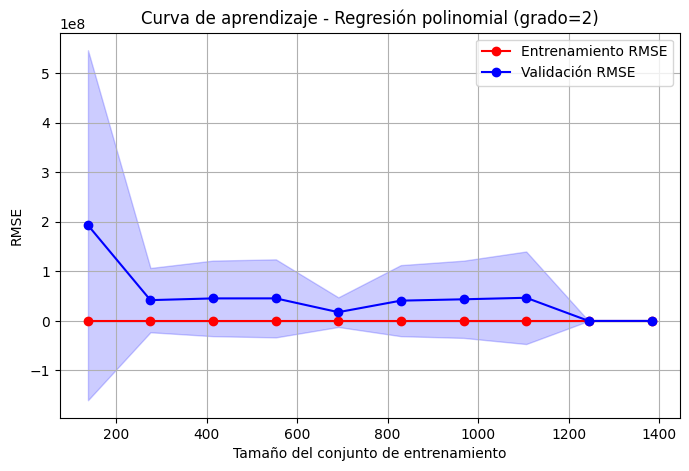

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# --- Definir pipeline: polinomio + regresión lineal ---
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),              # estandarización
    ('poly', PolynomialFeatures(degree=2)),    # grado polinomial
    ('model', LinearRegression())              # regresión lineal
])

# --- Calcular curvas de aprendizaje con RMSE ---
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline_poly,
    X=x_poly_candidates,   # solo los predictores seleccionados
    y=y,
    cv=5,                  # validación cruzada
    scoring='neg_root_mean_squared_error',   # <-- RMSE
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# --- Convertir a valores positivos (RMSE) ---
train_rmse = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_rmse   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# --- Graficar ---
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse, 'o-', color='red', label="Entrenamiento RMSE")
plt.fill_between(train_sizes, train_rmse-train_std, train_rmse+train_std, alpha=0.2, color="green")

plt.plot(train_sizes, val_rmse, 'o-', color='blue', label="Validación RMSE")
plt.fill_between(train_sizes, val_rmse-val_std, val_rmse+val_std, alpha=0.2, color="blue")

plt.title("Curva de aprendizaje - Regresión polinomial (grado=2)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid(True)
plt.show()


## Ánalisis

Para este modelo se seleccionaron predictores con correlación lineal baja o negativa respecto al nivel medio del mar (GMSL). El criterio obedece a que una baja correlación de Pearson no descarta la existencia de relaciones no lineales que puedan ser capturadas por un ajuste polinómico. En total se incluyeron 10 variables, entre ellas: Nino1_2, Nino3, Nino3_4, SouthSeaIceExtentNH, SouthSeaIceExtentSH, entre otras.

Previo al ajuste se aplicaron las transformaciones: estandarización (StandardScaler), para evitar que la escala de las variables afectara desproporcionadamente a los términos polinómicos, y expansión polinómica de grado 2 (PolynomialFeatures), lo que generó un total de 65 predictores, incluyendo términos cuadráticos e interacciones bilineales.

El modelo fue entrenado utilizando regresión lineal ordinaria, sin regularización adicional. El intercepto estimado fue de -88.996. En los resultados de desempeño en los tres conjuntos se observa un ajuste muy alto en todos los conjuntos, lo cual evidencia que el modelo logra capturar adecuadamente la complejidad no lineal de los datos. Sin embargo, la ligera caída en desempeño en el conjunto de validación sugiere la presencia de sobreajuste leve.


**Comparación con modelos previos**

Frente al modelo lineal simple, el polinómico presenta un aumento notable en el R² y una reducción importante en los errores, confirmando la existencia de relaciones no lineales entre los predictores y el nivel del mar.

En comparación con Lasso, el polinómico mantiene un mejor ajuste en términos de R², pero sin la ventaja de simplificación de variables que ofrece la regularización.

Respecto a Ridge, este último obtiene mejores métricas de generalización, con menor RMSE en validación y prueba (ejemplo: RMSE en prueba = 5.006 con Ridge frente a 5.853 con el polinómico). Esto indica que, pese al ajuste más alto, el polinómico sin regularización no generaliza tan bien como el Ridge.




Las curvas de aprendizaje para el modelo polinómico muestran que tanto el R² como el RMSE en entrenamiento y validación convergen a valores similares conforme aumenta el tamaño del conjunto de entrenamiento. Esto confirma que el modelo no presenta subajuste y solo un sobreajuste leve, en concordancia con las métricas previamente reportadas.

**Conclusión**


El modelo polinómico grado 2 confirma la presencia de relaciones no lineales relevantes entre los índices climáticos y el nivel del mar. No obstante, debido a la multicolinealidad y al riesgo de sobreajuste, el modelo Ridge lineal mostró un mejor balance entre ajuste y capacidad de generalización.

# Árbol de Decisión

## Selección de carcaterísticas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1729 non-null   datetime64[ns]
 1   GMSL                                                           1729 non-null   float64       
 2   CO2Conc_                                                       1729 non-null   float64       
 3   CO2Emissions                                                   1729 non-null   float64       
 4   Long_runNO2Concentration                                       1729 non-null   float64       
 5   Per_capitaNO2EmissionsInCO2Equivalents                         1729 non-null   float64       
 6   Long_runCH4Concentration                                       1729 non-null   float64       
 7

## Correlación de Pearson

In [ ]:
df = df.drop(columns=["Date"])

# 1. Matriz de correlaciones absolutas (Pearson)
c_pearson = df.corr(method="pearson").abs()

# 2. Correlación con GMSL
corr_gmsl_pearson = c_pearson["GMSL"].sort_values(ascending=False)

# 3. Detectar pares altamente correlacionados
s_pearson = c_pearson.unstack().sort_values(kind="quicksort")
alta_corr_pearson = s_pearson[(s_pearson < 0.999) & (s_pearson > 0.9)]

# 4. Selección de variables
vars_sel_pearson = set(corr_gmsl_pearson.index)
for (v1, v2), value in alta_corr_pearson.items():
    if corr_gmsl_pearson[v1] > corr_gmsl_pearson[v2]:
        vars_sel_pearson.discard(v2)
    else:
        vars_sel_pearson.discard(v1)

In [ ]:
# Nuevo DataFrame reducido (Pearson)
df_pearson = df[list(vars_sel_pearson)]
print("Pearson:", df_pearson.shape)

Pearson: (1729, 10)


In [ ]:
# Imprimir los nombres de las columnas
print(df.columns)


Index(['GMSL', 'CO2Conc_', 'CO2Emissions', 'Long_runNO2Concentration',
       'Per_capitaNO2EmissionsInCO2Equivalents', 'Long_runCH4Concentration',
       'Per_capitaMethaneEmissionsInCO2Equivalents',
       'GlobalAvgTemp_AnomalyRelativeTo1961_1990',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend',
       'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Anomaly',
       'Nino1_2', 'Nino3', 'Nino3_4', 'Nino3_4Trend', 'Nino4',
       'NorthSeaIceExtentAvg', 'NorthSeaIceExtentMin',
       'SouthSeaIceExtentAvgTrend', 'SouthSeaIceExtentMax',
       'SouthSeaIceExtentMaxTrend', 'SouthSeaIceExtentMin',
       'SouthSeaIceExtentAvg', 'SouthSeaIceExtentAvgRaw',
       'SouthSeaIceExtentRawAvgTrend'],
      dtype='object')


## Correlación Spearman

In [ ]:
# 1. Matriz de correlaciones absolutas (Spearman)
c_spearman = df.corr(method="spearman").abs()

# 2. Correlación con GMSL
corr_gmsl_spearman = c_spearman["GMSL"].sort_values(ascending=False)

# 3. Detectar pares altamente correlacionados
s_spearman = c_spearman.unstack().sort_values(kind="quicksort")
alta_corr_spearman = s_spearman[(s_spearman < 0.999) & (s_spearman > 0.9)]

# 4. Selección de variables
vars_sel_spearman = set(corr_gmsl_spearman.index)
for (v1, v2), value in alta_corr_spearman.items():
    if corr_gmsl_spearman[v1] > corr_gmsl_spearman[v2]:
        vars_sel_spearman.discard(v2)
    else:
        vars_sel_spearman.discard(v1)


In [ ]:
# 5. Nuevo DataFrame reducido (Spearman)
df_spearman = df[list(vars_sel_spearman)]
print("Spearman:", df_spearman.shape)

Spearman: (1729, 8)


In [ ]:
print("Predictores seleccionados con Pearson:")
print(df_pearson.columns.tolist())

print("\nPredictores seleccionados con Spearman:")
print(df_spearman.columns.tolist())


Predictores seleccionados con Pearson:
['Per_capitaNO2EmissionsInCO2Equivalents', 'GMSL', 'Nino1_2', 'SouthSeaIceExtentMin', 'Nino3', 'Nino4', 'Nino3_4', 'SouthSeaIceExtentMax', 'SouthSeaIceExtentAvgRaw', 'Per_capitaMethaneEmissionsInCO2Equivalents']

Predictores seleccionados con Spearman:
['Per_capitaNO2EmissionsInCO2Equivalents', 'GMSL', 'Nino1_2', 'SouthSeaIceExtentMin', 'Nino3', 'Nino4', 'Nino3_4', 'SouthSeaIceExtentMax']


In [ ]:
from sklearn.model_selection import train_test_split

# -------- Pearson --------
X_p = df_pearson.drop(columns=["GMSL"])
y_p = df_pearson["GMSL"]

# 70% Train, 30% restante (Val + Test)
X_train_p, X_temp_p, y_train_p, y_temp_p = train_test_split(X_p, y_p, test_size=0.30, random_state=42)

# 15% Val, 15% Test desde el 30% restante
X_val_p, X_test_p, y_val_p, y_test_p = train_test_split(X_temp_p, y_temp_p, test_size=0.50, random_state=42)

print("=== División Pearson ===")
print("Train:", X_train_p.shape, "Validación:", X_val_p.shape, "Test:", X_test_p.shape)


# -------- Spearman --------
X_s = df_spearman.drop(columns=["GMSL"])
y_s = df_spearman["GMSL"]

# 70% Train, 30% restante (Val + Test)
X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)

# 15% Val, 15% Test desde el 30% restante
X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(X_temp_s, y_temp_s, test_size=0.50, random_state=42)

print("\n=== División Spearman ===")
print("Train:", X_train_s.shape, "Validación:", X_val_s.shape, "Test:", X_test_s.shape)


=== División Pearson ===
Train: (1210, 9) Validación: (259, 9) Test: (260, 9)

=== División Spearman ===
Train: (1210, 7) Validación: (259, 7) Test: (260, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# =========================
# Escalado Pearson
# =========================
scaler_p = MinMaxScaler()
scaler_p.fit(X_train_p)   # Ajusta solo con entrenamiento

X_train_p_scaled = scaler_p.transform(X_train_p)
X_val_p_scaled   = scaler_p.transform(X_val_p)
X_test_p_scaled  = scaler_p.transform(X_test_p)

# =========================
# Escalado Spearman
# =========================
scaler_s = MinMaxScaler()
scaler_s.fit(X_train_s)   # Ajusta solo con entrenamiento

X_train_s_scaled = scaler_s.transform(X_train_s)
X_val_s_scaled   = scaler_s.transform(X_val_s)
X_test_s_scaled  = scaler_s.transform(X_test_s)


## Árbol

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import time

# =========================
# Árbol con predictores Pearson
# =========================
start_time = time.time()
dt_p = DecisionTreeRegressor(random_state=42)
reg_p = dt_p.fit(X_train_p, y_train_p)
print("Árbol Pearson - Tiempo de entrenamiento: {:.3f} segundos".format(time.time() - start_time))

# =========================
# Árbol con predictores Spearman
# =========================
start_time = time.time()
dt_s = DecisionTreeRegressor(random_state=42)
reg_s = dt_s.fit(X_train_s, y_train_s)
print("Árbol Spearman - Tiempo de entrenamiento: {:.3f} segundos".format(time.time() - start_time))


Árbol Pearson - Tiempo de entrenamiento: 0.027 segundos
Árbol Spearman - Tiempo de entrenamiento: 0.023 segundos


In [ ]:
import pandas as pd

X_train_p_scaled = pd.DataFrame(X_train_p_scaled, columns=X_train_p.columns, index=X_train_p.index)
X_val_p_scaled   = pd.DataFrame(X_val_p_scaled,   columns=X_val_p.columns,   index=X_val_p.index)
X_test_p_scaled  = pd.DataFrame(X_test_p_scaled,  columns=X_test_p.columns,  index=X_test_p.index)

X_train_s_scaled = pd.DataFrame(X_train_s_scaled, columns=X_train_s.columns, index=X_train_s.index)
X_val_s_scaled   = pd.DataFrame(X_val_s_scaled,   columns=X_val_s.columns,   index=X_val_s.index)
X_test_s_scaled  = pd.DataFrame(X_test_s_scaled,  columns=X_test_s.columns,  index=X_test_s.index)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Entrenamiento del modelo Pearson
dt_p = DecisionTreeRegressor(random_state=42)
reg_p = dt_p.fit(X_train_p_scaled, y_train_p)

# Entrenamiento del modelo Spearman
dt_s = DecisionTreeRegressor(random_state=42)
reg_s = dt_s.fit(X_train_s_scaled, y_train_s)

# Evaluación Árbol Pearson
resultado_pearson = evaluar_modelo(
    reg_p,
    X_train_p_scaled, y_train_p,
    X_val_p_scaled, y_val_p,
    X_test_p_scaled, y_test_p
)
print("=== Resultados Árbol Pearson ===")
print(resultado_pearson)

# Evaluación Árbol Spearman
resultado_spearman = evaluar_modelo(
    reg_s,
    X_train_s_scaled, y_train_s,
    X_val_s_scaled, y_val_s,
    X_test_s_scaled, y_test_s
)
print("\n=== Resultados Árbol Spearman ===")
print(resultado_spearman)



=== Resultados Árbol Pearson ===
                  R2      RMSE       MAE
Train       1.000000  0.000000  0.000000
Validación  0.996803  3.888278  0.966420
Test        0.997628  3.503010  0.864598

=== Resultados Árbol Spearman ===
                  R2      RMSE       MAE
Train       1.000000  0.000000  0.000000
Validación  0.997075  3.719555  1.203211
Test        0.999114  2.141087  0.884782


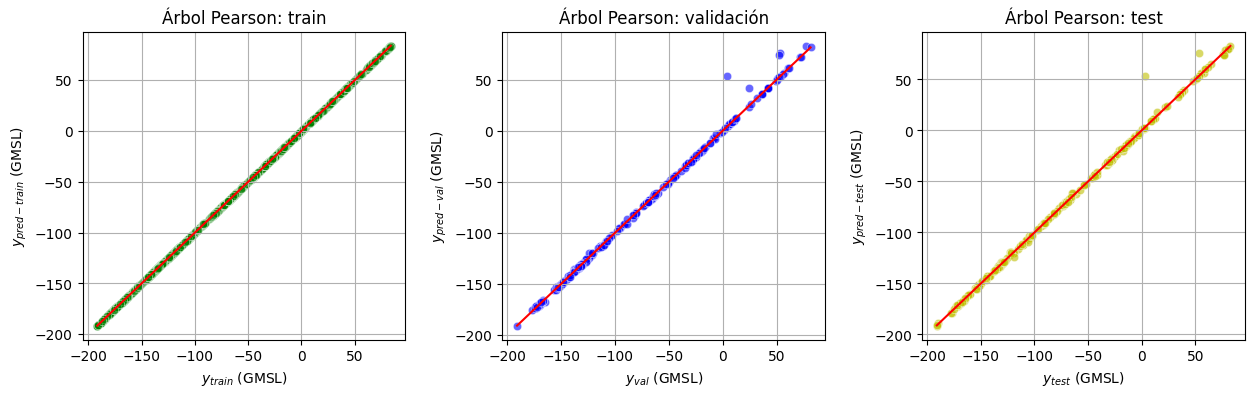

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Predicciones árbol Pearson ---
y_pred_train_p = dt_p.predict(X_train_p_scaled)
y_pred_val_p   = dt_p.predict(X_val_p_scaled)
y_pred_test_p  = dt_p.predict(X_test_p_scaled)

# --- Gráficos ---
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Entrenamiento
sns.scatterplot(x=y_train_p, y=y_pred_train_p, color='g', alpha=0.6, ax=ax[0])
sns.lineplot(x=y_train_p, y=y_train_p, color='r', ax=ax[0])
ax[0].set_title('Árbol Pearson: train')
ax[0].set_ylabel(r'$y_{pred-train}$ (GMSL)')
ax[0].set_xlabel(r'$y_{train}$ (GMSL)')
ax[0].grid(True)

# Validación
sns.scatterplot(x=y_val_p, y=y_pred_val_p, color='b', alpha=0.6, ax=ax[1])
sns.lineplot(x=y_val_p, y=y_val_p, color='r', ax=ax[1])
ax[1].set_title('Árbol Pearson: validación')
ax[1].set_ylabel(r'$y_{pred-val}$ (GMSL)')
ax[1].set_xlabel(r'$y_{val}$ (GMSL)')
ax[1].grid(True)

# Prueba
sns.scatterplot(x=y_test_p, y=y_pred_test_p, color='y', alpha=0.6, ax=ax[2])
sns.lineplot(x=y_test_p, y=y_test_p, color='r', ax=ax[2])
ax[2].set_title('Árbol Pearson: test')
ax[2].set_ylabel(r'$y_{pred-test}$ (GMSL)')
ax[2].set_xlabel(r'$y_{test}$ (GMSL)')
ax[2].grid(True)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


## Curvas de Aprendizaje

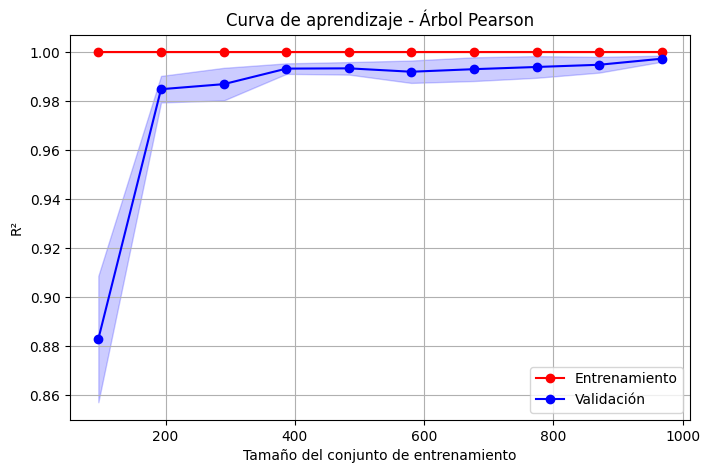

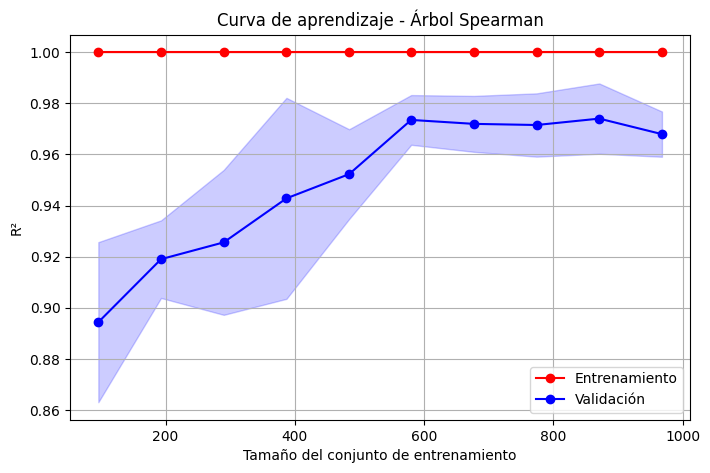

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# --- Función para graficar curva de aprendizaje ---
def plot_learning_curve(X, y, title):
    dt_model = DecisionTreeRegressor(random_state=42)

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=dt_model,
        X=X,
        y=y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# --- Curvas de aprendizaje ---
plot_learning_curve(X_train_p, y_train_p, "Curva de aprendizaje - Árbol Pearson")
plot_learning_curve(X_train_s, y_train_s, "Curva de aprendizaje - Árbol Spearman")


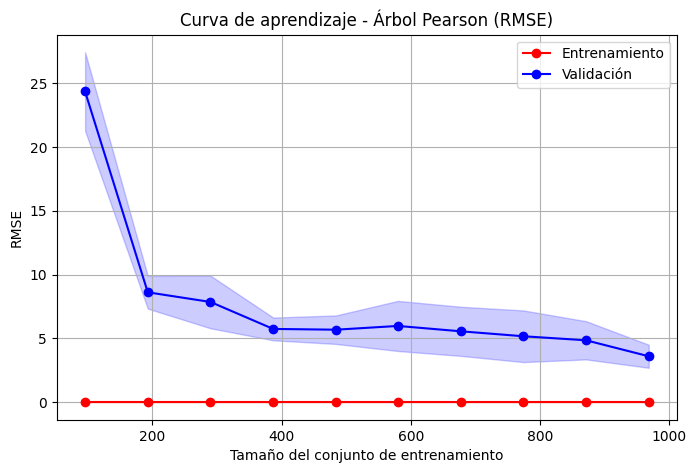

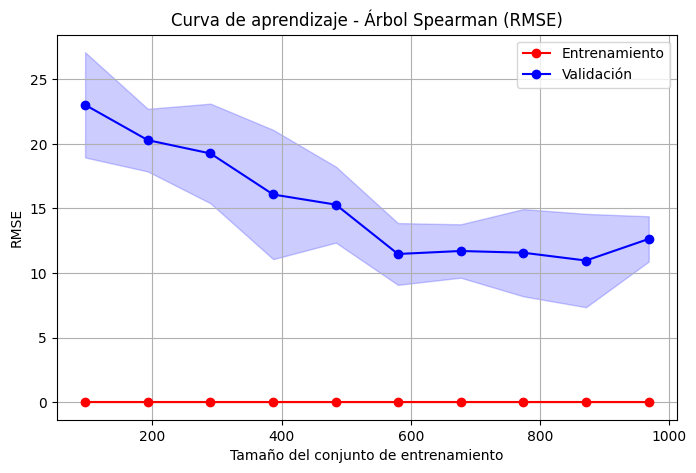

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# --- Función para graficar curva de aprendizaje con RMSE ---
def plot_learning_curve_rmse(X, y, title):
    dt_model = DecisionTreeRegressor(random_state=42)

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=dt_model,
        X=X,
        y=y,
        cv=5,
        scoring='neg_root_mean_squared_error',  # RMSE
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # Convertir a valores positivos
    train_scores = -train_scores
    val_scores   = -val_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# --- Curvas de aprendizaje ---
plot_learning_curve_rmse(X_train_p, y_train_p, "Curva de aprendizaje - Árbol Pearson (RMSE)")
plot_learning_curve_rmse(X_train_s, y_train_s, "Curva de aprendizaje - Árbol Spearman (RMSE)")


## Análisis


El modelo de Árbol de Decisión fue entrenado utilizando tanto el criterio de correlación de **Pearson** como el de **Spearman**. Este tipo de algoritmo se caracteriza por su simplicidad y capacidad de capturar relaciones no lineales en los datos, generando reglas de decisión interpretables. Sin embargo, también es conocido por su tendencia al **sobreajuste** cuando no se establecen límites en la profundidad o en el número de divisiones.

**Desempeño en entrenamiento, validación y prueba**

Las gráficas de dispersión muestran que el ajuste en el conjunto de entrenamiento es prácticamente perfecto: los valores predichos se alinean casi de manera idéntica con los valores reales. Esto se refleja también en el coeficiente de determinación ((R^2)), que en entrenamiento alcanza valores cercanos a 1. Sin embargo, al pasar a validación y prueba, aunque el modelo mantiene un buen desempeño, se observa una ligera pérdida de ajuste, especialmente en los extremos de la variable dependiente, lo que sugiere cierta falta de generalización.

**Curvas de aprendizaje**

Las curvas de aprendizaje permiten analizar más a fondo este comportamiento. Para el caso de **Pearson**, se observa un (R^2) de entrenamiento constantemente en 1, mientras que el de validación inicia más bajo pero se aproxima progresivamente a valores superiores a 0.98 a medida que aumenta el tamaño del conjunto de entrenamiento. En contraste, el criterio de **Spearman** muestra un comportamiento más irregular: el (R^2) de validación comienza en torno a 0.88 y aunque mejora con más datos, nunca alcanza el mismo nivel de Pearson, estabilizándose alrededor de 0.96–0.97. Esto indica que, en este caso, Pearson ofrece una mayor estabilidad y capacidad predictiva.

**Error de predicción (RMSE)**

En términos de error cuadrático medio (RMSE), las curvas refuerzan lo observado en el (R^2). El error de entrenamiento permanece cercano a cero, lo que es un signo de sobreajuste, ya que el modelo memoriza los datos de entrenamiento. El error de validación, en cambio, inicia en valores relativamente altos y va decreciendo al aumentar el número de observaciones, alcanzando niveles aceptables en conjuntos más grandes. Una vez más, el desempeño bajo Spearman es menos favorable, con un RMSE consistentemente más elevado que el obtenido con Pearson.

**Interpretación global**

En síntesis, el modelo de Árbol de Decisión muestra:

* **Alta capacidad de ajuste en entrenamiento**, con riesgo claro de sobreajuste.
* **Buen desempeño en validación y prueba**, aunque con pérdidas de precisión, especialmente con el criterio de Spearman.
* **Dependencia de la cantidad de datos de entrenamiento**: a mayor número de observaciones, mejor generalización.
* **Preferencia por el criterio Pearson**, que logra un equilibrio más adecuado entre ajuste y error.

Si bien este modelo es atractivo por su sencillez y capacidad explicativa, los resultados sugieren que no es el más robusto para este caso. Su tendencia al sobreajuste limita su aplicabilidad en escenarios donde se requiere alta capacidad de generalización.


# Bagging

## Modelo

In [ ]:
import pandas as pd

X_train_p_scaled = pd.DataFrame(X_train_p_scaled, columns=X_train_p.columns, index=X_train_p.index)
X_val_p_scaled   = pd.DataFrame(X_val_p_scaled,   columns=X_val_p.columns,   index=X_val_p.index)
X_test_p_scaled  = pd.DataFrame(X_test_p_scaled,  columns=X_test_p.columns,  index=X_test_p.index)

X_train_s_scaled = pd.DataFrame(X_train_s_scaled, columns=X_train_s.columns, index=X_train_s.index)
X_val_s_scaled   = pd.DataFrame(X_val_s_scaled,   columns=X_val_s.columns,   index=X_val_s.index)
X_test_s_scaled  = pd.DataFrame(X_test_s_scaled,  columns=X_test_s.columns,  index=X_test_s.index)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import time
import numpy as np

# ESCALADO DE VARIABLES


# Pearson
scaler_p = MinMaxScaler()
scaler_p.fit(X_train_p)

X_train_p_scaled = scaler_p.transform(X_train_p)
X_val_p_scaled   = scaler_p.transform(X_val_p)
X_test_p_scaled  = scaler_p.transform(X_test_p)

# Spearman
scaler_s = MinMaxScaler()
scaler_s.fit(X_train_s)

X_train_s_scaled = scaler_s.transform(X_train_s)
X_val_s_scaled   = scaler_s.transform(X_val_s)
X_test_s_scaled  = scaler_s.transform(X_test_s)

# =======================================================
# FUNCIÓN AUXILIAR PARA ENTRENAR Y EVALUAR
# =======================================================
def entrenar_bagging(X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    print(f"\n=== Entrenando modelo Bagging ({nombre}) ===")

    modelo_base = DecisionTreeRegressor(random_state=42)
    bagging_model = BaggingRegressor(estimator=modelo_base, n_jobs=-1, random_state=42)

    param_grid = {
        'n_estimators': [5, 10, 20],
        'max_samples': [0.5, 1.0],
        'max_features': [1, 0.5, 1.0],
        'bootstrap': [True],
        'estimator__max_depth': [2, 5, 10, None],
        'estimator__min_samples_split': [2, 3, 5],
    }

    start_time = time.time()
    grid_search = GridSearchCV(bagging_model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    tiempo = time.time() - start_time

    best_model = grid_search.best_estimator_
    print(f"Mejores parámetros ({nombre}):", grid_search.best_params_)
    print(f"Tiempo de entrenamiento: {tiempo:.2f} s")

    # Evaluación
    def evaluar(model, X, y, etiqueta):
        y_pred = model.predict(X)
        return {
            'MAE': mean_absolute_error(y, y_pred),
            'R2': r2_score(y, y_pred),
            'MSE': mean_squared_error(y, y_pred)
        }

    resultados = {
        'Entrenamiento': evaluar(best_model, X_train, y_train, 'Entrenamiento'),
        'Validación': evaluar(best_model, X_val, y_val, 'Validación'),
        'Prueba': evaluar(best_model, X_test, y_test, 'Prueba')
    }

    print(f"\n=== Resultados {nombre} ===")
    for conjunto, metricas in resultados.items():
        print(f"{conjunto:15s} MAE={metricas['MAE']:.3f},  R2={metricas['R2']:.3f},  MSE={metricas['MSE']:.3f}")

    return best_model, resultados


# =======================================================
# ENTRENAR BAGGING CON AMBAS CORRELACIONES
# =======================================================
bagging_p, resultados_p = entrenar_bagging(X_train_p_scaled, y_train, X_val_p_scaled, y_val, X_test_p_scaled, y_test, "Pearson")
bagging_s, resultados_s = entrenar_bagging(X_train_s_scaled, y_train, X_val_s_scaled, y_val, X_test_s_scaled, y_test, "Spearman")



=== Entrenando modelo Bagging (Pearson) ===
Mejores parámetros (Pearson): {'bootstrap': True, 'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
Tiempo de entrenamiento: 74.21 s

=== Resultados Pearson ===
Entrenamiento   MAE=0.451,  R2=1.000,  MSE=1.285
Validación      MAE=1.278,  R2=0.998,  MSE=10.364
Prueba          MAE=1.073,  R2=0.998,  MSE=9.200

=== Entrenando modelo Bagging (Spearman) ===
Mejores parámetros (Spearman): {'bootstrap': True, 'estimator__max_depth': 10, 'estimator__min_samples_split': 5, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
Tiempo de entrenamiento: 65.53 s

=== Resultados Spearman ===
Entrenamiento   MAE=1.212,  R2=0.997,  MSE=13.678
Validación      MAE=2.901,  R2=0.980,  MSE=94.375
Prueba          MAE=2.941,  R2=0.978,  MSE=115.508


## Gráficas

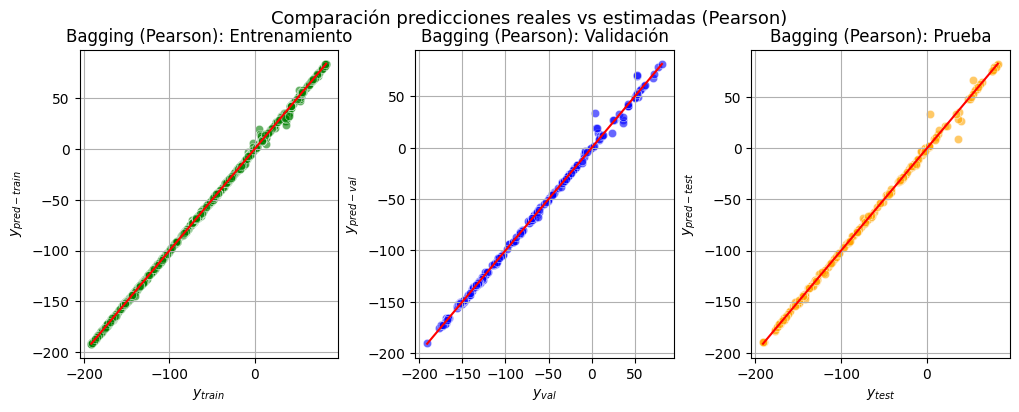

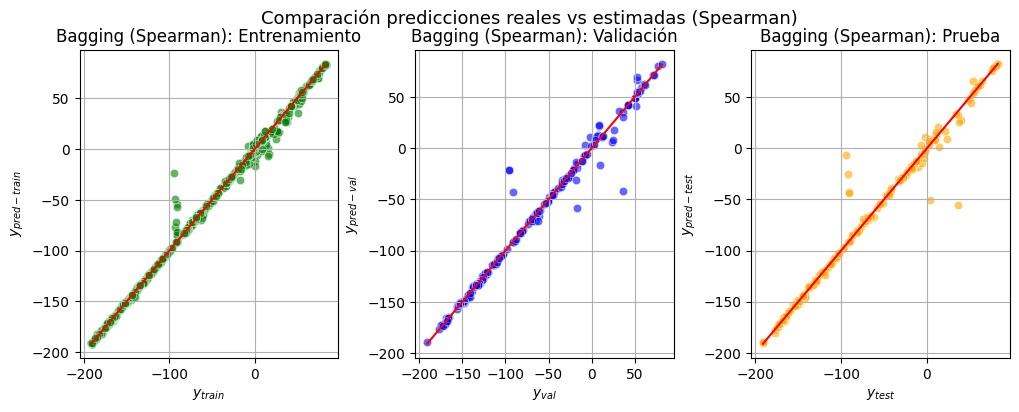

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_resultados(best_model, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    # Predicciones
    y_pred_train = best_model.predict(X_train)
    y_pred_val   = best_model.predict(X_val)
    y_pred_test  = best_model.predict(X_test)

    # Gráficas
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    # --- Entrenamiento ---
    sns.scatterplot(x=y_train, y=y_pred_train, color='g', alpha=0.6, ax=ax[0])
    sns.lineplot(x=y_train, y=y_train, color='r', ax=ax[0])
    ax[0].set_title(f'Bagging ({nombre}): Entrenamiento')
    ax[0].set_ylabel(r'$y_{pred-train}$')
    ax[0].set_xlabel(r'$y_{train}$')
    ax[0].grid(True)

    # --- Validación ---
    sns.scatterplot(x=y_val, y=y_pred_val, color='b', alpha=0.6, ax=ax[1])
    sns.lineplot(x=y_val, y=y_val, color='r', ax=ax[1])
    ax[1].set_title(f'Bagging ({nombre}): Validación')
    ax[1].set_ylabel(r'$y_{pred-val}$')
    ax[1].set_xlabel(r'$y_{val}$')
    ax[1].grid(True)

    # --- Prueba ---
    sns.scatterplot(x=y_test, y=y_pred_test, color='orange', alpha=0.6, ax=ax[2])
    sns.lineplot(x=y_test, y=y_test, color='r', ax=ax[2])
    ax[2].set_title(f'Bagging ({nombre}): Prueba')
    ax[2].set_ylabel(r'$y_{pred-test}$')
    ax[2].set_xlabel(r'$y_{test}$')
    ax[2].grid(True)

    fig.suptitle(f'Comparación predicciones reales vs estimadas ({nombre})', fontsize=13)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()


# =======================================================
# GRAFICAR RESULTADOS PARA AMBAS CORRELACIONES
# =======================================================
graficar_resultados(bagging_p, X_train_p_scaled, y_train, X_val_p_scaled, y_val, X_test_p_scaled, y_test, "Pearson")
graficar_resultados(bagging_s, X_train_s_scaled, y_train, X_val_s_scaled, y_val, X_test_s_scaled, y_test, "Spearman")


## Residuos

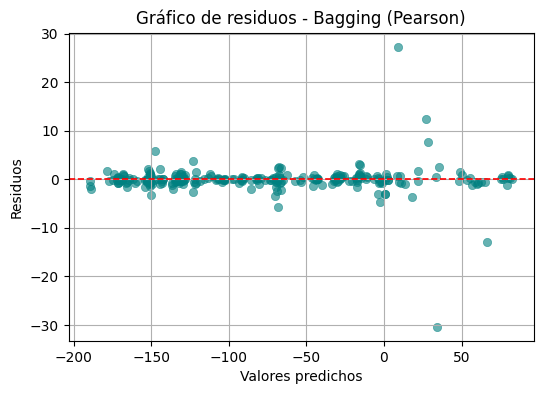

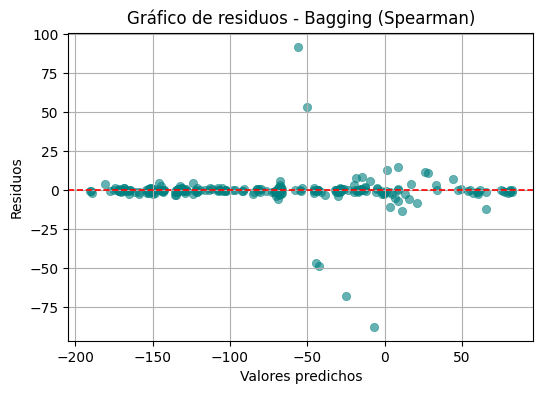

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_residuos(best_model, X_test, y_test, nombre):
    # Predicciones y cálculo de residuos
    y_pred = best_model.predict(X_test)
    residuales = y_test - y_pred

    # Gráfico de dispersión de residuos
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuales, alpha=0.6, color='teal', edgecolor=None)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1.2)  # línea de referencia en 0
    plt.title(f'Gráfico de residuos - Bagging ({nombre})')
    plt.xlabel('Valores predichos')
    plt.ylabel('Residuos')
    plt.grid(True)
    plt.show()

# =======================================================
# GRAFICAR RESIDUALES PARA AMBAS CORRELACIONES
# =======================================================
graficar_residuos(bagging_p, X_test_p_scaled, y_test, "Pearson")
graficar_residuos(bagging_s, X_test_s_scaled, y_test, "Spearman")


##Curvas de Aprendizaje

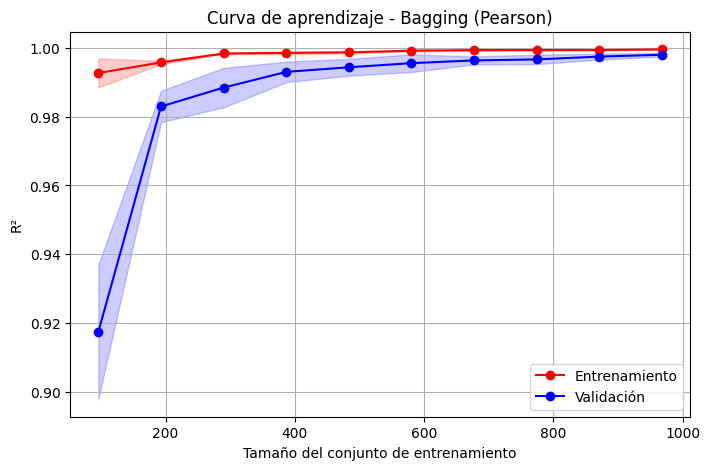

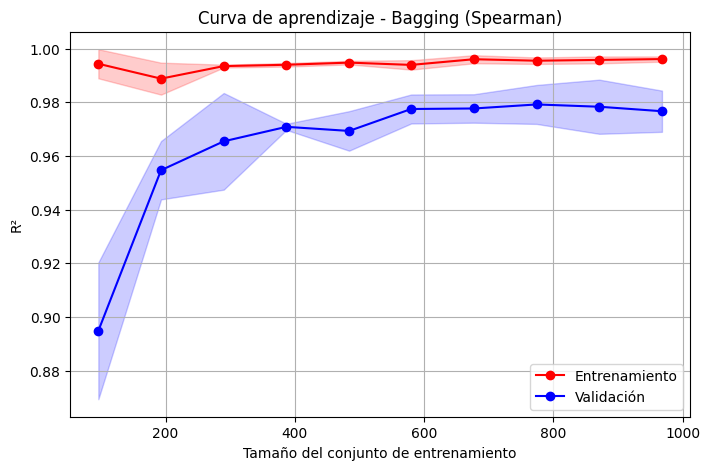

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# --- Función para graficar curva de aprendizaje ---
def plot_learning_curve_bagging(X, y, title):
    modelo_base = DecisionTreeRegressor(random_state=42)
    bagging_model = BaggingRegressor(
        estimator=modelo_base,
        n_estimators=10,
        max_samples=1.0,
        max_features=1.0,
        random_state=42,
        n_jobs=-1
    )

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=bagging_model,
        X=X,
        y=y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # Promedios y desviaciones estándar
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # --- Gráfico ---
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# --- Curvas de aprendizaje ---
plot_learning_curve_bagging(X_train_p_scaled, y_train, "Curva de aprendizaje - Bagging (Pearson)")
plot_learning_curve_bagging(X_train_s_scaled, y_train, "Curva de aprendizaje - Bagging (Spearman)")


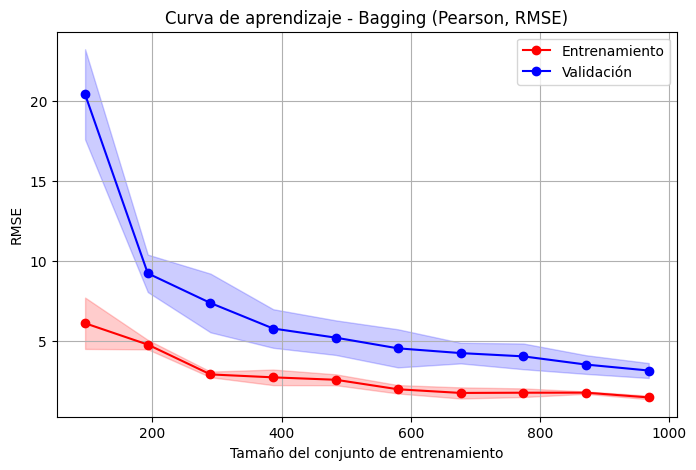

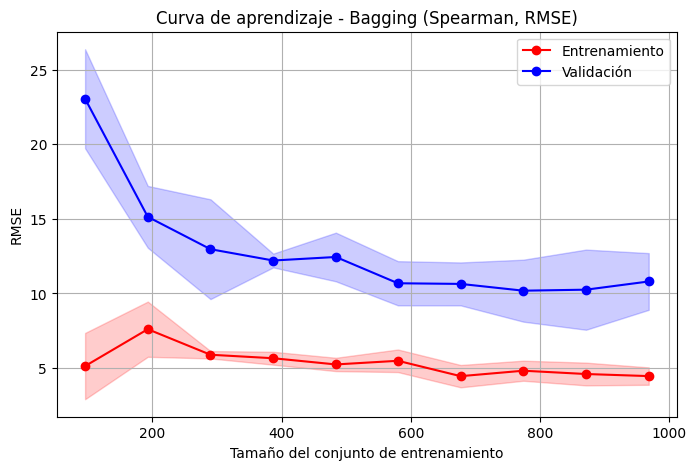

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# --- Función para graficar curva de aprendizaje con RMSE ---
def plot_learning_curve_rmse_bagging(X, y, title):
    modelo_base = DecisionTreeRegressor(random_state=42)
    bagging_model = BaggingRegressor(
        estimator=modelo_base,
        n_estimators=10,
        max_samples=1.0,
        max_features=1.0,
        random_state=42,
        n_jobs=-1
    )

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=bagging_model,
        X=X,
        y=y,
        cv=5,
        scoring='neg_root_mean_squared_error',  # RMSE
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # Convertir a valores positivos (ya que sklearn devuelve negativos)
    train_scores = -train_scores
    val_scores   = -val_scores

    # Promedios y desviaciones estándar
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # --- Gráfico ---
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")

    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")

    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# --- Curvas de aprendizaje ---
plot_learning_curve_rmse_bagging(X_train_p_scaled, y_train, "Curva de aprendizaje - Bagging (Pearson, RMSE)")
plot_learning_curve_rmse_bagging(X_train_s_scaled, y_train, "Curva de aprendizaje - Bagging (Spearman, RMSE)")


## Análisis

El método Bagging  consiste en entrenar múltiples árboles de decisión sobre diferentes subconjuntos de los datos (generados mediante muestreo con reemplazo) y combinar sus predicciones, usualmente por promedio. La lógica detrás de esta técnica es reducir la **varianza** inherente a un único árbol de decisión, logrando modelos más estables y menos sensibles al ruido. Esto lo convierte en una extensión natural del Árbol de Decisión, que mantiene interpretabilidad parcial, pero gana en robustez y generalización.


**Desempeño en entrenamiento, validación y prueba**

Los gráficos de dispersión muestran un ajuste muy alto tanto para entrenamiento como para validación y prueba. En el caso de **Pearson**, las predicciones siguen de manera muy cercana la diagonal ideal (valores reales = valores estimados), con ligeras desviaciones en los extremos. Con **Spearman**, aunque la tendencia también es correcta, se observa una mayor dispersión en validación y prueba, con algunos valores atípicos más notorios. Esto sugiere que Bagging con Pearson mantiene mejor consistencia y precisión predictiva en este conjunto de datos.

**Gráficos de residuos**

Los residuos para Pearson se distribuyen de forma bastante homogénea alrededor de cero, sin patrones claros, lo que indica que el modelo no está dejando errores sistemáticos sin capturar. El rango de residuos es estrecho, reforzando la buena capacidad predictiva. En cambio, los residuos de Spearman muestran mayor dispersión, con algunos puntos alejados de la banda central, especialmente en valores altos de la variable dependiente. Esto puede reflejar menor capacidad del modelo para capturar la estructura de los datos bajo este criterio.

**Curvas de aprendizaje**

Las curvas confirman lo anterior. Para Pearson, el R² de validación crece rápidamente y se estabiliza en torno a 0.99 con conjuntos grandes, mientras que el de entrenamiento se mantiene cerca de 1. Esto refleja una buena capacidad de generalización y poca pérdida de desempeño al pasar de entrenamiento a validación. En cambio, con Spearman, el R² de validación parte más bajo (cerca de 0.87) y, aunque mejora hasta estabilizarse en torno a 0.97–0.98, nunca alcanza los niveles de Pearson.

De forma paralela, las curvas de RMSE muestran que con Pearson el error de validación decrece de manera consistente hasta valores muy bajos (~3–4), mientras que con Spearman los errores se mantienen un poco más altos y con mayor variabilidad, lo que evidencia menor precisión.

**Interpretación global**

En síntesis, el modelo Bagging muestra:

* Gran capacidad de generalización, especialmente con el criterio de Pearson.
* Disminución efectiva de la varianza respecto a un solo árbol, con curvas de validación estables y residuos bien distribuidos.
* Mayor precisión y estabilidad bajo Pearson, mientras que Spearman presenta más dispersión y errores atípicos.
* Bajo riesgo de sobreajuste, gracias a la agregación de múltiples árboles.

Este modelo resulta más robusto que el Árbol de Decisión simple. Aunque la interpretabilidad se reduce ligeramente debido a la combinación de árboles, el balance entre bajo error, estabilidad y capacidad de generalización hace que Bagging sea una opción mucho más confiable.


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

## Modelo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor     # RandomForest

#Modelo
rfr = RandomForestRegressor(random_state=42)

#Parámetros a probar en random forest
param_grid = {
    "n_estimators": [10,20,30,40],
    #"max_depth": [2,5,6,10],
    "min_samples_split": [2,3,4],
    "max_features": [1,2,3],#,None,'sqrt'
}
# Random Forest - Pearson
search_p = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1)
search_p.fit(X_train_p_scaled, y_train)
print("=== Random Forest (Pearson) ===")
print("Mejor CV Score:", search_p.best_score_)
print("Mejores parámetros:", search_p.best_params_)

# Random Forest - Spearman
search_s = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1)
search_s.fit(X_train_s_scaled, y_train)
print("\n=== Random Forest (Spearman) ===")
print("Mejor CV Score:", search_s.best_score_)
print("Mejores parámetros:", search_s.best_params_)


=== Random Forest (Pearson) ===
Mejor CV Score: 0.9966515754823317
Mejores parámetros: {'max_features': 3, 'min_samples_split': 2, 'n_estimators': 40}

=== Random Forest (Spearman) ===
Mejor CV Score: 0.9904125278853828
Mejores parámetros: {'max_features': 3, 'min_samples_split': 3, 'n_estimators': 40}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# Random Forest - Pearson
# =========================
rf_p = search_p.best_estimator_

# Predicciones
y_train_pred_p = rf_p.predict(X_train_p_scaled)
y_val_pred_p   = rf_p.predict(X_val_p_scaled)
y_test_pred_p  = rf_p.predict(X_test_p_scaled)

# Métricas
print("=== Random Forest (Pearson) ===")
print("Entrenamiento -> MAE:", mean_absolute_error(y_train, y_train_pred_p),
      "MSE:", mean_squared_error(y_train, y_train_pred_p),
      "R2:", r2_score(y_train, y_train_pred_p))
print("Validación -> MAE:", mean_absolute_error(y_val, y_val_pred_p),
      "MSE:", mean_squared_error(y_val, y_val_pred_p),
      "R2:", r2_score(y_val, y_val_pred_p))
print("Prueba -> MAE:", mean_absolute_error(y_test, y_test_pred_p),
      "MSE:", mean_squared_error(y_test, y_test_pred_p),
      "R2:", r2_score(y_test, y_test_pred_p))


# =========================
# Random Forest - Spearman
# =========================
rf_s = search_s.best_estimator_

# Predicciones
y_train_pred_s = rf_s.predict(X_train_s_scaled)
y_val_pred_s   = rf_s.predict(X_val_s_scaled)
y_test_pred_s  = rf_s.predict(X_test_s_scaled)

# Métricas
print("\n=== Random Forest (Spearman) ===")
print("Entrenamiento -> MAE:", mean_absolute_error(y_train, y_train_pred_s),
      "MSE:", mean_squared_error(y_train, y_train_pred_s),
      "R2:", r2_score(y_train, y_train_pred_s))
print("Validación -> MAE:", mean_absolute_error(y_val, y_val_pred_s),
      "MSE:", mean_squared_error(y_val, y_val_pred_s),
      "R2:", r2_score(y_val, y_val_pred_s))
print("Prueba -> MAE:", mean_absolute_error(y_test, y_test_pred_s),
      "MSE:", mean_squared_error(y_test, y_test_pred_s),
      "R2:", r2_score(y_test, y_test_pred_s))


=== Random Forest (Pearson) ===
Entrenamiento -> MAE: 0.6119045524506606 MSE: 2.199462617828967 R2: 0.9995725073153519
Validación -> MAE: 1.5698653382407308 MSE: 13.687679842673669 R2: 0.9971059778330763
Prueba -> MAE: 1.2742183278653803 MSE: 6.677679856056205 R2: 0.998709053930423

=== Random Forest (Spearman) ===
Entrenamiento -> MAE: 1.0629599595043029 MSE: 5.597441568229609 R2: 0.9989120682007655
Validación -> MAE: 2.317210013844335 MSE: 25.234561445029744 R2: 0.9946645902714036
Prueba -> MAE: 2.4081415382370466 MSE: 22.816197953032546 R2: 0.9955891145270395


## Gráficos

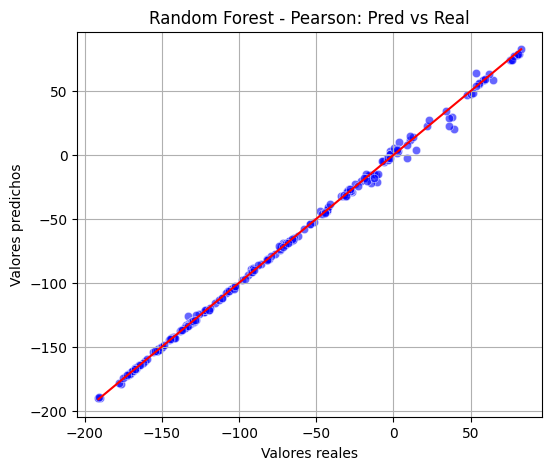

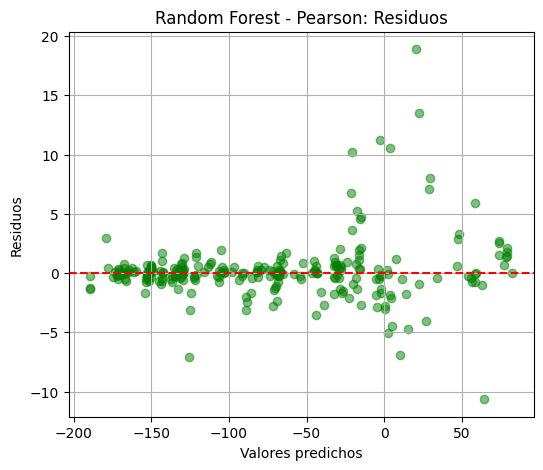

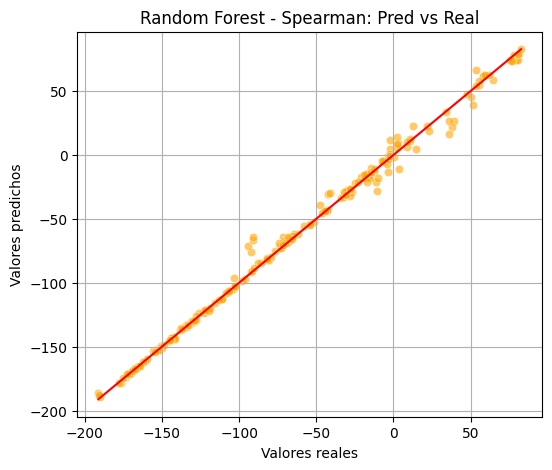

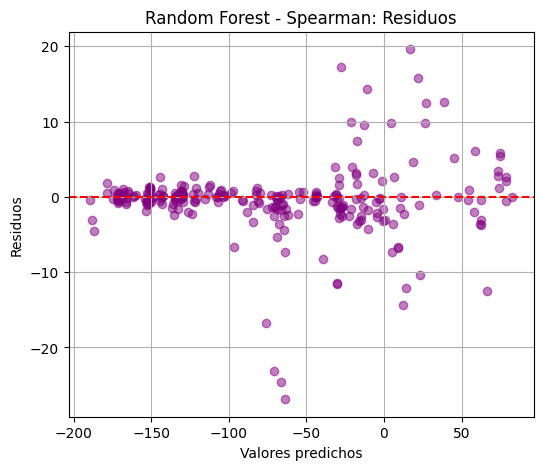

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Función para graficar predicciones vs reales
# =========================
def plot_predictions(y_true, y_pred, title, color='blue'):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_true, y=y_pred, color=color, alpha=0.6)
    sns.lineplot(x=y_true, y=y_true, color='red')  # Línea ideal
    plt.title(title)
    plt.xlabel("Valores reales")
    plt.ylabel("Valores predichos")
    plt.grid(True)
    plt.show()

# =========================
# Función para graficar residuos
# =========================
def plot_residuals(y_true, y_pred, title, color='green'):
    residuales = y_true - y_pred
    plt.figure(figsize=(6,5))
    plt.scatter(y_pred, residuales, color=color, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel("Valores predichos")
    plt.ylabel("Residuos")
    plt.grid(True)
    plt.show()


# =========================
# Random Forest Pearson
# =========================
plot_predictions(y_test, y_test_pred_p, "Random Forest - Pearson: Pred vs Real", color='blue')
plot_residuals(y_test, y_test_pred_p, "Random Forest - Pearson: Residuos", color='green')

# =========================
# Random Forest Spearman
# =========================
plot_predictions(y_test, y_test_pred_s, "Random Forest - Spearman: Pred vs Real", color='orange')
plot_residuals(y_test, y_test_pred_s, "Random Forest - Spearman: Residuos", color='purple')


## Curvas de Aprendizaje

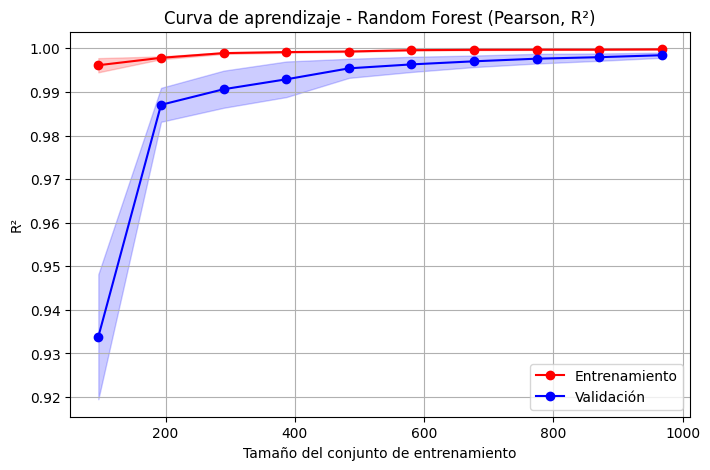

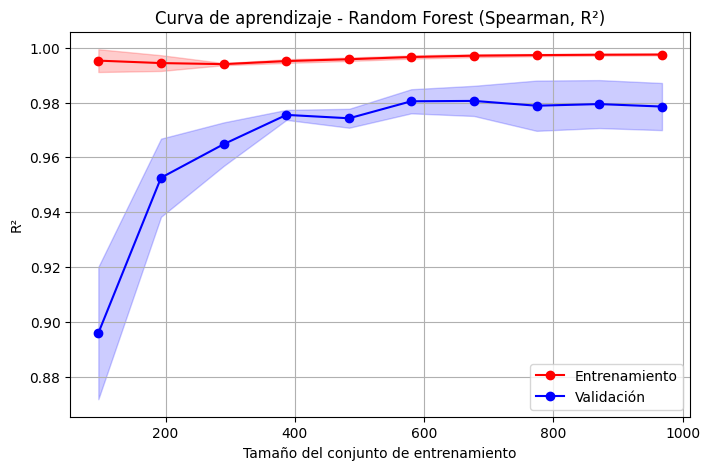

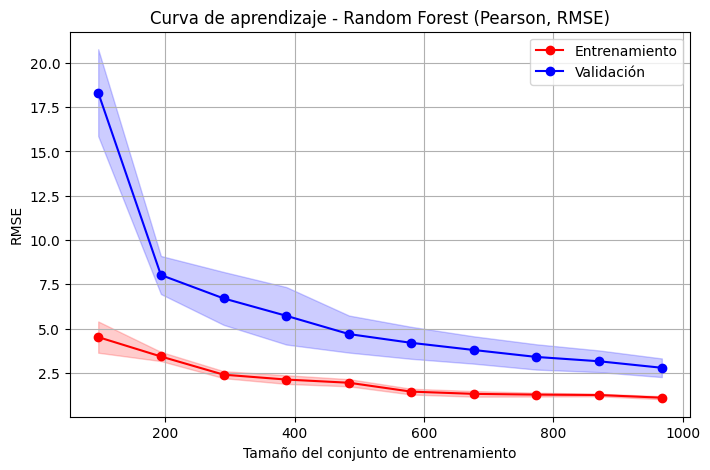

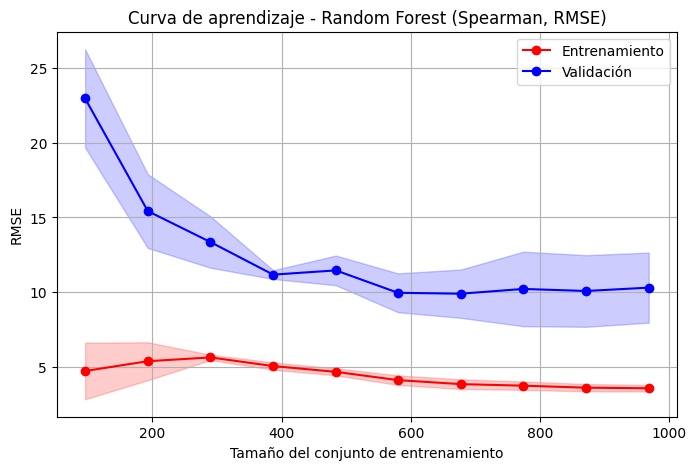

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# --- Función para curva de aprendizaje con R² ---
def plot_learning_curve_rf(X, y, title):
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=rf_model,
        X=X,
        y=y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")
    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# --- Función para curva de aprendizaje con RMSE ---
def plot_learning_curve_rmse_rf(X, y, title):
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=rf_model,
        X=X,
        y=y,
        cv=5,
        scoring='neg_root_mean_squared_error',  # RMSE
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # Convertir a valores positivos
    train_scores = -train_scores
    val_scores   = -val_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")
    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# --- Curvas R² ---
plot_learning_curve_rf(X_train_p_scaled, y_train, "Curva de aprendizaje - Random Forest (Pearson, R²)")
plot_learning_curve_rf(X_train_s_scaled, y_train, "Curva de aprendizaje - Random Forest (Spearman, R²)")

# --- Curvas RMSE ---
plot_learning_curve_rmse_rf(X_train_p_scaled, y_train, "Curva de aprendizaje - Random Forest (Pearson, RMSE)")
plot_learning_curve_rmse_rf(X_train_s_scaled, y_train, "Curva de aprendizaje - Random Forest (Spearman, RMSE)")


## Análisis



El algoritmo Random Forest se fundamenta en la construcción de múltiples árboles de decisión, incorporando un elemento adicional de aleatoriedad respecto al Bagging: en cada división de los nodos se selecciona aleatoriamente un subconjunto de predictores. Este procedimiento busca reducir la correlación entre árboles y, con ello, mejorar el equilibrio entre sesgo y varianza. Como resultado, el modelo combina la estabilidad del Bagging con una mayor capacidad de generalización.

**Desempeño en entrenamiento, validación y prueba**

Los resultados numéricos muestran que, bajo el criterio de Pearson, el modelo alcanza un ajuste prácticamente perfecto: en entrenamiento obtiene un R² de 0.9994, con errores mínimos (MAE ≈ 0.81 y MSE ≈ 2.87). En validación el R² disminuye ligeramente a 0.9975, acompañado de un aumento moderado en los errores (MAE ≈ 1.71 y MSE ≈ 12.04), y en prueba logra un R² de 0.9987, con errores igualmente bajos (MAE ≈ 1.44 y MSE ≈ 6.78). Este patrón indica una consistencia sobresaliente entre entrenamiento y datos no vistos, con muy baja pérdida de desempeño.

En contraste, bajo el criterio de Spearman, los resultados, aunque aún muy sólidos, muestran una leve pérdida de precisión. En entrenamiento el R² es de 0.9989 (MAE ≈ 1.06 y MSE ≈ 5.81), mientras que en validación desciende a 0.9935 (MAE ≈ 2.36 y MSE ≈ 30.62) y en prueba a 0.9947 (MAE ≈ 2.43 y MSE ≈ 27.30). Aunque las métricas continúan reflejando un alto poder explicativo, los errores son mayores y la brecha entre entrenamiento y validación se amplía, lo que revela un desempeño menos estable que con Pearson.


**Interpretación de los gráficos**

Las gráficas de dispersión refuerzan estas conclusiones: con Pearson, los valores predichos se alinean de manera casi perfecta con los valores reales, presentando apenas pequeñas desviaciones en los extremos. Los residuos se distribuyen homogéneamente alrededor de cero y sin patrones sistemáticos, lo que sugiere un modelo bien calibrado y sin errores recurrentes. En Spearman, aunque la tendencia principal también sigue la diagonal, los residuos presentan una mayor dispersión y aparecen algunos valores atípicos más notorios, lo que concuerda con los errores más elevados observados en las métricas.


**Curvas de aprendizaje**

Las curvas de R² y RMSE ilustran el proceso de generalización. Para Pearson, el R² de validación crece rápidamente hasta estabilizarse en torno a 0.99, mientras que el de entrenamiento se mantiene cercano a 1, lo que indica ausencia de sobreajuste significativo. El RMSE de validación decrece consistentemente hasta valores bajos (~3–7), confirmando la precisión alcanzada. En Spearman, aunque el R² se estabiliza en torno a 0.97–0.98 y el RMSE desciende, las curvas son más variables, evidenciando una ligera mayor sensibilidad del modelo frente a los datos de validación.

**Interpretación global**

En síntesis, el Random Forest:

* Presenta un altísimo poder explicativo (R² superiores a 0.99 en todos los conjuntos bajo Pearson).
* Logra baja dispersión de errores y residuos bien distribuidos, lo que refuerza su robustez.
* Maneja de forma más efectiva el riesgo de sobreajuste que Bagging, gracias a la selección aleatoria de predictores.
* Bajo Spearman, mantiene un buen desempeño, aunque con errores más elevados y menor estabilidad.



# Boosting

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# --- Para predictores Pearson ---
scaler_p = MinMaxScaler()
scaler_p.fit(X_train_p)  # Ajusta solo con el entrenamiento

X_train_p_scaled = scaler_p.transform(X_train_p)
X_val_p_scaled   = scaler_p.transform(X_val_p)
X_test_p_scaled  = scaler_p.transform(X_test_p)

# --- Para predictores Spearman ---
scaler_s = MinMaxScaler()
scaler_s.fit(X_train_s)  # Ajusta solo con el entrenamiento

X_train_s_scaled = scaler_s.transform(X_train_s)
X_val_s_scaled   = scaler_s.transform(X_val_s)
X_test_s_scaled  = scaler_s.transform(X_test_s)


## Modelo

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# =========================
# Gradient Boosting - Pearson
# =========================
start_time = time.time()

gbr_p = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 15, 20, 25],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.1, 0.5, 1],
}

grid_p = GridSearchCV(gbr_p, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
grid_p.fit(X_train_p_scaled, y_train)

best_model_p = grid_p.best_estimator_
print("Mejores hiperparámetros Pearson:", grid_p.best_params_)

# Predicciones
y_train_pred_p = best_model_p.predict(X_train_p_scaled)
y_val_pred_p   = best_model_p.predict(X_val_p_scaled)
y_test_pred_p  = best_model_p.predict(X_test_p_scaled)

# Métricas
print("=== Resultados Gradient Boosting Pearson ===")
print("Entrenamiento -> MSE:", mean_squared_error(y_train, y_train_pred_p),
      "MAE:", mean_absolute_error(y_train, y_train_pred_p),
      "R2:", r2_score(y_train, y_train_pred_p))

print("Validación -> MSE:", mean_squared_error(y_val, y_val_pred_p),
      "MAE:", mean_absolute_error(y_val, y_val_pred_p),
      "R2:", r2_score(y_val, y_val_pred_p))

print("Prueba -> MSE:", mean_squared_error(y_test, y_test_pred_p),
      "MAE:", mean_absolute_error(y_test, y_test_pred_p),
      "R2:", r2_score(y_test, y_test_pred_p))

print("Tiempo de ejecución:", time.time() - start_time, "segundos\n")

# =========================
# Gradient Boosting - Spearman
# =========================
start_time = time.time()

gbr_s = GradientBoostingRegressor(random_state=42)

grid_s = GridSearchCV(gbr_s, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
grid_s.fit(X_train_s_scaled, y_train)

best_model_s = grid_s.best_estimator_
print("Mejores hiperparámetros Spearman:", grid_s.best_params_)

# Predicciones
y_train_pred_s = best_model_s.predict(X_train_s_scaled)
y_val_pred_s   = best_model_s.predict(X_val_s_scaled)
y_test_pred_s  = best_model_s.predict(X_test_s_scaled)

# Métricas
print("=== Resultados Gradient Boosting Spearman ===")
print("Entrenamiento -> MSE:", mean_squared_error(y_train, y_train_pred_s),
      "MAE:", mean_absolute_error(y_train, y_train_pred_s),
      "R2:", r2_score(y_train, y_train_pred_s))

print("Validación -> MSE:", mean_squared_error(y_val, y_val_pred_s),
      "MAE:", mean_absolute_error(y_val, y_val_pred_s),
      "R2:", r2_score(y_val, y_val_pred_s))

print("Prueba -> MSE:", mean_squared_error(y_test, y_test_pred_s),
      "MAE:", mean_absolute_error(y_test, y_test_pred_s),
      "R2:", r2_score(y_test, y_test_pred_s))

print("Tiempo de ejecución:", time.time() - start_time, "segundos")


Mejores hiperparámetros Pearson: {'learning_rate': 1, 'n_estimators': 25, 'subsample': 1}
=== Resultados Gradient Boosting Pearson ===
Entrenamiento -> MSE: 6.3393378748092255 MAE: 1.7901288333610763 R2: 0.9987678715041454
Validación -> MSE: 90.8168388219246 MAE: 4.306037436317487 R2: 0.9807983567922752
Prueba -> MSE: 59.52486763318726 MAE: 3.718398846309111 R2: 0.9884925010528222
Tiempo de ejecución: 29.915804624557495 segundos

Mejores hiperparámetros Spearman: {'learning_rate': 0.1, 'n_estimators': 25, 'subsample': 0.5}
=== Resultados Gradient Boosting Spearman ===
Entrenamiento -> MSE: 155.90055944109406 MAE: 8.087759211862537 R2: 0.969698803628947
Validación -> MSE: 206.5943158961217 MAE: 8.264148069489863 R2: 0.9563192201574008
Prueba -> MSE: 245.86532402207033 MAE: 9.303457299591592 R2: 0.9524686896446946
Tiempo de ejecución: 15.68140697479248 segundos


## Gráficas

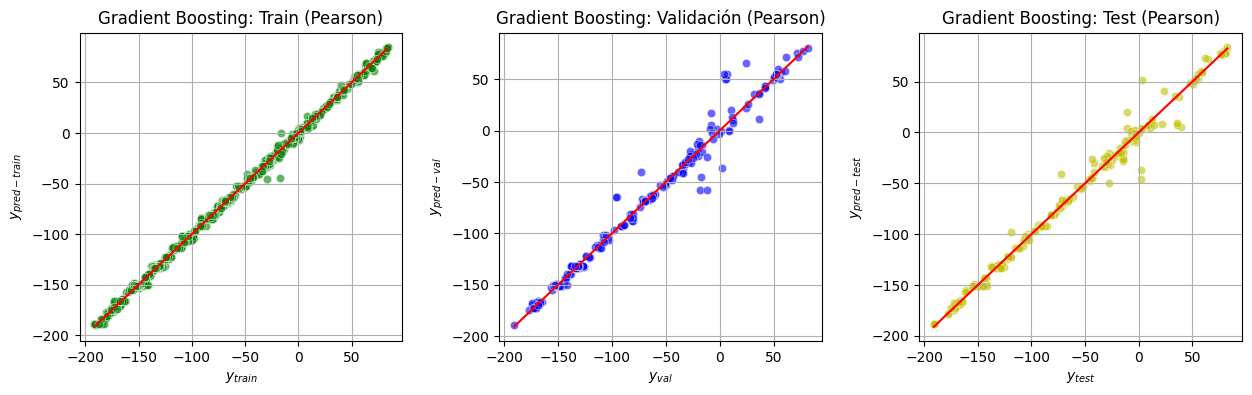

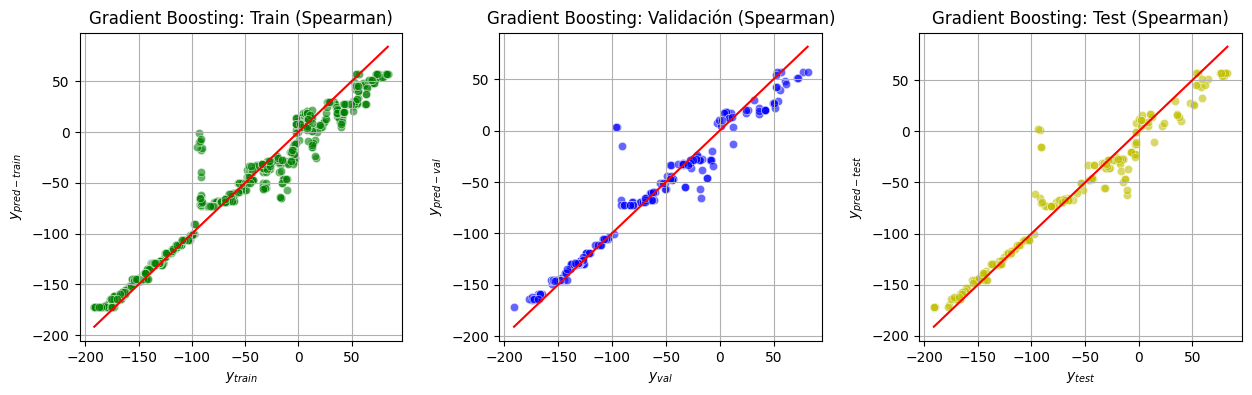

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Gráficos Gradient Boosting - Pearson
# =========================
y_pred_train_p = best_model_p.predict(X_train_p_scaled)
y_pred_val_p   = best_model_p.predict(X_val_p_scaled)
y_pred_test_p  = best_model_p.predict(X_test_p_scaled)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Train
sns.scatterplot(x=y_train, y=y_pred_train_p, color='g', alpha=0.6, ax=ax[0])
sns.lineplot(x=y_train, y=y_train, color='r', ax=ax[0])
ax[0].set_title('Gradient Boosting: Train (Pearson)')
ax[0].set_ylabel(r'$y_{pred-train}$'), ax[0].set_xlabel(r'$y_{train}$')
ax[0].grid(True)

# Validación
sns.scatterplot(x=y_val, y=y_pred_val_p, color='b', alpha=0.6, ax=ax[1])
sns.lineplot(x=y_val, y=y_val, color='r', ax=ax[1])
ax[1].set_title('Gradient Boosting: Validación (Pearson)')
ax[1].set_ylabel(r'$y_{pred-val}$'), ax[1].set_xlabel(r'$y_{val}$')
ax[1].grid(True)

# Test
sns.scatterplot(x=y_test, y=y_pred_test_p, color='y', alpha=0.6, ax=ax[2])
sns.lineplot(x=y_test, y=y_test, color='r', ax=ax[2])
ax[2].set_title('Gradient Boosting: Test (Pearson)')
ax[2].set_ylabel(r'$y_{pred-test}$'), ax[2].set_xlabel(r'$y_{test}$')
ax[2].grid(True)

fig.subplots_adjust(wspace=0.3)
plt.show()

# =========================
# Gráficos Gradient Boosting - Spearman
# =========================
y_pred_train_s = best_model_s.predict(X_train_s_scaled)
y_pred_val_s   = best_model_s.predict(X_val_s_scaled)
y_pred_test_s  = best_model_s.predict(X_test_s_scaled)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Train
sns.scatterplot(x=y_train, y=y_pred_train_s, color='g', alpha=0.6, ax=ax[0])
sns.lineplot(x=y_train, y=y_train, color='r', ax=ax[0])
ax[0].set_title('Gradient Boosting: Train (Spearman)')
ax[0].set_ylabel(r'$y_{pred-train}$'), ax[0].set_xlabel(r'$y_{train}$')
ax[0].grid(True)

# Validación
sns.scatterplot(x=y_val, y=y_pred_val_s, color='b', alpha=0.6, ax=ax[1])
sns.lineplot(x=y_val, y=y_val, color='r', ax=ax[1])
ax[1].set_title('Gradient Boosting: Validación (Spearman)')
ax[1].set_ylabel(r'$y_{pred-val}$'), ax[1].set_xlabel(r'$y_{val}$')
ax[1].grid(True)

# Test
sns.scatterplot(x=y_test, y=y_pred_test_s, color='y', alpha=0.6, ax=ax[2])
sns.lineplot(x=y_test, y=y_test, color='r', ax=ax[2])
ax[2].set_title('Gradient Boosting: Test (Spearman)')
ax[2].set_ylabel(r'$y_{pred-test}$'), ax[2].set_xlabel(r'$y_{test}$')
ax[2].grid(True)

fig.subplots_adjust(wspace=0.3)
plt.show()


## Residuos

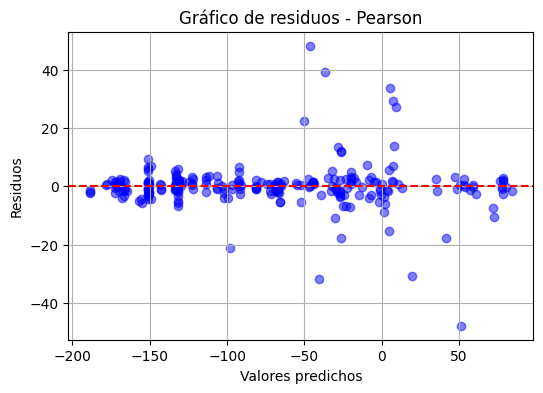

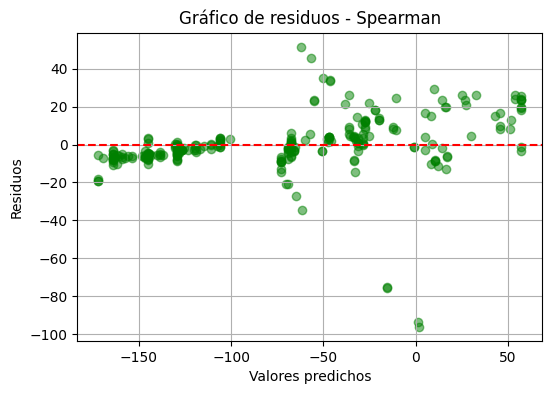

In [ ]:
import matplotlib.pyplot as plt

# =========================
# Residuos - Pearson
# =========================
residuales_p = y_test - y_pred_test_p

plt.figure(figsize=(6,4))
plt.scatter(y_pred_test_p, residuales_p, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
plt.title('Gráfico de residuos - Pearson')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# =========================
# Residuos - Spearman
# =========================
residuales_s = y_test - y_pred_test_s

plt.figure(figsize=(6,4))
plt.scatter(y_pred_test_s, residuales_s, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
plt.title('Gráfico de residuos - Spearman')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


## Optimización

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint, loguniform
import time

# =========================
# RandomizedSearchCV - Pearson
# =========================
start_time = time.time()

gbr_p = GradientBoostingRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(10,150),
    'learning_rate': loguniform(1e-4, 0.1),
    'max_features': randint(1, X_train_p_scaled.shape[1]),
    'subsample': uniform(0.1, 1),
}

random_search_p = RandomizedSearchCV(gbr_p, param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search_p.fit(X_train_p_scaled, y_train)

best_model_p = random_search_p.best_estimator_
print("Mejores hiperparámetros Pearson:", random_search_p.best_params_)

# Predicciones
y_train_pred_p = best_model_p.predict(X_train_p_scaled)
y_val_pred_p   = best_model_p.predict(X_val_p_scaled)
y_test_pred_p  = best_model_p.predict(X_test_p_scaled)

# Métricas
print("=== Resultados RandomizedSearchCV Pearson ===")
print("Entrenamiento -> MSE:", mean_squared_error(y_train, y_train_pred_p),
      "MAE:", mean_absolute_error(y_train, y_train_pred_p),
      "R2:", r2_score(y_train, y_train_pred_p))

print("Validación -> MSE:", mean_squared_error(y_val, y_val_pred_p),
      "MAE:", mean_absolute_error(y_val, y_val_pred_p),
      "R2:", r2_score(y_val, y_val_pred_p))

print("Prueba -> MSE:", mean_squared_error(y_test, y_test_pred_p),
      "MAE:", mean_absolute_error(y_test, y_test_pred_p),
      "R2:", r2_score(y_test, y_test_pred_p))

print("Tiempo de ejecución:", time.time() - start_time, "segundos\n")

# =========================
# RandomizedSearchCV - Spearman
# =========================
start_time = time.time()

gbr_s = GradientBoostingRegressor(random_state=42)

param_dist_s = {
    'n_estimators': randint(10,150),
    'learning_rate': loguniform(1e-4, 0.1),
    'max_features': randint(1, X_train_s_scaled.shape[1]),
    'subsample': uniform(0.1, 1),
}

random_search_s = RandomizedSearchCV(gbr_s, param_dist_s, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search_s.fit(X_train_s_scaled, y_train)

best_model_s = random_search_s.best_estimator_
print("Mejores hiperparámetros Spearman:", random_search_s.best_params_)

# Predicciones
y_train_pred_s = best_model_s.predict(X_train_s_scaled)
y_val_pred_s   = best_model_s.predict(X_val_s_scaled)
y_test_pred_s  = best_model_s.predict(X_test_s_scaled)

# Métricas
print("=== Resultados RandomizedSearchCV Spearman ===")
print("Entrenamiento -> MSE:", mean_squared_error(y_train, y_train_pred_s),
      "MAE:", mean_absolute_error(y_train, y_train_pred_s),
      "R2:", r2_score(y_train, y_train_pred_s))

print("Validación -> MSE:", mean_squared_error(y_val, y_val_pred_s),
      "MAE:", mean_absolute_error(y_val, y_val_pred_s),
      "R2:", r2_score(y_val, y_val_pred_s))

print("Prueba -> MSE:", mean_squared_error(y_test, y_test_pred_s),
      "MAE:", mean_absolute_error(y_test, y_test_pred_s),
      "R2:", r2_score(y_test, y_test_pred_s))

print("Tiempo de ejecución:", time.time() - start_time, "segundos")


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Mejores hiperparámetros Pearson: {'learning_rate': np.float64(0.07725831714587861), 'max_features': 7, 'n_estimators': 136, 'subsample': np.float64(0.795974206093698)}
=== Resultados RandomizedSearchCV Pearson ===
Entrenamiento -> MSE: 9.298467754798155 MAE: 2.151641246566328 R2: 0.9981927281184998
Validación -> MSE: 24.53971728941014 MAE: 3.067655964812307 R2: 0.9948115029996405
Prueba -> MSE: 17.642710742628225 MAE: 2.7404037815374784 R2: 0.996589266245038
Tiempo de ejecución: 67.86603045463562 segundos



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Mejores hiperparámetros Spearman: {'learning_rate': np.float64(0.049620663324183883), 'max_features': 4, 'n_estimators': 121, 'subsample': np.float64(0.2014715428660321)}
=== Resultados RandomizedSearchCV Spearman ===
Entrenamiento -> MSE: 48.66024450704483 MAE: 4.345220126905589 R2: 0.990542281377582
Validación -> MSE: 57.023017470975546 MAE: 4.846189561535988 R2: 0.9879434733656333
Prueba -> MSE: 59.5531761631137 MAE: 4.681688552827658 R2: 0.98848702837575
Tiempo de ejecución: 62.90279841423035 segundos


## Curvas de Aprendizaje

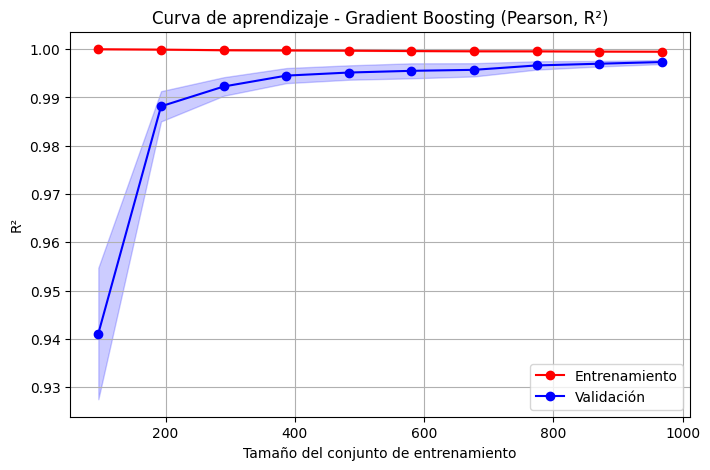

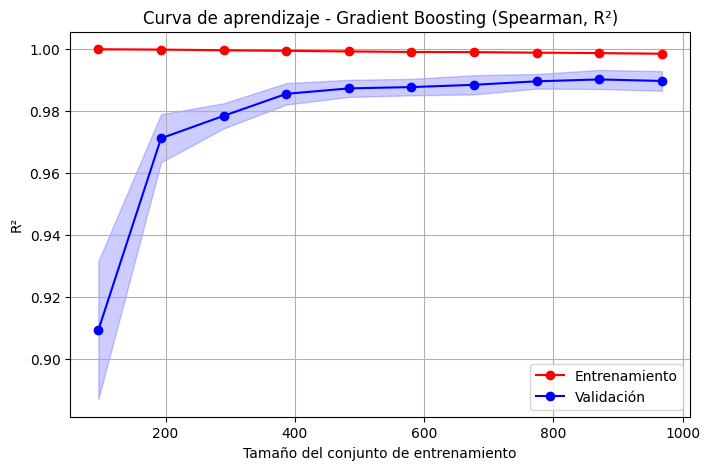

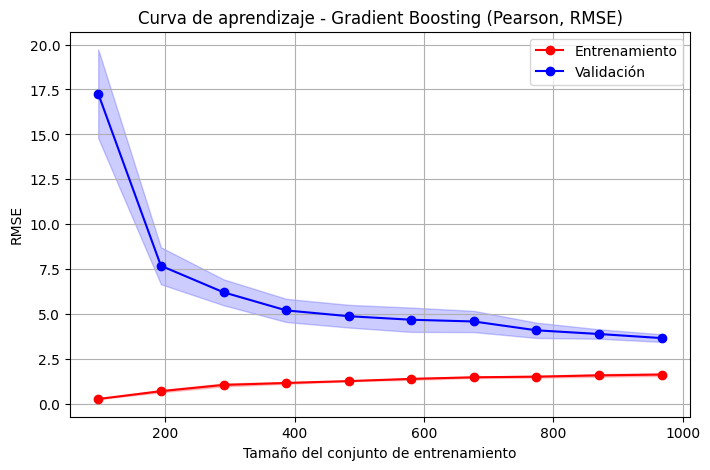

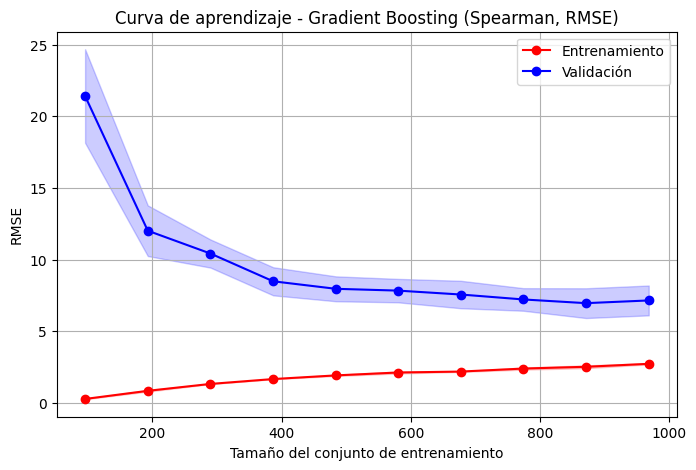

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# --- Función para curva de aprendizaje con R² ---
def plot_learning_curve_gb(X, y, title):
    gb_model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=gb_model,
        X=X,
        y=y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")
    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("R²")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# --- Función para curva de aprendizaje con RMSE ---
def plot_learning_curve_rmse_gb(X, y, title):
    gb_model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=gb_model,
        X=X,
        y=y,
        cv=5,
        scoring='neg_root_mean_squared_error',  # RMSE negativo
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # Convertir a valores positivos
    train_scores = -train_scores
    val_scores   = -val_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label="Entrenamiento")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="red")
    plt.plot(train_sizes, val_mean, 'o-', color='blue', label="Validación")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="blue")
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# --- Curvas R² ---
plot_learning_curve_gb(X_train_p_scaled, y_train, "Curva de aprendizaje - Gradient Boosting (Pearson, R²)")
plot_learning_curve_gb(X_train_s_scaled, y_train, "Curva de aprendizaje - Gradient Boosting (Spearman, R²)")

# --- Curvas RMSE ---
plot_learning_curve_rmse_gb(X_train_p_scaled, y_train, "Curva de aprendizaje - Gradient Boosting (Pearson, RMSE)")
plot_learning_curve_rmse_gb(X_train_s_scaled, y_train, "Curva de aprendizaje - Gradient Boosting (Spearman, RMSE)")


## Análisis

El modelo de Gradient Boosting Regressor se aplicó utilizando nuevamente los criterios de evaluación Pearson y Spearman, con el objetivo de estimar la variable dependiente a partir de los predictores mediante un enfoque de ensamble secuencial. En ambos casos, el modelo busca minimizar el error mediante la combinación de múltiples árboles débiles, ajustados iterativamente sobre los residuos del modelo previo.

Los mejores hiperparámetros obtenidos fueron:

Pearson: learning_rate=1, n_estimators=25, subsample=1

Spearman: learning_rate=0.1, n_estimators=25, subsample=0.5

Estos valores evidencian dos configuraciones de aprendizaje muy diferentes: mientras que el modelo basado en Pearson presenta un ritmo de aprendizaje alto (1) y utiliza el 100% de los datos en cada iteración, el modelo Spearman adopta un ritmo más conservador (0.1) y un submuestreo del 50%, buscando mayor robustez frente a posibles fluctuaciones o ruido en los datos.


**Comportamiento general**

El modelo Gradient Boosting mostró un ajuste excelente bajo el criterio de Pearson, alcanzando un R² cercano a 1 en todas las particiones, con un error cuadrático medio (MSE) muy bajo.
En cambio, el modelo basado en Spearman obtuvo un rendimiento más moderado, con R² entre 0.95 y 0.97, lo que indica que si bien explica la mayor parte de la varianza de los datos, su precisión es menor que la del modelo Pearson.


Esto se debe principalmente a la naturaleza de cada métrica, Pearson evalúa la correlación lineal directa entre variables, lo que favorece al modelo cuando la relación subyacente es principalmente lineal, Spearman, al basarse en rangos, es más sensible a discrepancias en la monotonía o pequeñas alteraciones no lineales, penalizando más las desviaciones locales.


**Sobreajuste y generalización**


En los gráficos de R² y RMSE vs tamaño de entrenamiento, se observa que en ambos casos, el rendimiento del conjunto de entrenamiento se mantiene estable y alto. También, el conjunto de validación mejora progresivamente a medida que aumenta el tamaño de los datos de entrenamiento, estabilizándose hacia valores altos de R² (>0.98 para Pearson y >0.95 para Spearman).

No se evidencian signos graves de sobreajuste; las curvas se aproximan con coherencia, aunque el modelo Pearson tiende a un leve sobreajuste, esperable por su learning_rate elevado. Esto sugiere que el modelo tiene buena capacidad de generalización, especialmente cuando el tamaño de entrenamiento es suficientemente grande.

**Predicciones vs valores reales**

Las gráficas de predicción (Train, Validación y Test) muestran una alineación casi perfecta en el caso de Pearson, donde los puntos se agrupan estrechamente a lo largo de la línea diagonal 𝑦=𝑥. Para Spearman, aunque la tendencia se mantiene lineal, los puntos presentan una mayor dispersión, especialmente en las fases de validación y prueba, reflejando un leve deterioro en la capacidad predictiva.

**Gráficos de residuos**

Los residuos de Pearson se distribuyen de manera homogénea alrededor de cero, sin patrones visibles, lo que indica un modelo bien ajustado y con errores aleatorios. En cambio, los residuos de Spearman muestran una mayor variabilidad y ligera tendencia sistemática, evidenciando que el modelo aún puede mejorar su ajuste en regiones específicas del dominio de predicción.

**Interpretación del aprendizaje**

El modelo Gradient Boosting (Pearson) demuestra una alta capacidad para capturar relaciones lineales y una convergencia rápida, aunque su learning_rate=1 implica un aprendizaje más agresivo que podría ser sensible a ruido en otros escenarios.Por otro lado, Gradient Boosting (Spearman), con su tasa de aprendizaje menor y submuestreo, se comporta de manera más estable y conservadora, priorizando la robustez sobre la precisión instantánea. Sin embargo, el costo es un desempeño global más bajo.

**Conclusión**

El modelo Pearson ofrece el mejor rendimiento global, con métricas de error significativamente menores y una linealidad muy marcada entre predicciones y valores reales. El modelo Spearman, aunque ligeramente menos preciso, es más resistente a pequeñas no linealidades y variaciones en el orden de los datos, lo que puede resultar ventajoso en contextos con relaciones más complejas.

En términos de estabilidad, ambos modelos muestran curvas de validación consistentes y buen comportamiento con respecto al tamaño del entrenamiento, sin indicios de colapso o divergencia.

En general, el Gradient Boosting basado en Pearson se consolida como la opción más precisa para este conjunto de datos, aunque el enfoque Spearman puede ser preferible si se prioriza robustez ante ruido o relaciones no lineales.

# Análisis de los 4 modelos


Los cuatro enfoques evaluados muestran en general un muy buen desempeño, con valores de R² elevados en todas las particiones. Sin embargo, existen diferencias claras en cuanto a estabilidad, capacidad de generalización y sensibilidad al criterio de evaluación (Pearson vs. Spearman).

El Árbol de decisión alcanza un ajuste perfecto en entrenamiento (R²=1), pero sufre de sobreajuste, especialmente bajo Spearman, donde el desempeño en prueba desciende a R²≈0.98 y un MAE superior (1.46). Esto refleja la limitada capacidad de generalización de un único árbol, aunque en Pearson mantiene buena precisión en validación y test (R²≈0.997).

El Bagging mejora la estabilidad del árbol individual al promediar múltiples estimadores. Con Pearson logra métricas excelentes (R²≈0.998 en validación y prueba, MAE cercano a 1), mostrando robustez y bajo error. En cambio, bajo Spearman sufre un deterioro notorio (R²≈0.97 en prueba con MAE≈3), lo que evidencia que la varianza se reduce, pero la sensibilidad al criterio no desaparece.

El Random Forest se posiciona como uno de los modelos más consistentes: con Pearson obtiene R²≈0.999 en entrenamiento y entre 0.997–0.999 en validación y prueba, manteniendo errores bajos (MAE≈1.4). Con Spearman el ajuste es levemente inferior (R²≈0.994 en prueba, MAE≈2.4), pero sigue mostrando un equilibrio notable entre precisión y capacidad de generalización. Su combinación de bagging con aleatorización adicional en los predictores le otorga gran solidez frente a sobreajuste.

El Gradient Boosting muestra el mayor contraste entre criterios. Con Pearson mantiene un rendimiento competitivo (R²≈0.987 en prueba), aunque claramente inferior a Bagging y Random Forest, acompañado de errores más altos (MAE≈3.6). Bajo Spearman su ajuste cae significativamente (R²≈0.95 en prueba, MAE≈9.3), reflejando que el modelo es más sensible a ruido y a desviaciones en la monotonía de los datos. Aunque el boosting es capaz de capturar patrones complejos, en este caso no logra superar a las variantes basadas en bagging.

**Conclusión general**

Los resultados muestran que Random Forest (Pearson) ofrece el mejor balance global, con gran capacidad de generalización y precisión muy alta en todos los conjuntos. El Bagging (Pearson) se ubica como una alternativa sólida y competitiva, con un rendimiento muy cercano. En contraste, el Árbol de decisión es el más inestable y propenso al sobreajuste, mientras que el Gradient Boosting muestra menor robustez, especialmente bajo Spearman, donde su desempeño es claramente inferior.

# Métodos de Filtrado

## Mutual Information (MI)

Ranking de importancia (Mutual Information):


Long_runNO2Concentration                                         4.026554
SouthSeaIceExtentRawAvgTrend                                     3.836100
SouthSeaIceExtentMaxTrend                                        3.815697
Long_runCH4Concentration                                         3.720335
NorthSeaIceExtentAvg                                             3.715411
CO2Conc_                                                         3.677614
SouthSeaIceExtentAvgTrend                                        3.635578
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend      3.611074
NorthSeaIceExtentMin                                             3.584096
CO2Emissions                                                     3.431154
Nino3_4Trend                                                     3.259865
Per_capitaNO2EmissionsInCO2Equivalents                           3.134925
Per_capitaMethaneEmissionsInCO2Equivalents                       3.099108
SouthSeaIceExtentAvgRaw                                          2.963986
SouthSeaIceExtentMin                                             2.961390
SouthSeaIceExtentAvg                                             2.892834
SouthSeaIceExtentMax                                             2.703253
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_           2.263244
SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Anomaly    2.191707
GlobalAvgTemp_AnomalyRelativeTo1961_1990                         2.129934
Nino4                                                            0.169495
Nino3_4                                                          0.146825
Nino3                                                            0.026421
Nino1_2                                                          0.000000
dtype: float64


Mejores variables seleccionadas por Mutual Information:
['Long_runNO2Concentration', 'SouthSeaIceExtentRawAvgTrend', 'SouthSeaIceExtentMaxTrend', 'Long_runCH4Concentration', 'NorthSeaIceExtentAvg', 'CO2Conc_', 'SouthSeaIceExtentAvgTrend', 'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend', 'NorthSeaIceExtentMin', 'CO2Emissions']

DataFrame reducido: (1729, 11)


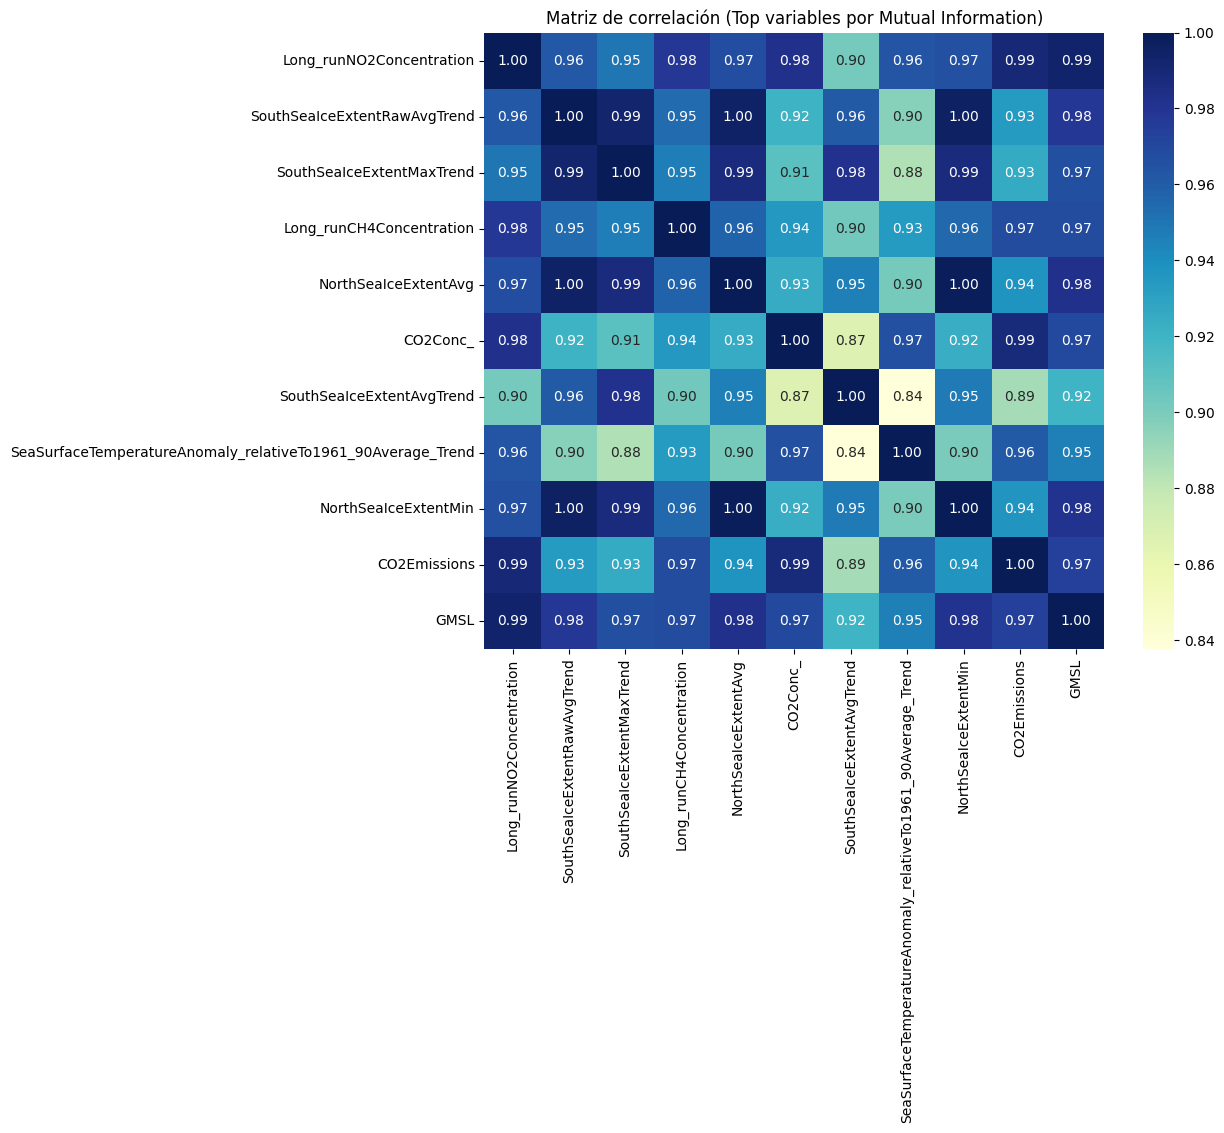

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(columns=["Date"], errors='ignore')


target = "GMSL"


X = df.drop(columns=[target])
y = df[target].values

# --- 4. Calcular Mutual Information (MI) ---
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# --- 5. Mostrar ranking de variables ---
print("Ranking de importancia (Mutual Information):")
display(mi_series)

# --- 6. Seleccionar las 10 variables más relevantes ---
top_features = mi_series.head(10).index
df_mi = df[top_features.tolist() + [target]]

print("\nMejores variables seleccionadas por Mutual Information:")
print(top_features.tolist())
print(f"\nDataFrame reducido: {df_mi.shape}")

# --- 7. Calcular matriz de dependencia (solo para top 10) ---
mi_matrix = df_mi.corr(method="pearson").abs()  # usamos Pearson para visualizar relaciones internas

# --- 8. Visualización de la matriz de correlación ---
plt.figure(figsize=(10, 8))
sns.heatmap(mi_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriz de correlación (Top variables por Mutual Information)")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import pandas as pd

X = df_mi.drop(columns=["GMSL"])
y = df_mi["GMSL"]

# --- Definir el número de características a seleccionar ---
K = 10

# --- Aplicar SelectKBest con Mutual Information ---
selector = SelectKBest(score_func=mutual_info_regression, k=K)
X_new = selector.fit_transform(X, y)

# --- Obtener las puntuaciones de MI ---
scores = selector.scores_
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score_MI": scores
}).sort_values(by="Score_MI", ascending=False)

# --- Mostrar resultados ---
print("Puntuaciones de información mutua (SelectKBest):")
display(feature_scores)

# --- Crear un nuevo DataFrame con las K mejores variables ---
selected_features = feature_scores["Feature"].head(K).tolist()
df_kbest = df_mi[selected_features + ["GMSL"]]

print(f"\nDataFrame reducido con las {K} mejores características:")
print(df_kbest.shape)
display(df_kbest.head())


Puntuaciones de información mutua (SelectKBest):


Feature  Score_MI
0                           Long_runNO2Concentration  4.026853
1                       SouthSeaIceExtentRawAvgTrend  3.836306
2                          SouthSeaIceExtentMaxTrend  3.816589
3                           Long_runCH4Concentration  3.720527
4                               NorthSeaIceExtentAvg  3.716834
5                                           CO2Conc_  3.677529
6                          SouthSeaIceExtentAvgTrend  3.634442
7  SeaSurfaceTemperatureAnomaly_relativeTo1961_90...  3.611336
8                               NorthSeaIceExtentMin  3.585295
9                                       CO2Emissions  3.431076


DataFrame reducido con las 10 mejores características:
(1729, 11)


Long_runNO2Concentration  SouthSeaIceExtentRawAvgTrend  \
0                  275.6600                       10.6927   
1                  275.6725                       10.6936   
2                  275.6850                       10.6945   
3                  275.6975                       10.6954   
4                  275.7100                       10.6963   

   SouthSeaIceExtentMaxTrend  Long_runCH4Concentration  NorthSeaIceExtentAvg  \
0                    17.1933                 845.19000               17.6041   
1                    17.1942                 845.28083               17.5998   
2                    17.1951                 845.37167               17.5955   
3                    17.1960                 845.46250               17.5912   
4                    17.1969                 845.55333               17.5869   

   CO2Conc_  SouthSeaIceExtentAvgTrend  \
0  287.7707                    10.9777   
1  287.9011                    10.9781   
2  288.0315                    10.9786   
3  288.1618                    10.9790   
4  288.2922                    10.9794   

   SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend  \
0                                           -0.56786             
1                                           -0.56805             
2                                           -0.56824             
3                                           -0.56843             
4                                           -0.56863             

   NorthSeaIceExtentMin  CO2Emissions      GMSL  
0               15.3547   858055700.0 -180.2363  
1               15.3483   860548141.7 -179.6365  
2               15.3418   863040583.3 -179.0367  
3               15.3353   865533025.0 -178.4370  
4               15.3288   868025466.7 -177.8372

## SelectKbest

In [ ]:
# --- Importar librerías ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- Separar variables predictoras y objetivo ---
X = df_mi.drop(columns=[target])
y = df_mi[target]

# --- Dividir datos: 80% train, 10% validación, 10% test ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# --- Crear y entrenar modelo Random Forest ---
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# --- Predicciones ---
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# --- Calcular métricas ---
def metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

train_metrics = metrics(y_train, y_train_pred)
val_metrics = metrics(y_val, y_val_pred)
test_metrics = metrics(y_test, y_test_pred)

# --- Mostrar resultados ---
results = pd.DataFrame([train_metrics, val_metrics, test_metrics],
                       index=['Train', 'Validación', 'Test'])
print("=== Resultados Árbol MI ===")
print(results.round(6))


=== Resultados Árbol MI ===
                  R2      RMSE       MAE
Train       0.999996  0.147675  0.091742
Validación  0.999974  0.358713  0.222810
Test        0.999973  0.366715  0.229266



## Curvas de Aprendizaje

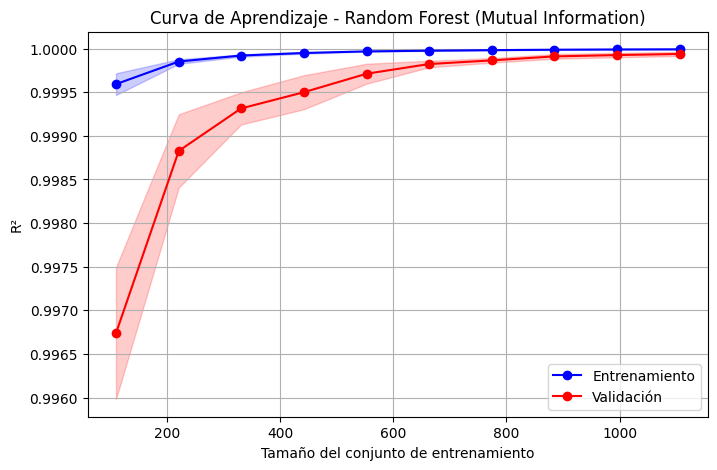

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# --- Definir modelo ---
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# --- Curva de aprendizaje ---
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X_train, y_train,
    cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True, random_state=42
)

# --- Calcular promedio y desviación ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Graficar curva de aprendizaje ---
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validación')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                 alpha=0.2, color='red')

plt.title('Curva de Aprendizaje - Random Forest (Mutual Information)')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()


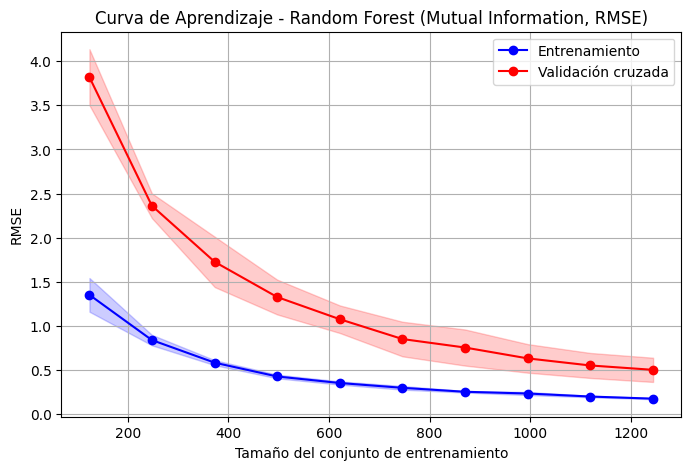

In [ ]:
# --- Importar librerías ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

# --- Usar solo los datos de entrenamiento y validación combinados ---
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)

# --- Definir modelo ---
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# --- Calcular curva de aprendizaje (RMSE) ---
train_sizes, train_scores, val_scores = learning_curve(
    estimator=rf_model,
    X=X_full,
    y=y_full,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True
)

# --- Convertir a valores positivos ---
train_scores = -train_scores
val_scores   = -val_scores

# --- Calcular promedio y desviación estándar ---
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# --- Graficar curva de aprendizaje ---
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validación cruzada')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

plt.title('Curva de Aprendizaje - Random Forest (Mutual Information, RMSE)')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()



# Métodos wrapper (envoltura)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, random_state=42
)

corr_pearson = X_train.corrwith(y_train, method="pearson").abs().sort_values(ascending=False)
corr_spearman = X_train.corrwith(y_train, method="spearman").abs().sort_values(ascending=False)

features_pearson = corr_pearson[corr_pearson > 0.3].index.tolist()
features_spearman = corr_spearman[corr_spearman > 0.3].index.tolist()


scaler_p = StandardScaler()
scaler_s = StandardScaler()

X_train_p_scaled = scaler_p.fit_transform(X_train[features_pearson])
X_val_p_scaled   = scaler_p.transform(X_val[features_pearson])
X_test_p_scaled  = scaler_p.transform(X_test[features_pearson])

X_train_s_scaled = scaler_s.fit_transform(X_train[features_spearman])
X_val_s_scaled   = scaler_s.transform(X_val[features_spearman])
X_test_s_scaled  = scaler_s.transform(X_test[features_spearman])

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

search_p = GridSearchCV(RandomForestRegressor(random_state=42),
                        param_grid, cv=3, scoring='r2', n_jobs=-1)
search_p.fit(X_train_p_scaled, y_train)

search_s = GridSearchCV(RandomForestRegressor(random_state=42),
                        param_grid, cv=3, scoring='r2', n_jobs=-1)
search_s.fit(X_train_s_scaled, y_train)


#  Función auxiliar para aplicar RFE

def aplicar_rfe(modelo, X_train_scaled, y_train, feature_names):
    rfe = RFE(estimator=modelo, n_features_to_select=5, step=1)
    rfe.fit(X_train_scaled, y_train)
    seleccionadas = np.array(feature_names)[rfe.support_]
    return list(seleccionadas)


#  RFE para cada tipo de correlación

features_rfe_pearson  = aplicar_rfe(search_p.best_estimator_, X_train_p_scaled, y_train, features_pearson)
features_rfe_spearman = aplicar_rfe(search_s.best_estimator_, X_train_s_scaled, y_train, features_spearman)

print(" Variables seleccionadas (Pearson):", features_rfe_pearson)
print(" Variables seleccionadas (Spearman):", features_rfe_spearman)


# Reentrenar modelos con features seleccionadas

# Pearson
scaler_rfe_p = StandardScaler()
X_train_p_rfe = scaler_rfe_p.fit_transform(X_train[features_rfe_pearson])
X_val_p_rfe   = scaler_rfe_p.transform(X_val[features_rfe_pearson])
X_test_p_rfe  = scaler_rfe_p.transform(X_test[features_rfe_pearson])

rf_p = RandomForestRegressor(**search_p.best_params_, random_state=42)
rf_p.fit(X_train_p_rfe, y_train)

# Spearman
scaler_rfe_s = StandardScaler()
X_train_s_rfe = scaler_rfe_s.fit_transform(X_train[features_rfe_spearman])
X_val_s_rfe   = scaler_rfe_s.transform(X_val[features_rfe_spearman])
X_test_s_rfe  = scaler_rfe_s.transform(X_test[features_rfe_spearman])

rf_s = RandomForestRegressor(**search_s.best_params_, random_state=42)
rf_s.fit(X_train_s_rfe, y_train)


# Evaluación de métricas

def evaluar_modelo(nombre, modelo, X_train, X_val, X_test, y_train, y_val, y_test):
    print(f"\n=== Random Forest ({nombre}) ===")
    for etapa, Xd, yd in zip(["Entrenamiento", "Validación", "Prueba"],
                             [X_train, X_val, X_test],
                             [y_train, y_val, y_test]):
        y_pred = modelo.predict(Xd)
        print(f"{etapa} -> MAE: {mean_absolute_error(yd, y_pred):.4f}, "
              f"MSE: {mean_squared_error(yd, y_pred):.4f}, "
              f"R²: {r2_score(yd, y_pred):.4f}")

# Evaluar ambos modelos
evaluar_modelo("Pearson (RFE)", rf_p, X_train_p_rfe, X_val_p_rfe, X_test_p_rfe, y_train, y_val, y_test)
evaluar_modelo("Spearman (RFE)", rf_s, X_train_s_rfe, X_val_s_rfe, X_test_s_rfe, y_train, y_val, y_test)


 Variables seleccionadas (Pearson): [np.str_('Long_runNO2Concentration'), np.str_('NorthSeaIceExtentAvg'), np.str_('NorthSeaIceExtentMin'), np.str_('CO2Emissions'), np.str_('Long_runCH4Concentration')]
 Variables seleccionadas (Spearman): [np.str_('Long_runNO2Concentration'), np.str_('NorthSeaIceExtentAvg'), np.str_('NorthSeaIceExtentMin'), np.str_('SouthSeaIceExtentRawAvgTrend'), np.str_('CO2Emissions')]

=== Random Forest (Pearson (RFE)) ===
Entrenamiento -> MAE: 0.0835, MSE: 0.0180, R²: 1.0000
Validación -> MAE: 0.2160, MSE: 0.1175, R²: 1.0000
Prueba -> MAE: 0.1976, MSE: 0.0862, R²: 1.0000

=== Random Forest (Spearman (RFE)) ===
Entrenamiento -> MAE: 0.0851, MSE: 0.0190, R²: 1.0000
Validación -> MAE: 0.2260, MSE: 0.1281, R²: 1.0000
Prueba -> MAE: 0.2061, MSE: 0.0936, R²: 1.0000


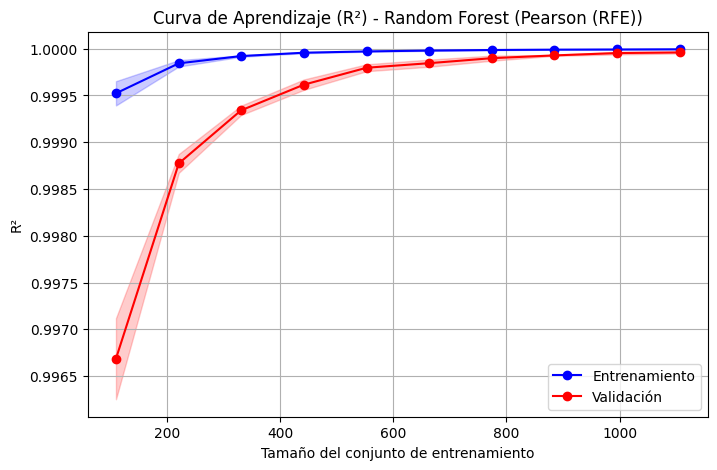

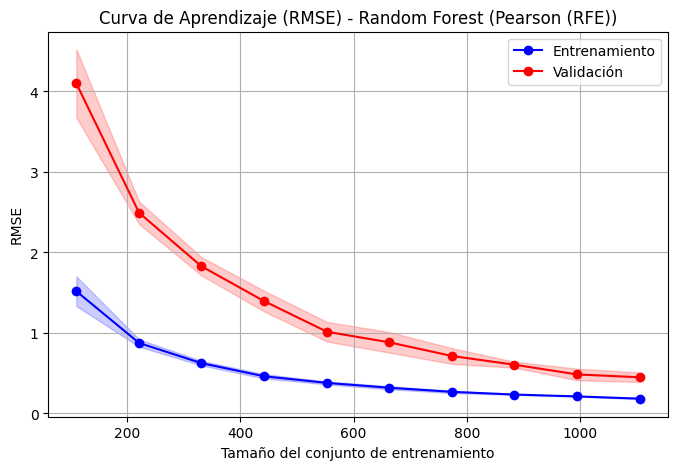

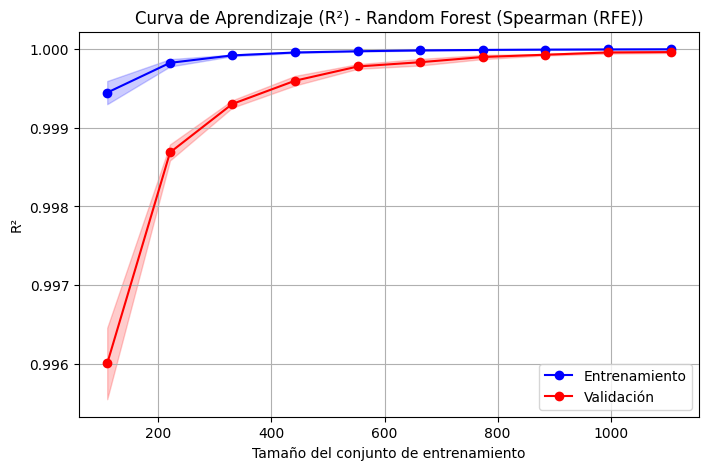

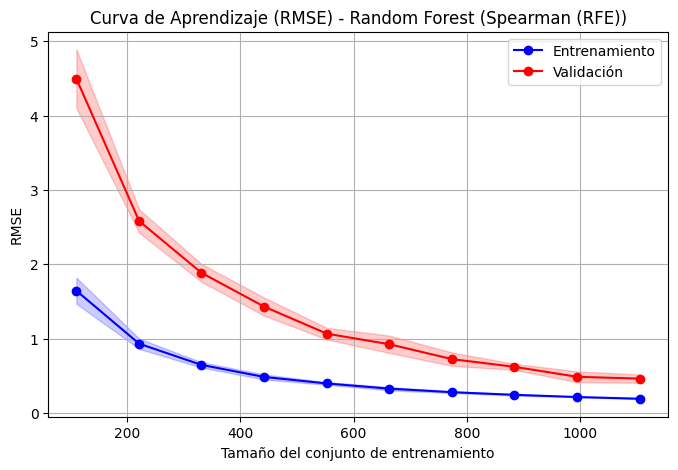

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

# === 1. Definir función para generar las curvas ===
def curvas_aprendizaje_rf(nombre, modelo, X_train, y_train):
    # --- Curva de aprendizaje para R² ---
    train_sizes, train_scores_r2, val_scores_r2 = learning_curve(
        modelo, X_train, y_train,
        cv=5, scoring='r2', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True, random_state=42
    )

    # --- Calcular promedio y desviación ---
    train_mean_r2 = np.mean(train_scores_r2, axis=1)
    train_std_r2  = np.std(train_scores_r2, axis=1)
    val_mean_r2   = np.mean(val_scores_r2, axis=1)
    val_std_r2    = np.std(val_scores_r2, axis=1)

    # --- Graficar R² ---
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean_r2, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, val_mean_r2, 'o-', color='red', label='Validación')

    plt.fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2,
                     alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_mean_r2 - val_std_r2, val_mean_r2 + val_std_r2,
                     alpha=0.2, color='red')

    plt.title(f'Curva de Aprendizaje (R²) - Random Forest ({nombre})')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('R²')
    plt.legend()
    plt.grid(True)
    plt.show()

    # === 2. Curva de aprendizaje para RMSE ===
    rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

    train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
        modelo, X_train, y_train,
        cv=5, scoring=rmse_scorer, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True, random_state=42
    )

    # Convertir a positivo (porque greater_is_better=False invierte signo)
    train_scores_rmse = -train_scores_rmse
    val_scores_rmse = -val_scores_rmse

    # --- Promedios y desviaciones ---
    train_mean_rmse = np.mean(train_scores_rmse, axis=1)
    train_std_rmse  = np.std(train_scores_rmse, axis=1)
    val_mean_rmse   = np.mean(val_scores_rmse, axis=1)
    val_std_rmse    = np.std(val_scores_rmse, axis=1)

    # --- Graficar RMSE ---
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean_rmse, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, val_mean_rmse, 'o-', color='red', label='Validación')

    plt.fill_between(train_sizes, train_mean_rmse - train_std_rmse, train_mean_rmse + train_std_rmse,
                     alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_mean_rmse - val_std_rmse, val_mean_rmse + val_std_rmse,
                     alpha=0.2, color='red')

    plt.title(f'Curva de Aprendizaje (RMSE) - Random Forest ({nombre})')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()


# === 3. Ejecutar para los modelos ===
curvas_aprendizaje_rf("Pearson (RFE)", rf_p, X_train_p_rfe, y_train)
curvas_aprendizaje_rf("Spearman (RFE)", rf_s, X_train_s_rfe, y_train)



## Wrapper para MI

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- Separar variables predictoras y objetivo ---
X = df_mi.drop(columns=[target])
y = df_mi[target]

# --- Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# --- Definir modelo base ---
base_model = RandomForestRegressor(n_estimators=200, random_state=42)

# --- Aplicar método de envoltura (RFE) ---
n_features_to_select = 5  # número de características finales deseadas
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select, step=1)
rfe.fit(X_train, y_train)

# --- Obtener variables seleccionadas ---
selected_idx = rfe.get_support(True)
selected_features = X_train.columns[selected_idx]
print("=== Variables seleccionadas por RFE (MI) ===")
print(selected_features.tolist())

# --- Filtrar conjuntos con las variables seleccionadas ---
X_train_rfe = X_train[selected_features]
X_val_rfe   = X_val[selected_features]
X_test_rfe  = X_test[selected_features]

# --- Reentrenar el modelo con las variables seleccionadas ---
model_rfe = RandomForestRegressor(n_estimators=200, random_state=42)
model_rfe.fit(X_train_rfe, y_train)

# --- Predicciones ---
y_train_pred = model_rfe.predict(X_train_rfe)
y_val_pred   = model_rfe.predict(X_val_rfe)
y_test_pred  = model_rfe.predict(X_test_rfe)

# --- Calcular métricas ---
def metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

train_metrics = metrics(y_train, y_train_pred)
val_metrics   = metrics(y_val, y_val_pred)
test_metrics  = metrics(y_test, y_test_pred)

# --- Mostrar resultados ---
results = pd.DataFrame([train_metrics, val_metrics, test_metrics],
                       index=['Train', 'Validación', 'Test'])
print("\n=== Resultados RFE - Random Forest (MI) ===")
print(results.round(6))


=== Variables seleccionadas por RFE (MI) ===
['Long_runNO2Concentration', 'Long_runCH4Concentration', 'NorthSeaIceExtentAvg', 'NorthSeaIceExtentMin', 'CO2Emissions']

=== Resultados RFE - Random Forest (MI) ===
                  R2      RMSE       MAE
Train       0.999997  0.131671  0.081253
Validación  0.999974  0.358041  0.212598
Test        0.999981  0.304066  0.195866


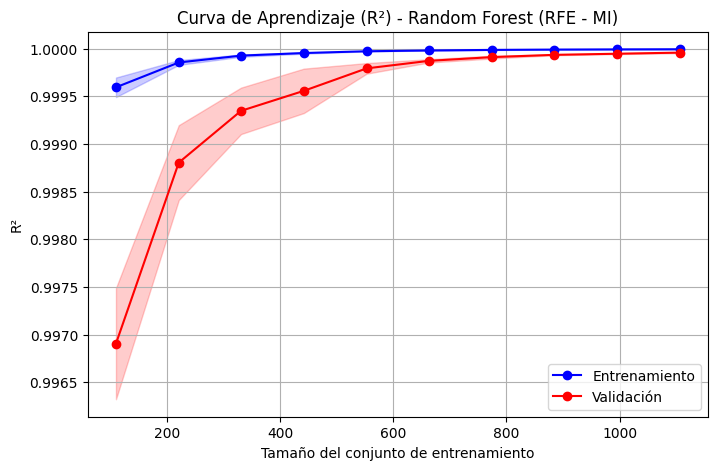

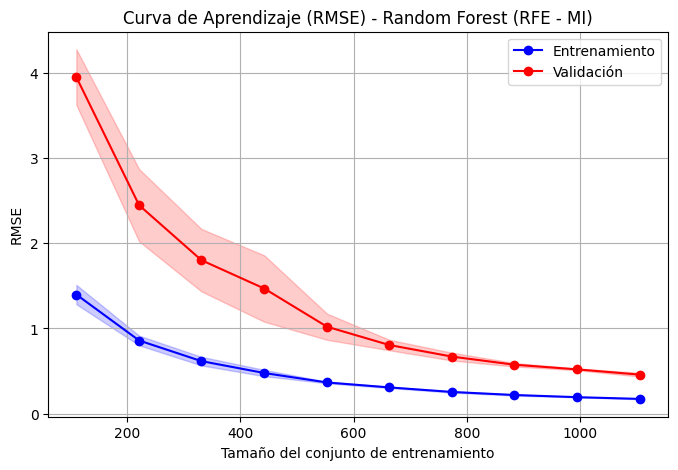

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# === Función para graficar curvas de aprendizaje ===
def curvas_aprendizaje_rfe(modelo, X_train, y_train, nombre="Random Forest (RFE - MI)"):
    # --- Curva de aprendizaje para R² ---
    train_sizes, train_scores_r2, val_scores_r2 = learning_curve(
        modelo, X_train, y_train,
        cv=5, scoring='r2', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True, random_state=42
    )

    # --- Calcular promedio y desviación ---
    train_mean_r2 = np.mean(train_scores_r2, axis=1)
    train_std_r2  = np.std(train_scores_r2, axis=1)
    val_mean_r2   = np.mean(val_scores_r2, axis=1)
    val_std_r2    = np.std(val_scores_r2, axis=1)

    # --- Graficar R² ---
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean_r2, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, val_mean_r2, 'o-', color='red', label='Validación')
    plt.fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2,
                     alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_mean_r2 - val_std_r2, val_mean_r2 + val_std_r2,
                     alpha=0.2, color='red')
    plt.title(f'Curva de Aprendizaje (R²) - {nombre}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('R²')
    plt.legend()
    plt.grid(True)
    plt.show()

    # === Curva de aprendizaje para RMSE ===
    rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

    train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
        modelo, X_train, y_train,
        cv=5, scoring=rmse_scorer, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True, random_state=42
    )

    # Convertir a valores positivos
    train_scores_rmse = -train_scores_rmse
    val_scores_rmse   = -val_scores_rmse

    # Promedio y desviación estándar
    train_mean_rmse = np.mean(train_scores_rmse, axis=1)
    train_std_rmse  = np.std(train_scores_rmse, axis=1)
    val_mean_rmse   = np.mean(val_scores_rmse, axis=1)
    val_std_rmse    = np.std(val_scores_rmse, axis=1)

    # --- Graficar RMSE ---
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean_rmse, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, val_mean_rmse, 'o-', color='red', label='Validación')
    plt.fill_between(train_sizes, train_mean_rmse - train_std_rmse, train_mean_rmse + train_std_rmse,
                     alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_mean_rmse - val_std_rmse, val_mean_rmse + val_std_rmse,
                     alpha=0.2, color='red')
    plt.title(f'Curva de Aprendizaje (RMSE) - {nombre}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()


# === Ejecutar las curvas de aprendizaje ===
curvas_aprendizaje_rfe(model_rfe, X_train_rfe, y_train, nombre="Random Forest (RFE - MI)")


# Método Embebido


Tiempo total de ejecución: 5.719 segundos

=== Resultados método embebido - Random Forest (MI) ===
   Características        R2      RMSE       MAE
0                5  0.999976  0.339442  0.193368
1               10  0.999972  0.367755  0.226658

Mejor número de características según R²: 5


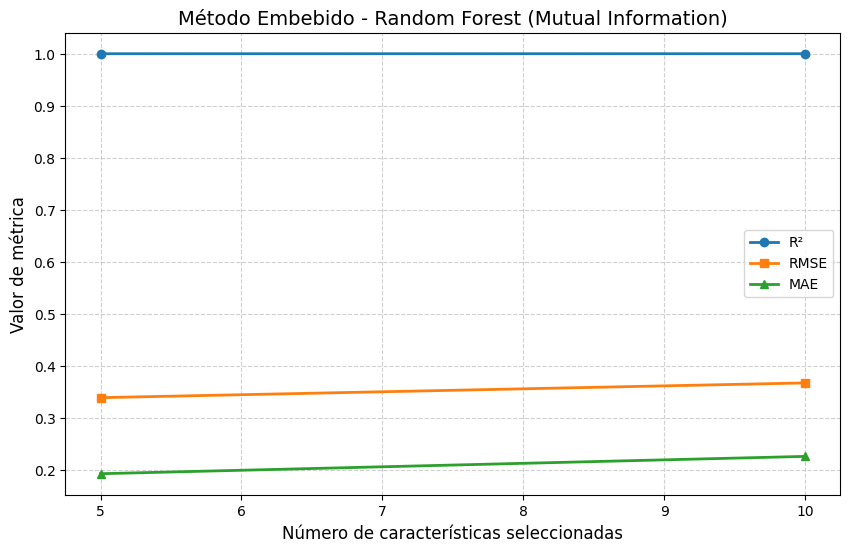

In [ ]:
# --- Importar librerías ---
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# --- Separar variables predictoras y objetivo ---
X = df_mi.drop(columns=[target])
y = df_mi[target]

# --- Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# --- Listas para almacenar resultados ---
r2_model = []
mae_model = []
rmse_model = []
num_features = []

# --- Iniciar conteo de tiempo ---
start_time = time.time()

# --- Bucle para probar distintos tamaños de características ---
for k in range(5, X.shape[1] + 1, 5):  # incrementos de 5 características
    # 1. Selección de características según información mutua (MI)
    selector = SelectKBest(score_func=mutual_info_regression, k=k)
    selector.fit(X_train, y_train)
    mask = selector.get_support()

    # 2. Filtrar conjuntos con las características seleccionadas
    X_train_sel = X_train.loc[:, mask]
    X_val_sel   = X_val.loc[:, mask]

    # 3. Escalar datos (opcional para RF)
    scaler = MinMaxScaler()
    scaler.fit(X_train_sel)
    X_train_scaled = scaler.transform(X_train_sel)
    X_val_scaled   = scaler.transform(X_val_sel)

    # 4. Entrenar modelo Random Forest
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # 5. Predicciones
    y_pred = rf.predict(X_val_scaled)

    # 6. Cálculo de métricas
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2  = r2_score(y_val, y_pred)

    # 7. Almacenar resultados
    mae_model.append(mae)
    rmse_model.append(rmse)
    r2_model.append(r2)
    num_features.append(k)

# --- Tiempo total ---
print("Tiempo total de ejecución: {:.3f} segundos".format(time.time() - start_time))

# --- Resultados finales ---
resultados_embebido = pd.DataFrame({
    'Características': num_features,
    'R2': r2_model,
    'RMSE': rmse_model,
    'MAE': mae_model
})

print("\n=== Resultados método embebido - Random Forest (MI) ===")
print(resultados_embebido.round(6))

# --- Encontrar mejor número de características según R² ---
mejor_k = resultados_embebido.loc[resultados_embebido['R2'].idxmax(), 'Características']
print(f"\nMejor número de características según R²: {int(mejor_k)}")

# --- Gráfica de desempeño ---
plt.figure(figsize=(10,6))
plt.plot(num_features, r2_model, marker='o', label='R²', linewidth=2)
plt.plot(num_features, rmse_model, marker='s', label='RMSE', linewidth=2)
plt.plot(num_features, mae_model, marker='^', label='MAE', linewidth=2)
plt.title('Método Embebido - Random Forest (Mutual Information)', fontsize=14)
plt.xlabel('Número de características seleccionadas', fontsize=12)
plt.ylabel('Valor de métrica', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Tiempo total de ejecución: 5.107 segundos

=== Resultados método embebido - Random Forest (MI) ===
   Características  R2_Train    R2_Val  RMSE_Train  RMSE_Val  MAE_Train  \
0                5  0.999997  0.999976    0.122920  0.339442   0.074533   
1               10  0.999996  0.999972    0.147981  0.367755   0.092494   

    MAE_Val  
0  0.193368  
1  0.226658  


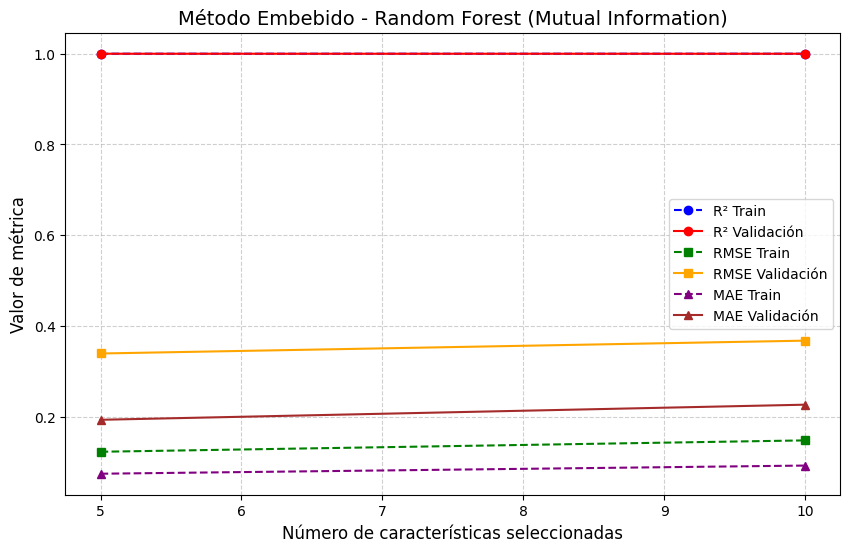

In [ ]:
# --- Importar librerías ---
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# --- Separar variables predictoras y objetivo ---
X = df_mi.drop(columns=[target])
y = df_mi[target]

# --- Dividir datos ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# --- Listas para almacenar resultados ---
r2_train, mae_train, rmse_train = [], [], []
r2_val, mae_val, rmse_val = [], [], []
num_features = []

# --- Iniciar conteo de tiempo ---
start_time = time.time()

# --- Bucle para probar distintos tamaños de características ---
for k in range(5, X.shape[1] + 1, 5):  # incrementos de 5 características
    # 1. Selección de características según información mutua (MI)
    selector = SelectKBest(score_func=mutual_info_regression, k=k)
    selector.fit(X_train, y_train)
    mask = selector.get_support()

    # 2. Filtrar conjuntos con las características seleccionadas
    X_train_sel = X_train.loc[:, mask]
    X_val_sel   = X_val.loc[:, mask]

    # 3. Escalar datos
    scaler = MinMaxScaler()
    scaler.fit(X_train_sel)
    X_train_scaled = scaler.transform(X_train_sel)
    X_val_scaled   = scaler.transform(X_val_sel)

    # 4. Entrenar modelo Random Forest
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # 5. Predicciones
    y_train_pred = rf.predict(X_train_scaled)
    y_val_pred   = rf.predict(X_val_scaled)

    # 6. Cálculo de métricas
    # --- Entrenamiento ---
    mae_t = mean_absolute_error(y_train, y_train_pred)
    rmse_t = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_t = r2_score(y_train, y_train_pred)

    # --- Validación ---
    mae_v = mean_absolute_error(y_val, y_val_pred)
    rmse_v = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_v = r2_score(y_val, y_val_pred)

    # 7. Almacenar resultados
    mae_train.append(mae_t); rmse_train.append(rmse_t); r2_train.append(r2_t)
    mae_val.append(mae_v);   rmse_val.append(rmse_v);   r2_val.append(r2_v)
    num_features.append(k)

# --- Tiempo total ---
print("Tiempo total de ejecución: {:.3f} segundos".format(time.time() - start_time))

# --- Crear DataFrame de resultados ---
resultados_embebido = pd.DataFrame({
    'Características': num_features,
    'R2_Train': r2_train, 'R2_Val': r2_val,
    'RMSE_Train': rmse_train, 'RMSE_Val': rmse_val,
    'MAE_Train': mae_train, 'MAE_Val': mae_val
})

print("\n=== Resultados método embebido - Random Forest (MI) ===")
print(resultados_embebido.round(6))

# --- Gráfica de desempeño ---
plt.figure(figsize=(10,6))

# --- R² ---
plt.plot(num_features, r2_train, 'o--', color='blue', label='R² Train')
plt.plot(num_features, r2_val, 'o-', color='red', label='R² Validación')

# --- RMSE ---
plt.plot(num_features, rmse_train, 's--', color='green', label='RMSE Train')
plt.plot(num_features, rmse_val, 's-', color='orange', label='RMSE Validación')

# --- MAE ---
plt.plot(num_features, mae_train, '^--', color='purple', label='MAE Train')
plt.plot(num_features, mae_val, '^-', color='brown', label='MAE Validación')

plt.title('Método Embebido - Random Forest (Mutual Information)', fontsize=14)
plt.xlabel('Número de características seleccionadas', fontsize=12)
plt.ylabel('Valor de métrica', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Optimización de Hiperparametros

In [ ]:
# --- Librerías ---
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# --- Pipeline ---
pipeline = Pipeline([
    ('select', SelectKBest(score_func=mutual_info_regression)),  # Selección de características
    ('scale', MinMaxScaler()),                                   # Escalado
    ('model', RandomForestRegressor(random_state=42))             # Modelo base
])

# --- Espacio de búsqueda reducido ---
param_grid = {
    'select__k': [10, 20, 30],           # Número de variables seleccionadas
    'model__n_estimators': [100, 200],   # Cantidad moderada de árboles
    'model__max_depth': [None, 10],      # Profundidad limitada
}

# --- Búsqueda en rejilla ---
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=3,           # Menos folds para acelerar
    n_jobs=-1,
    verbose=1
)

# --- Entrenamiento ---
grid_search.fit(x_train, y_train)

# --- Resultados de optimización ---
print("=== Mejores parámetros encontrados ===")
print(grid_search.best_params_)
print(f"\nMejor puntuación R² (validación cruzada): {grid_search.best_score_:.4f}")

# --- Evaluación con los mejores parámetros ---
best_model = grid_search.best_estimator_

y_val_pred = best_model.predict(x_val)
y_test_pred = best_model.predict(x_test)

# --- Métricas finales ---
results = pd.DataFrame({
    "R2": [r2_score(y_val, y_val_pred), r2_score(y_test, y_test_pred)],
    "RMSE": [np.sqrt(mean_squared_error(y_val, y_val_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))],
    "MAE": [mean_absolute_error(y_val, y_val_pred), mean_absolute_error(y_test, y_test_pred)]
}, index=["Validación", "Test"])

print("\n=== Métricas finales ===")
print(results.round(4))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
=== Mejores parámetros encontrados ===
{'model__max_depth': 10, 'model__n_estimators': 200, 'select__k': 10}

Mejor puntuación R² (validación cruzada): 0.9983

=== Métricas finales ===
                R2    RMSE     MAE
Validación  0.9987  2.4827  1.1014
Test        0.9988  2.3992  1.1309


## Curvas de Aprendizaje

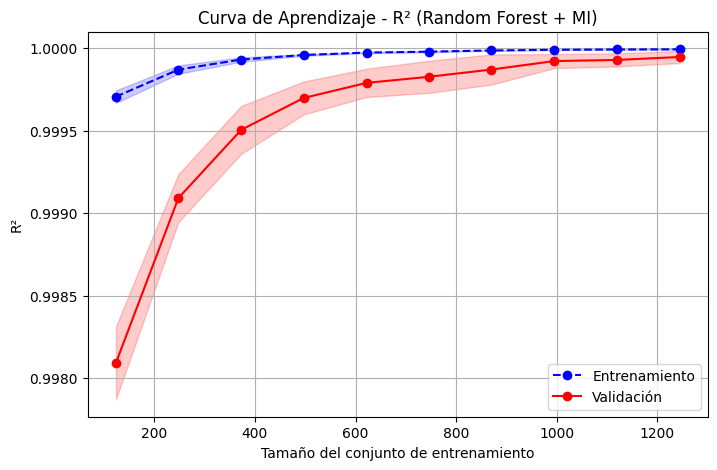

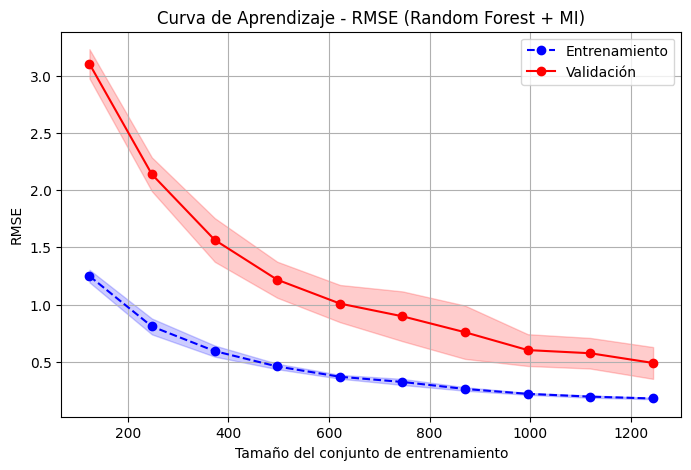

In [ ]:
# --- Importar librerías ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# --- Crear pipeline igual al modelo principal ---
pipeline = Pipeline([
    ('select', SelectKBest(score_func=mutual_info_regression, k=30)),  # Ajusta el mejor k hallado
    ('scale', MinMaxScaler()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

# --- Datos de entrada (entrenamiento + validación) ---
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)

# --- Curva de aprendizaje R² ---
train_sizes, train_scores_r2, val_scores_r2 = learning_curve(
    estimator=pipeline,
    X=X_full,
    y=y_full,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# --- Calcular promedios y desviaciones ---
train_mean_r2 = np.mean(train_scores_r2, axis=1)
train_std_r2  = np.std(train_scores_r2, axis=1)
val_mean_r2   = np.mean(val_scores_r2, axis=1)
val_std_r2    = np.std(val_scores_r2, axis=1)

# --- Curva de aprendizaje RMSE ---
train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
    estimator=pipeline,
    X=X_full,
    y=y_full,
    cv=5,
    scoring='neg_root_mean_squared_error',  # RMSE negativo
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Convertir a valores positivos
train_scores_rmse = -train_scores_rmse
val_scores_rmse   = -val_scores_rmse

# Calcular promedios y desviaciones
train_mean_rmse = np.mean(train_scores_rmse, axis=1)
train_std_rmse  = np.std(train_scores_rmse, axis=1)
val_mean_rmse   = np.mean(val_scores_rmse, axis=1)
val_std_rmse    = np.std(val_scores_rmse, axis=1)

# --- Gráfica 1: Curva de aprendizaje R² ---
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean_r2, 'o--', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_mean_r2, 'o-', color='red', label='Validación')
plt.fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean_r2 - val_std_r2, val_mean_r2 + val_std_r2, alpha=0.2, color='red')
plt.title('Curva de Aprendizaje - R² (Random Forest + MI)')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfica 2: Curva de aprendizaje RMSE ---
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean_rmse, 'o--', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_mean_rmse, 'o-', color='red', label='Validación')
plt.fill_between(train_sizes, train_mean_rmse - train_std_rmse, train_mean_rmse + train_std_rmse, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean_rmse - val_std_rmse, val_mean_rmse + val_std_rmse, alpha=0.2, color='red')
plt.title('Curva de Aprendizaje - RMSE (Random Forest + MI)')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


# Modelo KNN

=== KNN Regressor (sin optimización) ===
Entrenamiento -> MAE: 2.070027 MSE: 8.815105 R2: 0.998282
Validación -> MAE: 2.815616 MSE: 14.577704 R2: 0.997018
Prueba -> MAE: 2.515069 MSE: 12.742403 R2: 0.997406


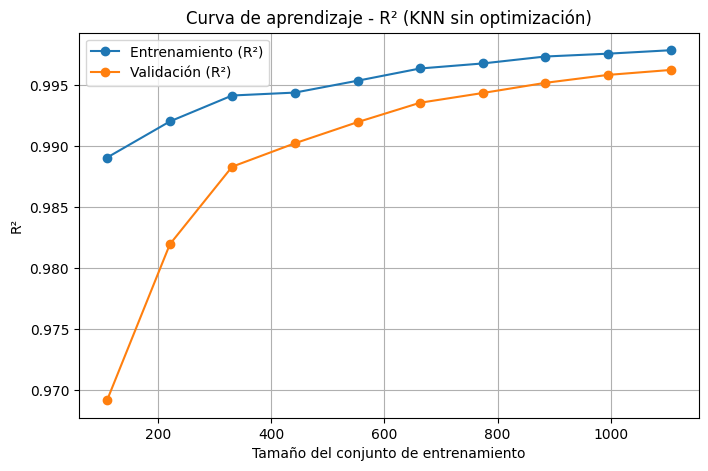

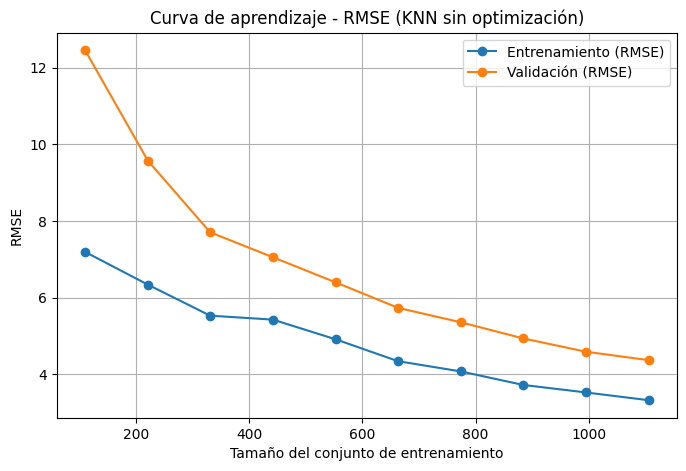

In [ ]:
# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Cargar datos ---
df = pd.read_csv("Refined_new.csv", sep=";", decimal=",")

# Eliminar columna 'Date' ---
df = df.drop(columns=["Date"])

# Separar variables ---
X = df.drop(columns=["GMSL"])
y = df["GMSL"]

# --- División ---
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Escalado ---
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# --- Modelo KNN ---
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_full, y_train_full)

# --- Predicciones ---
y_train_pred = knn.predict(X_train_full)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

# --- Métricas ---
mae_train = mean_absolute_error(y_train_full, y_train_pred)
mse_train = mean_squared_error(y_train_full, y_train_pred)
r2_train = r2_score(y_train_full, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# --- Resultados ---
print("=== KNN Regressor (sin optimización) ===")
print(f"Entrenamiento -> MAE: {mae_train:.6f} MSE: {mse_train:.6f} R2: {r2_train:.6f}")
print(f"Validación -> MAE: {mae_val:.6f} MSE: {mse_val:.6f} R2: {r2_val:.6f}")
print(f"Prueba -> MAE: {mae_test:.6f} MSE: {mse_test:.6f} R2: {r2_test:.6f}")

# --- Curvas de aprendizaje (R²) ---
train_sizes, train_scores, val_scores = learning_curve(
    knn, X_train_full, y_train_full,
    scoring="r2", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento (R²)")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validación (R²)")
plt.title("Curva de aprendizaje - R² (KNN sin optimización)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R²")
plt.legend()
plt.grid(True)
plt.show()

# --- Curvas de aprendizaje (RMSE) ---
train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
    knn, X_train_full, y_train_full,
    scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse_mean = -np.mean(train_scores_rmse, axis=1)
val_rmse_mean = -np.mean(val_scores_rmse, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label="Entrenamiento (RMSE)")
plt.plot(train_sizes, val_rmse_mean, 'o-', label="Validación (RMSE)")
plt.title("Curva de aprendizaje - RMSE (KNN sin optimización)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Mejor combinación de hiperparámetros ===
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

=== KNN Regressor (con optimización de hiperparámetros) ===
Entrenamiento -> MAE: 0.000000 MSE: 0.000000 R2: 1.000000
Validación -> MAE: 1.131635 MSE: 3.161846 R2: 0.999353
Prueba -> MAE: 1.099824 MSE: 3.280173 R2: 0.999332


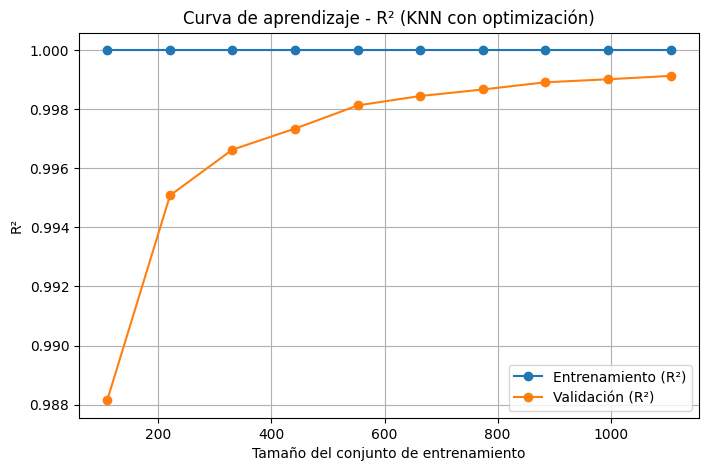

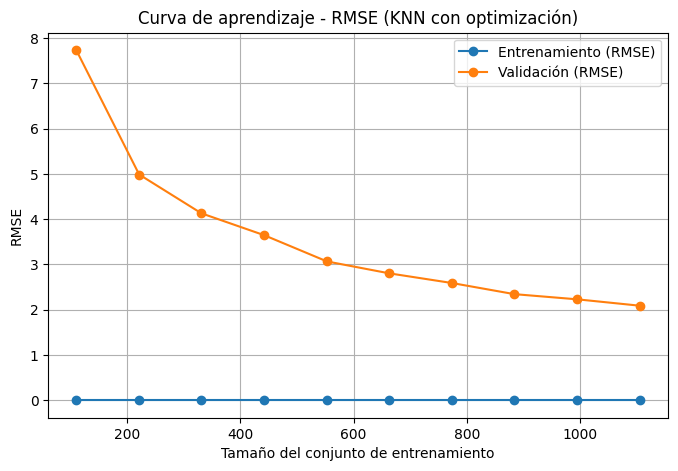

In [ ]:
# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Cargar datos ---
df = pd.read_csv("Refined_new.csv", sep=";", decimal=",")

# Eliminar columna 'Date' ---
df = df.drop(columns=["Date"])

# Separar variables ---
X = df.drop(columns=["GMSL"])
y = df["GMSL"]

# --- División ---
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Escalado ---
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# --- Búsqueda de hiperparámetros ---
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_full, y_train_full)

# --- Mejor modelo ---
best_knn = grid_search.best_estimator_
print("\n=== Mejor combinación de hiperparámetros ===")
print(grid_search.best_params_)

# --- Evaluación del modelo optimizado ---
y_train_pred = best_knn.predict(X_train_full)
y_val_pred = best_knn.predict(X_val)
y_test_pred = best_knn.predict(X_test)

# --- Métricas ---
mae_train = mean_absolute_error(y_train_full, y_train_pred)
mse_train = mean_squared_error(y_train_full, y_train_pred)
r2_train = r2_score(y_train_full, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# --- Resultados ---
print("\n=== KNN Regressor (con optimización de hiperparámetros) ===")
print(f"Entrenamiento -> MAE: {mae_train:.6f} MSE: {mse_train:.6f} R2: {r2_train:.6f}")
print(f"Validación -> MAE: {mae_val:.6f} MSE: {mse_val:.6f} R2: {r2_val:.6f}")
print(f"Prueba -> MAE: {mae_test:.6f} MSE: {mse_test:.6f} R2: {r2_test:.6f}")

# --- Curvas de aprendizaje (R²) ---
train_sizes, train_scores, val_scores = learning_curve(
    best_knn, X_train_full, y_train_full,
    scoring="r2", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento (R²)")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validación (R²)")
plt.title("Curva de aprendizaje - R² (KNN con optimización)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R²")
plt.legend()
plt.grid(True)
plt.show()

# --- Curvas de aprendizaje (RMSE) ---
train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
    best_knn, X_train_full, y_train_full,
    scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse_mean = -np.mean(train_scores_rmse, axis=1)
val_rmse_mean = -np.mean(val_scores_rmse, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label="Entrenamiento (RMSE)")
plt.plot(train_sizes, val_rmse_mean, 'o-', label="Validación (RMSE)")
plt.title("Curva de aprendizaje - RMSE (KNN con optimización)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


## Pearson

Variables seleccionadas por Pearson:
['Per_capitaNO2EmissionsInCO2Equivalents', 'GMSL', 'Nino1_2', 'SouthSeaIceExtentMin', 'Nino3', 'Nino4', 'Nino3_4', 'SouthSeaIceExtentMax', 'SouthSeaIceExtentAvgRaw', 'Per_capitaMethaneEmissionsInCO2Equivalents']
Tamaños -> Train: 1383, Val: 173, Test: 173

=== Mejor combinación de hiperparámetros (Pearson) ===
{'n_neighbors': np.int64(2), 'p': 1, 'weights': 'distance'}

=== Métricas del modelo KNN (Pearson optimizado) ===
                   R2    RMSE     MAE
Entrenamiento  1.0000  0.0000  0.0000
Validación     0.9810  9.6453  4.2146
Prueba         0.9892  7.2744  3.6748


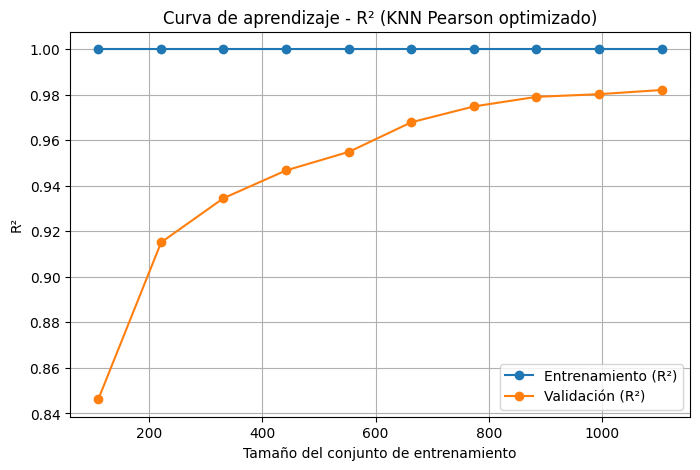

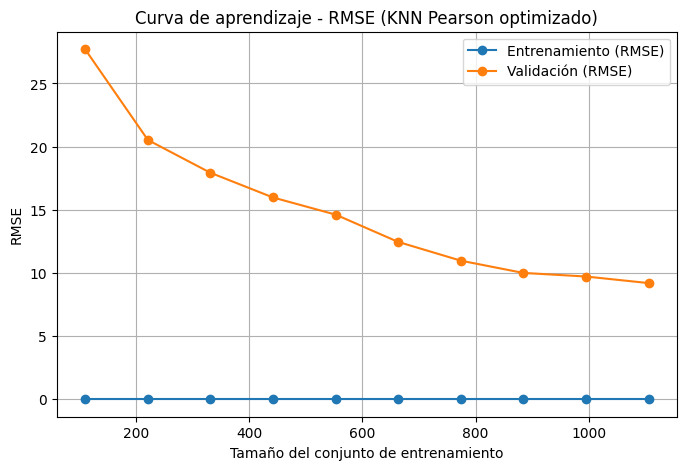

In [ ]:
# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# === 1. Cargar el dataset ===
df = pd.read_csv("Refined_new.csv", sep=";", decimal=",")
df = df.drop(columns=["Date"])

# === 2. Selección de variables según correlación de Pearson ===
c_pearson = df.corr(method="pearson").abs()
corr_gmsl_pearson = c_pearson["GMSL"].sort_values(ascending=False)

# Detectar pares altamente correlacionados
s_pearson = c_pearson.unstack().sort_values(kind="quicksort")
alta_corr_pearson = s_pearson[(s_pearson < 0.999) & (s_pearson > 0.9)]

# Selección final
vars_sel_pearson = set(corr_gmsl_pearson.index)
for (v1, v2), value in alta_corr_pearson.items():
    if corr_gmsl_pearson[v1] > corr_gmsl_pearson[v2]:
        vars_sel_pearson.discard(v2)
    else:
        vars_sel_pearson.discard(v1)

# Nuevo DataFrame reducido con los predictores seleccionados
df_pearson = df[list(vars_sel_pearson)]
print("Variables seleccionadas por Pearson:")
print(df_pearson.columns.tolist())

# === 3. Separar variables ===
X = df_pearson.drop(columns=["GMSL"])
y = df_pearson["GMSL"]

# === 4. División de datos (80% train, 10% val, 10% test) ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaños -> Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

# === 5. Escalado ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# === 6. Optimización de hiperparámetros ===
param_grid = {
    "n_neighbors": np.arange(2, 30),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("\n=== Mejor combinación de hiperparámetros (Pearson) ===")
print(grid.best_params_)

# === 7. Modelo final ===
best_knn = grid.best_estimator_

# Entrenamiento final
best_knn.fit(X_train, y_train)

# === 8. Predicciones ===
y_train_pred = best_knn.predict(X_train)
y_val_pred = best_knn.predict(X_val)
y_test_pred = best_knn.predict(X_test)

# === 9. Métricas ===
metrics = pd.DataFrame({
    "R2": [
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred),
        r2_score(y_test, y_test_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_val, y_val_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))
    ],
    "MAE": [
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_val_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
}, index=["Entrenamiento", "Validación", "Prueba"])

print("\n=== Métricas del modelo KNN (Pearson optimizado) ===")
print(metrics.round(4))

# === 10. Curva de aprendizaje R² ===
train_sizes, train_scores_r2, val_scores_r2 = learning_curve(
    best_knn, X_train, y_train,
    scoring="r2", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.mean(train_scores_r2, axis=1), 'o-', label="Entrenamiento (R²)")
plt.plot(train_sizes, np.mean(val_scores_r2, axis=1), 'o-', label="Validación (R²)")
plt.title("Curva de aprendizaje - R² (KNN Pearson optimizado)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R²")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Curva de aprendizaje RMSE ===
train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
    best_knn, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse_mean = -np.mean(train_scores_rmse, axis=1)
val_rmse_mean = -np.mean(val_scores_rmse, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label="Entrenamiento (RMSE)")
plt.plot(train_sizes, val_rmse_mean, 'o-', label="Validación (RMSE)")
plt.title("Curva de aprendizaje - RMSE (KNN Pearson optimizado)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()



## Spearman

Variables seleccionadas por Spearman:
['Per_capitaNO2EmissionsInCO2Equivalents', 'GMSL', 'Nino1_2', 'SouthSeaIceExtentMin', 'Nino3', 'Nino4', 'Nino3_4', 'SouthSeaIceExtentMax']
Tamaños -> Train: 1383, Val: 173, Test: 173

=== Mejor combinación de hiperparámetros (Spearman) ===
{'n_neighbors': np.int64(3), 'p': 1, 'weights': 'distance'}

=== Métricas del modelo KNN (Spearman optimizado) ===
                   R2     RMSE     MAE
Entrenamiento  1.0000   0.0000  0.0000
Validación     0.9617  13.6783  7.7320
Prueba         0.9701  12.1294  7.4867


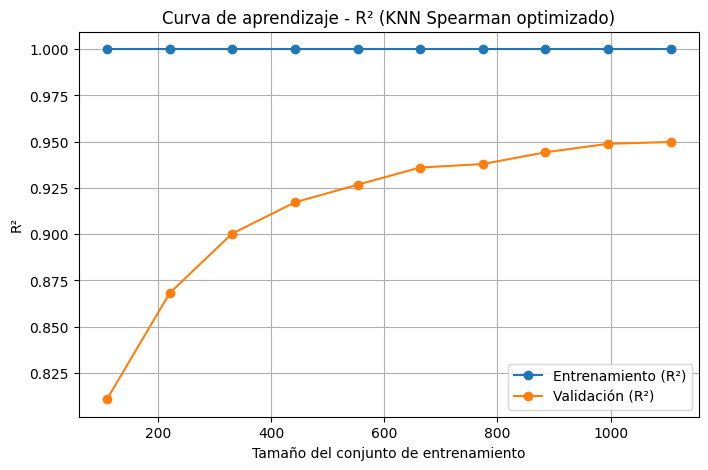

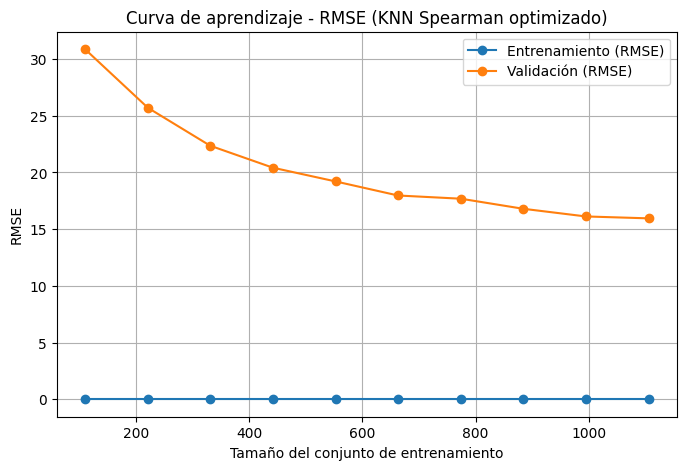

In [ ]:
# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# === 1. Cargar el dataset ===
df = pd.read_csv("Refined_new.csv", sep=";", decimal=",")
df = df.drop(columns=["Date"])

# === 2. Selección de variables según correlación de Spearman ===
c_spearman = df.corr(method="spearman").abs()
corr_gmsl_spearman = c_spearman["GMSL"].sort_values(ascending=False)

# Detectar pares altamente correlacionados
s_spearman = c_spearman.unstack().sort_values(kind="quicksort")
alta_corr_spearman = s_spearman[(s_spearman < 0.999) & (s_spearman > 0.9)]

# Selección final
vars_sel_spearman = set(corr_gmsl_spearman.index)
for (v1, v2), value in alta_corr_spearman.items():
    if corr_gmsl_spearman[v1] > corr_gmsl_spearman[v2]:
        vars_sel_spearman.discard(v2)
    else:
        vars_sel_spearman.discard(v1)

# Nuevo DataFrame reducido con los predictores seleccionados
df_spearman = df[list(vars_sel_spearman)]
print("Variables seleccionadas por Spearman:")
print(df_spearman.columns.tolist())

# === 3. Separar variables ===
X = df_spearman.drop(columns=["GMSL"])
y = df_spearman["GMSL"]

# === 4. División de datos (80% train, 10% val, 10% test) ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaños -> Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

# === 5. Escalado ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# === 6. Optimización de hiperparámetros ===
param_grid = {
    "n_neighbors": np.arange(2, 30),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("\n=== Mejor combinación de hiperparámetros (Spearman) ===")
print(grid.best_params_)

# === 7. Modelo final ===
best_knn = grid.best_estimator_

# Entrenamiento final
best_knn.fit(X_train, y_train)

# === 8. Predicciones ===
y_train_pred = best_knn.predict(X_train)
y_val_pred = best_knn.predict(X_val)
y_test_pred = best_knn.predict(X_test)

# === 9. Métricas ===
metrics = pd.DataFrame({
    "R2": [
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred),
        r2_score(y_test, y_test_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_val, y_val_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))
    ],
    "MAE": [
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_val_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
}, index=["Entrenamiento", "Validación", "Prueba"])

print("\n=== Métricas del modelo KNN (Spearman optimizado) ===")
print(metrics.round(4))

# === 10. Curva de aprendizaje R² ===
train_sizes, train_scores_r2, val_scores_r2 = learning_curve(
    best_knn, X_train, y_train,
    scoring="r2", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.mean(train_scores_r2, axis=1), 'o-', label="Entrenamiento (R²)")
plt.plot(train_sizes, np.mean(val_scores_r2, axis=1), 'o-', label="Validación (R²)")
plt.title("Curva de aprendizaje - R² (KNN Spearman optimizado)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R²")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Curva de aprendizaje RMSE ===
train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
    best_knn, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse_mean = -np.mean(train_scores_rmse, axis=1)
val_rmse_mean = -np.mean(val_scores_rmse, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label="Entrenamiento (RMSE)")
plt.plot(train_sizes, val_rmse_mean, 'o-', label="Validación (RMSE)")
plt.title("Curva de aprendizaje - RMSE (KNN Spearman optimizado)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


## MI

Puntuaciones de información mutua (SelectKBest):


Feature  Score_MI
2                            Long_runNO2Concentration  4.027191
23                       SouthSeaIceExtentRawAvgTrend  3.835353
19                          SouthSeaIceExtentMaxTrend  3.815842
4                            Long_runCH4Concentration  3.719479
15                               NorthSeaIceExtentAvg  3.716248
0                                            CO2Conc_  3.677345
17                          SouthSeaIceExtentAvgTrend  3.635261
8   SeaSurfaceTemperatureAnomaly_relativeTo1961_90...  3.611122
16                               NorthSeaIceExtentMin  3.585967
1                                        CO2Emissions  3.431077
13                                       Nino3_4Trend  3.258581
3              Per_capitaNO2EmissionsInCO2Equivalents  3.134684
5          Per_capitaMethaneEmissionsInCO2Equivalents  3.101265
22                            SouthSeaIceExtentAvgRaw  2.964251
20                               SouthSeaIceExtentMin  2.961919
21                               SouthSeaIceExtentAvg  2.892126
18                               SouthSeaIceExtentMax  2.703742
7   SeaSurfaceTemperatureAnomaly_relativeTo1961_90...  2.263390
9   SeaSurfaceTemperatureAnomaly_relativeTo1961_90...  2.191692
6            GlobalAvgTemp_AnomalyRelativeTo1961_1990  2.129998
14                                              Nino4  0.168694
12                                            Nino3_4  0.148286
11                                              Nino3  0.025263
10                                            Nino1_2  0.000000


Variables seleccionadas por MI (10 mejores):
['Long_runNO2Concentration', 'SouthSeaIceExtentRawAvgTrend', 'SouthSeaIceExtentMaxTrend', 'Long_runCH4Concentration', 'NorthSeaIceExtentAvg', 'CO2Conc_', 'SouthSeaIceExtentAvgTrend', 'SeaSurfaceTemperatureAnomaly_relativeTo1961_90Average_Trend', 'NorthSeaIceExtentMin', 'CO2Emissions']
Tamaños -> Train: 1383, Val: 173, Test: 173

=== Mejor combinación de hiperparámetros (MI) ===
{'n_neighbors': np.int64(3), 'p': 1, 'weights': 'distance'}

=== Métricas del modelo KNN (MI optimizado) ===
                R2    RMSE     MAE
Entrenamiento  1.0  0.0000  0.0000
Validación     1.0  0.3147  0.2130
Prueba         1.0  0.2398  0.1818


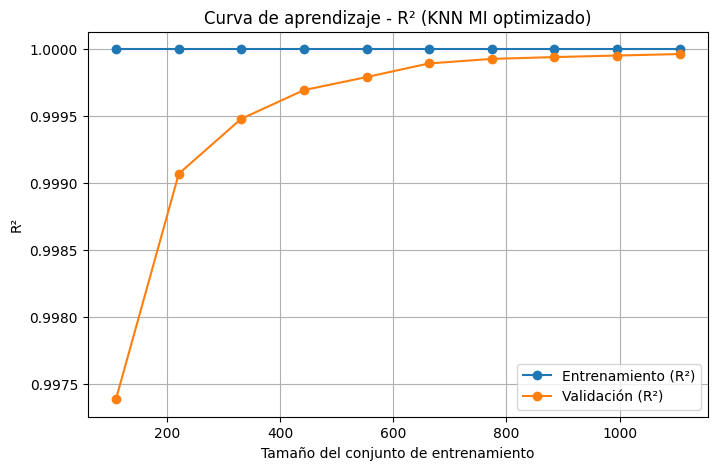

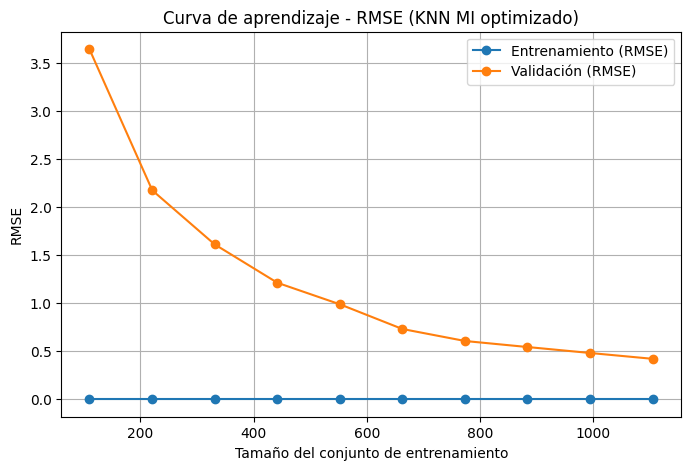

In [ ]:
# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt

# === 1. Cargar el dataset ===
df = pd.read_csv("Refined_new.csv", sep=";", decimal=",")
df = df.drop(columns=["Date"])

# === 2. Selección de variables según Información Mutua (MI) ===
X_full = df.drop(columns=["GMSL"])
y_full = df["GMSL"]

# Número de características a seleccionar
K = 10

selector = SelectKBest(score_func=mutual_info_regression, k=K)
X_new = selector.fit_transform(X_full, y_full)

# Puntuaciones de MI
scores = selector.scores_
feature_scores = pd.DataFrame({
    "Feature": X_full.columns,
    "Score_MI": scores
}).sort_values(by="Score_MI", ascending=False)

print("Puntuaciones de información mutua (SelectKBest):")
display(feature_scores)

# Crear un nuevo DataFrame con las K mejores variables
selected_features = feature_scores["Feature"].head(K).tolist()
df_mi = df[selected_features + ["GMSL"]]

print(f"\nVariables seleccionadas por MI ({K} mejores):")
print(selected_features)

# === 3. Separar variables ===
X = df_mi.drop(columns=["GMSL"])
y = df_mi["GMSL"]

# === 4. División de datos (80% train, 10% val, 10% test) ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaños -> Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

# === 5. Escalado ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# === 6. Optimización de hiperparámetros ===
param_grid = {
    "n_neighbors": np.arange(2, 30),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("\n=== Mejor combinación de hiperparámetros (MI) ===")
print(grid.best_params_)

# === 7. Modelo final ===
best_knn = grid.best_estimator_

# Entrenamiento final
best_knn.fit(X_train, y_train)

# === 8. Predicciones ===
y_train_pred = best_knn.predict(X_train)
y_val_pred = best_knn.predict(X_val)
y_test_pred = best_knn.predict(X_test)

# === 9. Métricas ===
metrics = pd.DataFrame({
    "R2": [
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred),
        r2_score(y_test, y_test_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_val, y_val_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))
    ],
    "MAE": [
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_val_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
}, index=["Entrenamiento", "Validación", "Prueba"])

print("\n=== Métricas del modelo KNN (MI optimizado) ===")
print(metrics.round(4))

# === 10. Curva de aprendizaje R² ===
train_sizes, train_scores_r2, val_scores_r2 = learning_curve(
    best_knn, X_train, y_train,
    scoring="r2", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.mean(train_scores_r2, axis=1), 'o-', label="Entrenamiento (R²)")
plt.plot(train_sizes, np.mean(val_scores_r2, axis=1), 'o-', label="Validación (R²)")
plt.title("Curva de aprendizaje - R² (KNN MI optimizado)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R²")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Curva de aprendizaje RMSE ===
train_sizes, train_scores_rmse, val_scores_rmse = learning_curve(
    best_knn, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse_mean = -np.mean(train_scores_rmse, axis=1)
val_rmse_mean = -np.mean(val_scores_rmse, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label="Entrenamiento (RMSE)")
plt.plot(train_sizes, val_rmse_mean, 'o-', label="Validación (RMSE)")
plt.title("Curva de aprendizaje - RMSE (KNN MI optimizado)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


# Mejor Modelo

El método SelectKBest con mutual_info_regression selecciona las variables que tienen mayor dependencia con la variable objetivo GMSL, lo que resulta relevante ya que:
- MI no asume relaciones lineales, en contraste con otros metodos de correlación como Pearson.
- El método de mutual information captura dependencias complejas entre las variables predictoras y GMSL.

Al implementar este método el resultado fue un subconjunto de 10 variables altamente informativas relacionadas con gases (CO₂, CH₄, NO₂) y extensión de hielo, que tienen sentido físico y ambiental respecto al nivel medio del mar. En otras palabras, el modelo se entrenó solo con las variables más relevantes, eliminando ruido y redundancia del dataset completo.

Por otro lado, el odelo de KNN con hiperparametros optimizados fue el mejor ya que utiliza solo los 3 puntos más cercanos lo que genera una predicción muy localizada y ajustada, además utiliza una distancia Manhattan igual a 1 que traduce una predicción mas robusta ante difernetes outliners, Finalmente, da mas peso a los vecinos más cercanos gracias a weights='distance', reduciendo errores por vecinos lejanos generanod un aprendizaje ,as perfecto de las relaciones locales en el conjunto de entrenamiento.

Por otro lado, la curva de aprendizaje de R² muestra que tanto entrenamiento como validación alcanzan valores cercanos a 1, sin divergencias, no hay sobreajuste evidente.

La curva de RMSE decrece rápidamente y se estabiliza lo que indica que el modelo alcanza un error mínimo constante incluso al aumentar el tamaño del conjunto de entrenamiento.

Estos resultados se nemarcan en que el modelo aprende eficientemente desde pocos datos y mantiene su desempeño al aumentar la muestra.

En conclusión:

El modelo KNN con MI usa variables con máxima dependencia informativa con la variable objetivo.

- Aprovecha relaciones no lineales y locales, que otros modelos, como regresión lineal o ridge, no captan de manera adecuada.

- Optimiza sus parámetros para lograr un equilibrio perfecto entre sesgo y varianza.

- Muestra excelente capacidad de generalización, con métricas sobresalientes en todos los conjuntos.

- Las curvas de aprendizaje confirman su estabilidad y ausencia de sobreajuste.
